# Entrega 2: Ejercicio 2.1

**Asignatura**: Machine Learning, 2025/2026

**Profesor**: José Tomás Palma Méndez

**Máster en Inteligencia Artificial**

**Autores:**  
- Jesús Guirado Pérez  
- Antonio Luis Sánchez Torres  
- Víctor Emilio Vicente García

**Parte realizada:**
Preprocesado y análisis del dataset ``Datos_Energia``

**Parte por realizar:**
Preprocesado y análisis del dataset ``Datos_Climaticos``

# Librerias

Cargamos las librerías que utilizaremos a lo largo del ejercicio.

In [872]:
# Procesamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargamos nuestros datasets

Cargamos los datasets, ``Datos_Energia.csv`` y ``Datos_Climaticos.csv``

In [873]:
# Cargamos nuestros dos datasets
energia = pd.read_csv("Data/Datos_Energia.csv")
climaticos = pd.read_csv("Data/Datos_Climaticos.csv")

energia contendrá el dataset ``Datos_Energia.csv`` y climaticos el dataset ``Datos_Climaticos.csv``

# Análisis de los datasets

Analizamos los dos datasets

In [874]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  78888 non-null  int64  
 1   Mes                  78888 non-null  int64  
 2   Día                  78888 non-null  int64  
 3   Hora                 78888 non-null  int64  
 4   Día de la semana     78888 non-null  int64  
 5   Electricidad (kW)    78871 non-null  float64
 6   Fotovoltaica (kW)    78871 non-null  float64
 7   Refrigeración (kW)   78871 non-null  float64
 8   Calefacción (kWh)    78871 non-null  float64
 9   Energía total (kWh)  78871 non-null  float64
 10  Emisión (kg CO₂)     78871 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 6.6 MB


Aquí podemos ver 11 variables, las cuales las 4 primeras variables, tienen datos que podemos utilizar para hacer un "DatetimeIndex" para el dataset ``Datos_Energia.csv``. Además podemos ver que hay 78888 entradas, dónde ninguna variable es no numérica, por lo que no hará falta realizar dummies o onehotencoder. Por último, se pueden ver cómo deberemos hacer también un relleno de nulos, ya que hay 6 columnas (Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Energía total (kWh) y Emisión (kg CO₂)) con 17 valores nulos.

In [875]:
# Información del dataset
climaticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         78888 non-null  int64  
 1   Mes                         78888 non-null  int64  
 2   Día                         78888 non-null  int64  
 3   Hora                        78888 non-null  int64  
 4   Día de la semana            78888 non-null  int64  
 5   Temperatura (°C)            78701 non-null  float64
 6   Punto de rocío (°C)         78701 non-null  float64
 7   Humedad (%)                 78701 non-null  float64
 8   Dirección del viento        78355 non-null  object 
 9   Velocidad del viento (m/s)  78701 non-null  float64
 10  Ráfaga de viento (m/s)      78701 non-null  float64
 11  Presión (hPa)               78701 non-null  float64
 12  Precipitación (mm)          78701 non-null  float64
 13  Condición meteorológica     786

En este dataset podemos ver como tenemos 14 variables, las cuales las 4 primeras columnas se utilizarán para realizar un "DatetimeIndex" para el dataset ``Datos_Climaticos.csv``. Podemos ver como también tenemos 78888 datos, dónde tenemos 2 variables "object", Dirección del viento y Condición meteorológica, que la trataremos con dummies. Por último, todas las variables excepto las 5 primeras tienen nulos, por lo que también tenemos que tratarlos en este dataset.

# Creamos el DatetimeIndex en nuestros datasets

Vamos a crear nuestro DatetimeIndex que nos será necesario para nuestra práctica de series temporales.

Lo haremos siguiendo la estructura de "Año-Mes-Dia Hora:Minuto:Segundo" por lo que para ello procesaremos las variables Año, Mes, Dia y Hora como strings siguiendo la estructura de antes, además de añadir al final por nosotros mismos los minutos y segundos como ":00:00".

Luego procedemos a eliminar estas variables, por lo que ya no nos serán necesarias una vez que creamos nuestro índice.

In [876]:
# Creamos un datetime con el año, mes, dia y hora (minutos y segundos lo ponemos a 00 los dos)
energia.index = pd.to_datetime(energia['Año'].astype(str) + '-' + energia['Mes'].astype(str) + '-' + energia['Día'].astype(str) + ' ' + energia['Hora'].astype(str) + ':00:00')
climaticos.index = pd.to_datetime(climaticos['Año'].astype(str) + '-' + climaticos['Mes'].astype(str) + '-' + climaticos['Día'].astype(str) + ' ' + climaticos['Hora'].astype(str) + ':00:00')

# Eliminamos las columnas que hemos utilizado para crear el datetime
energia = energia.drop(columns=['Año', 'Mes', 'Día', 'Hora'])
climaticos = climaticos.drop(columns=['Año', 'Mes', 'Día', 'Hora'])

Comprobamos qué, efectivamente, está hecho el índice de forma correcta y que hemos eliminado las variables de manera correcta.

In [877]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Día de la semana     78888 non-null  int64  
 1   Electricidad (kW)    78871 non-null  float64
 2   Fotovoltaica (kW)    78871 non-null  float64
 3   Refrigeración (kW)   78871 non-null  float64
 4   Calefacción (kWh)    78871 non-null  float64
 5   Energía total (kWh)  78871 non-null  float64
 6   Emisión (kg CO₂)     78871 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.8 MB


Vemos como el dataset de energía, con 7 variables en total, ya no tiene esas 4 variables que hemos utilizado para crear el DatetimeIndex de: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00. Tener en cuenta que las variables: Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Energía total (kWh) y Emisión (kg CO₂) tienen 17 nulos cada una.

In [878]:
# Información del dataset
climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Día de la semana            78888 non-null  int64  
 1   Temperatura (°C)            78701 non-null  float64
 2   Punto de rocío (°C)         78701 non-null  float64
 3   Humedad (%)                 78701 non-null  float64
 4   Dirección del viento        78355 non-null  object 
 5   Velocidad del viento (m/s)  78701 non-null  float64
 6   Ráfaga de viento (m/s)      78701 non-null  float64
 7   Presión (hPa)               78701 non-null  float64
 8   Precipitación (mm)          78701 non-null  float64
 9   Condición meteorológica     78695 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.6+ MB


Como resultado, en el dataset de climáticos podemos ver como nos hemos quedado con 10 variables, habiendo eliminado las primeras 4 variables que hemos utilizado para crear el DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00. Tener en cuenta que las variables: Temperatura (°C), Punto de rocío (°C), Humedad (%), Velocidad del viento (m/s), Ráfaga de viento (m/s), Presión (hPa) y Precipitación (mm) tienen 187 nulos cada una, Condición meteorológica 193 nulos y Dirección del viento 533 nulos.

Por lo tanto, ya tenemos creado en nuestros dos datasets dos DatetimeIndex de frecuencia horaria.

# Datos_Energia

Una vez hecho un análisis general de los dataset, además de crear su "DatetimeIndex", ahora vamos a centrarnos en el dataset de ``Datos_Energia.csv``.

## Fechas perdidas

Comprobamos si tenemos fechas perdidas, y lo haremos con frecuencia horaria, que es como manipularemos el dataset de momento.

In [879]:
# Se calcula el numero de fechas desde a través de las hora
fechas_esperadas =  pd.date_range(start=energia.index.min(), end=energia.index.max(), freq='h')
# Diferencias entre la cantidad de horas que se supone que tenemos, y lo que realmente tenemos
fechas_perdidas = fechas_esperadas.difference(energia.index)
# Imprimir el número de horas perdidas
print(f'Número de fechas faltantes: {len(fechas_perdidas)}')
# Muestra las horas pérdidas
fechas_perdidas

Número de fechas faltantes: 0


DatetimeIndex([], dtype='datetime64[ns]', freq='h')

Vemos como no tenemos fechas perdidas, por lo que están colocadas todas las horas de cada día en el índice.

## Tratamiento de duplicados

Primero analizaremos si hay duplicados, y en caso de que los haya eliminarlos

In [880]:
# Visualizamos la cantidad de duplicados del dataset
energia.duplicated().sum()


np.int64(63)

Vemos como tenemos 63 duplicados, vamos a comprobar si tenemos algún índice duplicado.

In [881]:
energia.index.duplicated().sum()

np.int64(0)

Vemos como no tenemos índices duplicados, por lo que vamos a sustituir los datos duplicados por nulos, para no eliminar la continuidad de la serie temporal, excepto los días de la semana.

In [882]:
# Se detectan las filas duplicadas, manteniendo solo la primera de cada grupo de duplicadas
duplicados = energia.duplicated(subset=energia.columns[1:], keep='first')

# Pongo en NaN las filas duplicadas
energia.loc[duplicados, energia.columns[1:]] = np.nan

Cogemos los valores duplicados sin contar con el indice temporal, solo manteniendo la primera fila de cada grupo de duplicadas, y los transformamos en NaN, para luego hacer una interpolación temporal que les de valores distintos pero manteniendo lo mejor posible la serie temporal.

## Tratamiento de nulos

Vamos a comprobar los nulos que tenemos ahora que hemos tratado los duplicados con nulos.

In [883]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana         0
Electricidad (kW)      138
Fotovoltaica (kW)      138
Refrigeración (kW)     138
Calefacción (kWh)      138
Energía total (kWh)    138
Emisión (kg CO₂)       138
dtype: int64

Como se puede ver hay pocos nulos (138), por lo que podriamos eliminarlos o imputarlos, en nuestro caso, como no queremos eliminar ya que no queremos perder datos, decidimos imputar.

### imputación mediante interpolación temporal

En nuestro dataset, nuestros datos están organizados por horas, por lo que pensamos sacar ventaja sobre ello. Por lo tanto, "method = time" utiliza el DatetimeIndex para estimar los valores faltantes teniendo en cuenta la distancia real entre timestamps (en este caso, horas). Viendo la documentación, vemos que funciona en datos diarios o con mayor resolución, por lo que es adecuado para series horarias como esta. Además, al haber pocos valores nulos, la interpolación temporal proporciona una aproximación suave y coherente sin distorsionar el comportamiento general de la serie.

In [884]:
# Seleccionamos todas las columnas numéricas del dataset
numericas = energia.select_dtypes(include='number').columns
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia[numericas] = energia[numericas].interpolate(method='time')

Comprobamos si siguen existiendo más nulos.

In [885]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana       0
Electricidad (kW)      0
Fotovoltaica (kW)      0
Refrigeración (kW)     0
Calefacción (kWh)      0
Energía total (kWh)    0
Emisión (kg CO₂)       0
dtype: int64

Podemos ver como ya no existen más nulos y la interpolación temporal ha sido realizada con éxito.

## Outliers

Vamos a analizar si hay valores sospechosos en cada una de las variables. Primero, analizaremos los 5 primeros datos de nuestro dataset.

In [886]:
# Visualizamos las 5 primeras columnas del dataset
energia.head()

Día de la semana  Electricidad (kW)  Fotovoltaica (kW)  \
2014-01-01 00:00:00                 2           21294.33               2.39   
2014-01-01 01:00:00                 2           21190.46               1.95   
2014-01-01 02:00:00                 2           21537.07               4.29   
2014-01-01 03:00:00                 2           21688.66               9.65   
2014-01-01 04:00:00                 2           23044.40              10.19   

                     Refrigeración (kW)  Calefacción (kWh)  \
2014-01-01 00:00:00          8098.10352          876.28229   
2014-01-01 01:00:00          7312.22987          873.35158   
2014-01-01 02:00:00          7305.86410          911.45081   
2014-01-01 03:00:00          7573.82433          870.42087   
2014-01-01 04:00:00          7462.96849          946.61933   

                     Energía total (kWh)  Emisión (kg CO₂)  
2014-01-01 00:00:00          30268.37288           18880.0  
2014-01-01 01:00:00          29377.43704           18320.0  
2014-01-01 02:00:00          29752.56792           18560.0  
2014-01-01 03:00:00          30130.62951           18790.0  
2014-01-01 04:00:00          31455.31043           19620.0

De momento, en las 5 primeras filas no vemos nada raro, vamos a revisar en más profundidad observando sus series temporales.

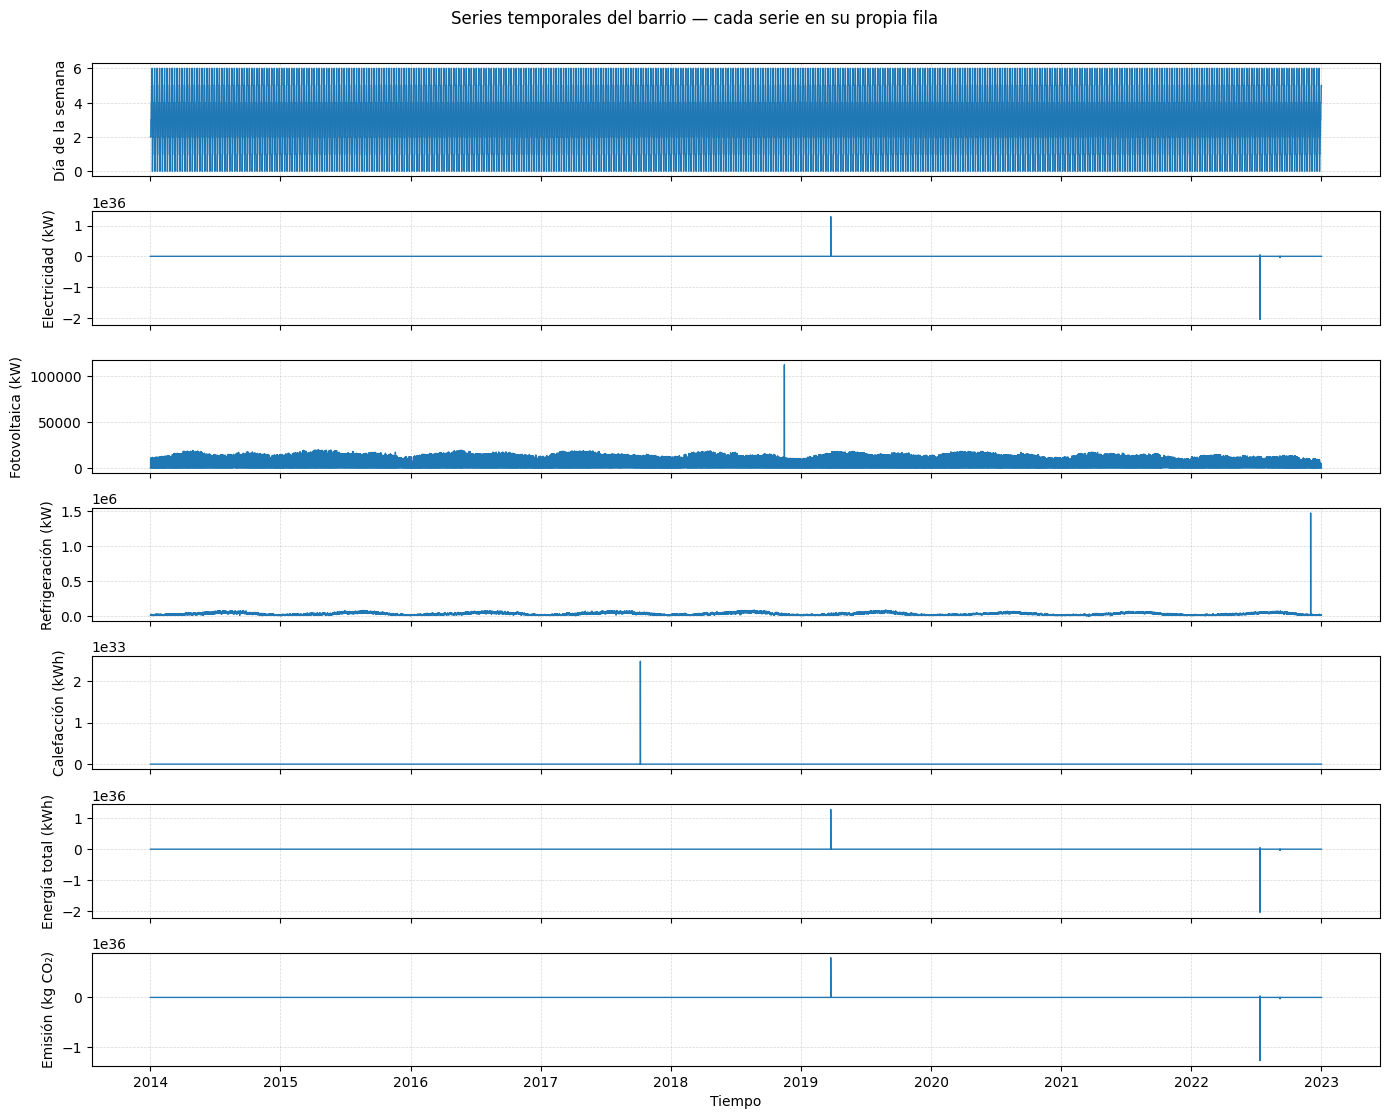

In [887]:
# Guarda el número de variables del dataset
n = len(energia.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, energia.columns):
    ax.plot(energia.index, energia[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()


Hablaremos de lo que vemos a simple vista, por lo tanto hablaremos de muchos números como estimación y no como valor exacto, pero suficiente para entender como funciona cada variable:

Día de la semana: Será nuestra variable exógena, por lo que no trataremos con ella y no la eliminaremos del dataset.

Electricidad (kW): Se puede ver que tiene una escalda de 1e36, haciendo que al estar todos los valores en 0 da a entender que hay una desproporción entre los datos y los outliers, ya que todos los valores están alrededor de 0 y unos pocos a 1e36, y otros a -2e36

Fotovoltaica (kW): Todos los datos están entre 0 y 25000, y algunos datos suben disparados a 100000, dando presencia de outliers.

Refrigeración (kW): Sucede como en la variable Electricidad (kW), todos los datos alrededor de 0, y algunos datos a 1.5e36, por lo que estos outliers están desproporcionadamente por encima de los datos de la variable

Calefacción (kWh): Tiene los datos alrededor de 0 y algunos a 2e33, pudiéndose ver de nuevo, outliers exageradamente desproporcionadamente grandes.

Energía total (kWh): Al ser la suma total de Electricidad (kW), Refrigeración (kWh) y Calefacción (kWh), y estas 3 tienen outliers, esta variable también tendrá outliers, y como puede verse en la gráfica, se ven iguales que Electricidad (kW), seguramente debido a que la escala de outliers es la más grande con 1e36 y -2e36.

Emisión (kg CO₂): Se puede ver que se parece bastante a "Energía total (kWh)", lo que tiene sentido según el contexto de la variable con el dataset, por lo que nos indica que puede haber una correlación muy alta con la variable objetivo.

Ahora vamos a analizar las variables de una en una, excepto los días de la semana, que como hemos visto, es exógena.

### Electricidad (kW)

Como hemos indicado anteriormente, en esta variable hay outliers tan enormes que visualmente parece que hay una linea en la gráfica que está en 0. Vamos a revisar como están distribuidos sus valores.

In [888]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Electricidad (kW)'].describe())


count    7.888800e+04
mean    -3.529852e+31
std      1.127725e+34
min     -2.050000e+36
25%      2.168175e+04
50%      2.515035e+04
75%      2.915754e+04
max      1.290000e+36
Name: Electricidad (kW), dtype: float64


Podemos ver como hay datos con valores excesivamente altos y bajos que no tienen sentido en la variable, por lo tanto establecemos percentiles para solamente eliminar los datos excesivos.

In [889]:
# establecemos los percentiles
cuartil_minimo = energia['Electricidad (kW)'].quantile(0.003)
cuartil_maximo = energia['Electricidad (kW)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Electricidad (kW)'] = energia['Electricidad (kW)'].where(
    (energia['Electricidad (kW)'] >= cuartil_minimo) & (energia['Electricidad (kW)'] <= cuartil_maximo)
)


Ajustamos para intentar eliminar valores excesivos y otros valores que bajen o suban y que no tengan sentido. Comprobamos cuántos valores hemos eliminado.

In [890]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana         0
Electricidad (kW)      316
Fotovoltaica (kW)        0
Refrigeración (kW)       0
Calefacción (kWh)        0
Energía total (kWh)      0
Emisión (kg CO₂)         0
dtype: int64

hemos eliminado 316 valores, los cuáles constituye un ~0.4% del dataset, lo que debería ser una pequeña cantidad para eliminar los outliers.

Utilizamos el método que utilizamos para los nulos de antes con el interpolado temporal, haciendo que queden valores más lógicos.

Vamos a ver como hace la sustitución en una de las zonas con nulos, para ver como funciona la imputación por interpolación temporal.

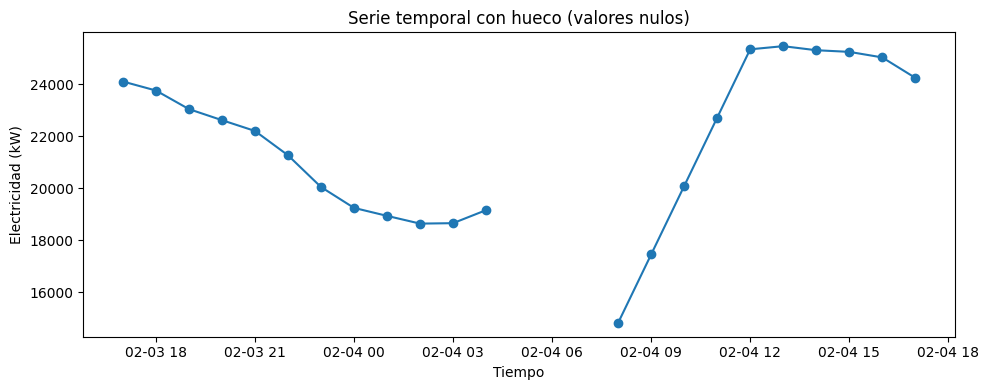

In [891]:
# Se guarda una copia del dataset original
energia_original = energia.copy()

# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Electricidad (kW)'] = energia['Electricidad (kW)'].interpolate(method='time')

# Guardamos la columna utilizada para el interpolado temporal
col = 'Electricidad (kW)'

# Guarda los índices donde hayan NaN de la columna seleccionada
idx_nan = energia_original[col][energia_original[col].isna()].index

# Elige el primer hueco
t0 = idx_nan[0]

# Zoom a la zona donde está el hueco, 12 horas antes y 12 horas después
inicio = t0 - pd.Timedelta(hours=12)
fin    = t0 + pd.Timedelta(hours=12)

# Subconjunto de la serie temporal, con la original y la que aplicamos la interpolación, en las zonas calculadas anteriormente, en la columna seleccionada
orig_zoom = energia_original.loc[inicio:fin, col]
interp_zoom = energia.loc[inicio:fin, col]

# Se guarda una serie booleana con los nulos del subconjunto original
mask = orig_zoom.isna()

# Se crea una gráfica tamaño (10, 4)
plt.figure(figsize=(10,4))
# Se utilizará el índice de tiempo en el eje x y los valores originales de la variable en el eje y, marcándolos con círculos
plt.plot(orig_zoom.index, orig_zoom, marker='o')
plt.title('Serie temporal con hueco (valores nulos)')
plt.xlabel('Tiempo')
plt.ylabel(col)
plt.tight_layout()
plt.show()



Aquí podemos ver que los círculos indican los valores exactos de la variable, y las líneas sirven como ayudas visuales, y como se puede ver, hay un hueco, ese hueco son los NaN que trataremos de rellenar con nuestra interpolación persona, para eso, haremos otra gráfica.

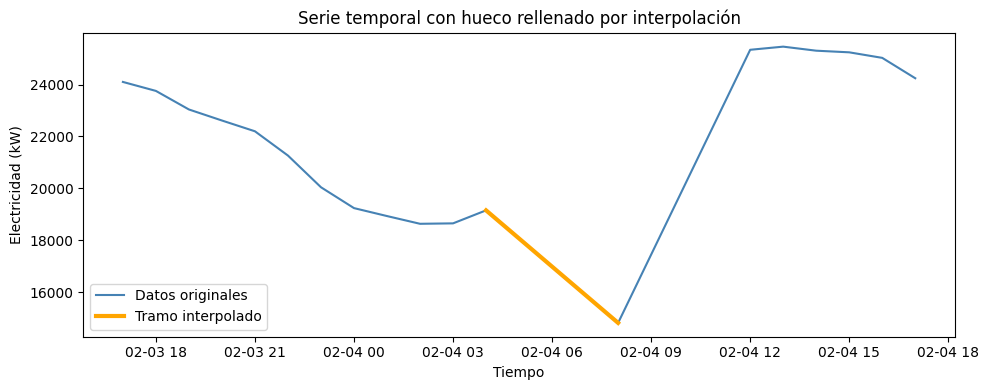

In [892]:
# Copia el subconjunto que vamos a utilizar como interpolado
serie_azul = interp_zoom.copy()

# En el hueco interpolado, ponemos NaN para que no se dibuje azul
serie_azul[mask] = float('nan')

# Se crea una gráfica de tamaño (10, 4)
plt.figure(figsize=(10,4))

# Se pintará en azul los datos originales, sin pintar el corte, con el indice de tiempo como eje x y los valores en el eje y
plt.plot(
    serie_azul.index,
    serie_azul,
    color='steelblue',
    label='Datos originales'
)

# Se pintará en naranja en todas las zonas que han sido seleccionadas como nulas
idx_interp = interp_zoom.index[mask]

# Se añade un punto antes y después para continuidad visual
idx_ext = interp_zoom.index[
    interp_zoom.index.get_loc(idx_interp[0]) - 1 :
    interp_zoom.index.get_loc(idx_interp[-1]) + 2
]

# Se pinta en la gráfica de color naranja la zona cortada
plt.plot(
    idx_ext,
    interp_zoom.loc[idx_ext],
    color='orange',
    linewidth=3,
    label='Tramo interpolado'
)

# Se imprime la serie temporal
plt.title('Serie temporal con hueco rellenado por interpolación')
plt.xlabel('Tiempo')
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()



En esta segunda gráfica, viéndose muy similar a la primera, ya no se ven los círculos azules pero se ve la línea azul y dónde antes había un hueco, ahora esta rellenado de naranja, haciendo que esto sea el resultado de los valores tratados NaN con interpolación temporal.

Aquí podemos ver cómo han quedado los datos después del interpolado temporal.

In [893]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Electricidad (kW)'].describe()

count    78888.000000
mean     25705.489578
std       5426.558286
min      14559.810000
25%      21682.067500
50%      25146.860000
75%      29148.477500
max      43837.690000
Name: Electricidad (kW), dtype: float64

Se puede ver un mínimo de 14559, un máximo de 42837, una mediana de 25146 y una desviación típica de 5426.

Ahora vamos a analizar la gráfica.

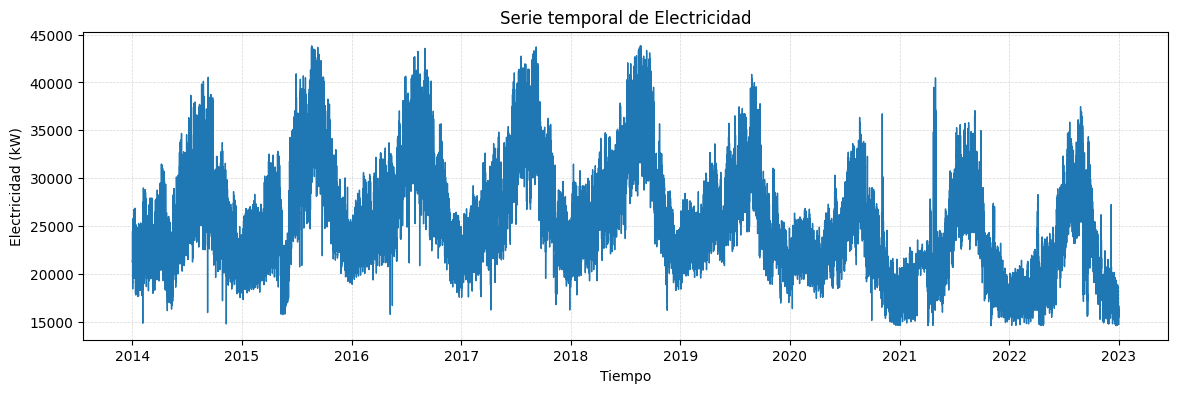

In [894]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Electricidad (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Electricidad (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Electricidad')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como los valores parecen ir desde alrededor de 14000 a alrededor de 43000, valores más típicos para el contexto del problema, además de que se puede ver la representación de la gráfica sin valores "aplastados".

### Fotovoltaica (kW)

Vamos a analizar la variable Fotovoltaica (kW)

In [895]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Fotovoltaica (kW)'].describe())

count     78888.000000
mean       3969.528244
std        5307.698582
min           0.000000
25%           3.880000
50%         160.675000
75%        8396.062500
max      111938.620000
Name: Fotovoltaica (kW), dtype: float64


Se puede ver, cómo el mínimo es de 0, 25% 3.88, 50% 160.675, 75% 8396.0625 y max 111938.62, por lo que se ve lo que hemos visto en la gráfica, que hay outliers muy altos que debemos eliminar, para ello utilizaremos el mismo proceso que la anterior variable pero sin tener en cuenta el percentil inferior.

In [896]:
# establecemos los percentiles
cuartil_maximo = energia['Fotovoltaica (kW)'].quantile(0.9999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Fotovoltaica (kW)'] = energia['Fotovoltaica (kW)'].where((energia['Fotovoltaica (kW)'] <= cuartil_maximo)
)


Una vez eliminado únicamente los outliers, revisamos cuántos outliers hemos eliminado.

In [897]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana       0
Electricidad (kW)      0
Fotovoltaica (kW)      8
Refrigeración (kW)     0
Calefacción (kWh)      0
Energía total (kWh)    0
Emisión (kg CO₂)       0
dtype: int64

Hemos eliminado 8 outliers. Ahora vamos a hacer un interpolado temporal para rellenar nulos siguiendo la distribución de la gráfica.

In [898]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Fotovoltaica (kW)'] = energia['Fotovoltaica (kW)'].interpolate(method='time')

Revisamos cómo han quedado los datos despés del interpolado temporal.

In [899]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Fotovoltaica (kW)'].describe())

count    78888.000000
mean      3967.392042
std       5288.971566
min          0.000000
25%          3.880000
50%        160.675000
75%       8394.950000
max      19026.650000
Name: Fotovoltaica (kW), dtype: float64


Vemos como ya no queda nulos, y la variable parece tener valores más normales, entre 0 y 19026, ahora vamos a revisarlo con una gráfica.

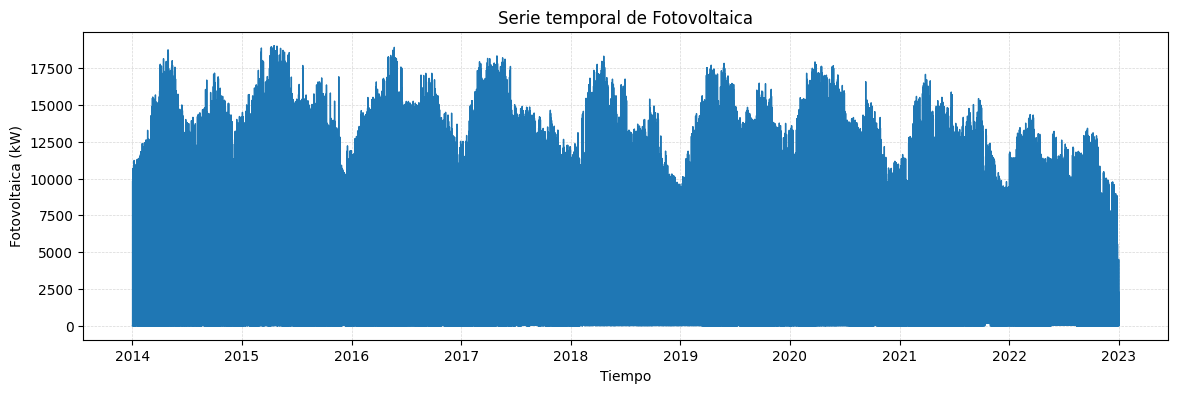

In [900]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Fotovoltaica (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Fotovoltaica (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Fotovoltaica')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()

Se puede ver cómo si hubieramos hecho zoom a la gráfica que habíamos visto al principio pero sin los outliers, por lo tanto se ve como que todos los outliers han sido eliminados de forma definitiva.

### Refrigeración (kW)

Analizamos la variable Refrigeración (kW).

In [901]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Refrigeración (kW)'].describe())

count    7.888800e+04
mean     2.952204e+04
std      1.725338e+04
min      0.000000e+00
25%      1.550072e+04
50%      2.629214e+04
75%      4.134471e+04
max      1.468215e+06
Name: Refrigeración (kW), dtype: float64


Aquí se puede ver, una vez más, que el valor máximo es un número mucho más grande que el resto de valores, indicando que hay outliers hacia arriba, por lo tanto aplicaremos la misma metodología de la variable anterior.

Para ello eliminaremos (sustituidos por nulos) todos los datos que esten por encima del percentil que esblacemos, para deshacernos de los outliers.

In [902]:
# establecemos los percentiles
cuartil_maximo = energia['Refrigeración (kW)'].quantile(0.9999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Refrigeración (kW)'] = energia['Refrigeración (kW)'].where((energia['Refrigeración (kW)'] <= cuartil_maximo)
)


Comprobamos cuántos nulos tiene nuestro dataset al eliminar los outliers.

In [903]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana       0
Electricidad (kW)      0
Fotovoltaica (kW)      0
Refrigeración (kW)     8
Calefacción (kWh)      0
Energía total (kWh)    0
Emisión (kg CO₂)       0
dtype: int64

Se ve cómo hemos eliminado 8 outliers, ahora realizaremos la imputacion por interpolación temporal, como hicimos en la variable anterior.

In [904]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Refrigeración (kW)'] = energia['Refrigeración (kW)'].interpolate(method='time')

Ahora comprobamos como ha quedado nuestra variable.

In [905]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Refrigeración (kW)'].describe())

count    78888.000000
mean     29496.163475
std      16346.803327
min          0.000000
25%      15500.720290
50%      26291.456595
75%      41343.434062
max      80437.553190
Name: Refrigeración (kW), dtype: float64


Se puede ver cómo todos los nulos han sido sustituidos por los valores de interpolación temporal (tenemos 7888 valores no nulos) y como el valor máximo es un valor más lógico con el del dataset.

Ahora revisaremos como se ve en la gráfica.

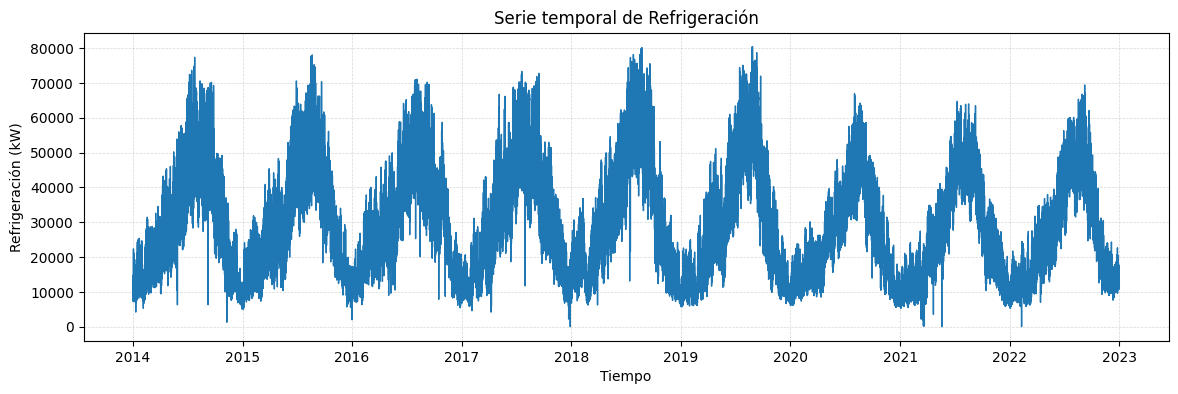

In [906]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Refrigeración (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Refrigeración (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Refrigeración')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()

se puede ver como hay algunas bajadas sospechosas en la gráfica, pero no lo vemos lo suficientemente graves para tener que tratarlas.

### Calefacción (kWh)

Analizamos la variable Calefacción (kWh).

In [907]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Calefacción (kWh)'].describe())

count    7.888800e+04
mean     3.135633e+28
std      8.806631e+30
min     -2.930710e+00
25%      1.462424e+03
50%      1.828763e+03
75%      2.614193e+03
max      2.473519e+33
Name: Calefacción (kWh), dtype: float64


Podemos ver cómo el valor máximo es demasiado alto e irreal, y el número mínimo es negativo cuando no tiene sentido en el contexto del problema, por lo que procedemos a eliminarlos, con el método de los percentiles, tanto superior como inferior.

In [908]:
# establecemos los percentiles
cuartil_minimo = energia['Calefacción (kWh)'].quantile(0.0001)
cuartil_maximo = energia['Calefacción (kWh)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Calefacción (kWh)'] = energia['Calefacción (kWh)'].where(
    (energia['Calefacción (kWh)'] >= cuartil_minimo) & (energia['Calefacción (kWh)'] <= cuartil_maximo)
)


Ahora revisaremos la cantidad de outliers que hemos eliminado.

In [909]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana        0
Electricidad (kW)       0
Fotovoltaica (kW)       0
Refrigeración (kW)      0
Calefacción (kWh)      85
Energía total (kWh)     0
Emisión (kg CO₂)        0
dtype: int64

Se ve que hemos eliminado únicamente 85 outliers, para rellenar nulos utilizaremos la interpolación temporal.

In [910]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Calefacción (kWh)'] = energia['Calefacción (kWh)'].interpolate(method='time')

Ahora veremos como ha quedado el dataset después del interpolado temporal.

In [911]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Calefacción (kWh)'].describe()

count    78888.000000
mean      2162.191635
std       1037.543775
min          0.000000
25%       1462.424290
50%       1828.763040
75%       2614.193320
max       8370.107760
Name: Calefacción (kWh), dtype: float64

Podemos ver cómo ya no quedan nulos y como todos los valores parecen aceptables, ahora revisaremos la gráfica.

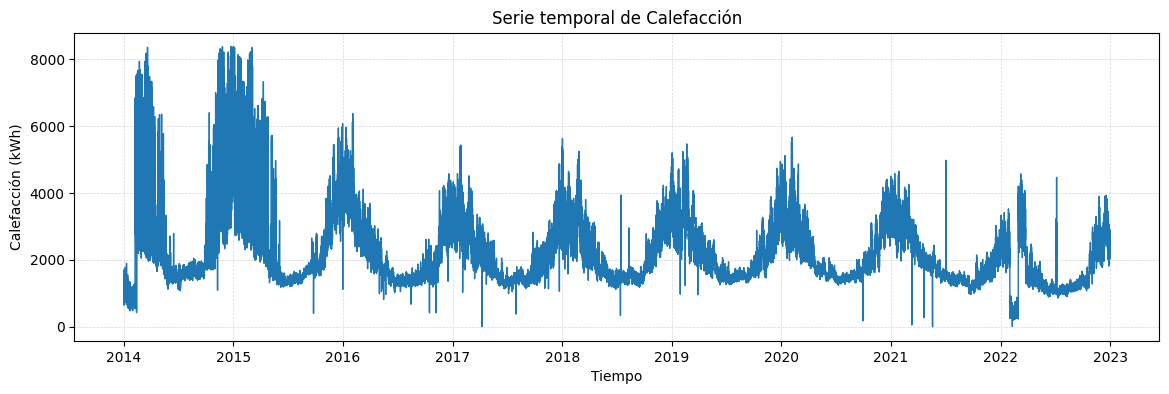

In [912]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Calefacción (kWh)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Calefacción (kWh)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Calefacción')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Se puede ver cómo la gráfica muestra un comportamiento correcto por lo general, aunque vemos un comportamiento raro al poco tiempo de comenzar el año 2022, posiblemente debido a factores internos o externos al sistema, como incidencias técnicas, ajustes operativos o periodos de menor ocupación

### Energía total (kWh)

Vamos a analizar la variable Energía total.

In [913]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Energía total (kWh)'].describe())

count    7.888800e+04
mean    -3.528571e+31
std      1.127948e+34
min     -2.051497e+36
25%      4.059326e+04
50%      5.309860e+04
75%      7.177602e+04
max      1.289512e+36
Name: Energía total (kWh), dtype: float64


Como podemos ver en el enunciado de la práctica, "Energía total (kWh)" es la suma total de las variables "Electricidad (kW)", "Refrigeración (kW)" y "Calefacción (kWh)", por lo que trataremos los outliers con la suma de estas 3 variables.

In [914]:
# Suma de variables por filas
energia['Energía total (kWh)'] = (
    energia['Electricidad (kW)'] +
    energia['Refrigeración (kW)'] +
    energia['Calefacción (kWh)']
)

Una vez calculada, comprobaremos como ha quedado nuestra variable.

In [915]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Energía total (kWh)'].describe()

count     78888.000000
mean      57363.844687
std       20443.066866
min       17624.088000
25%       40598.833575
50%       53080.711905
75%       71725.689493
max      125635.475740
Name: Energía total (kWh), dtype: float64

Vemos cómo nuestro dataset ya contiene valores aceptables. Ahora veremos su representación de su serie temporal en una gráfica.

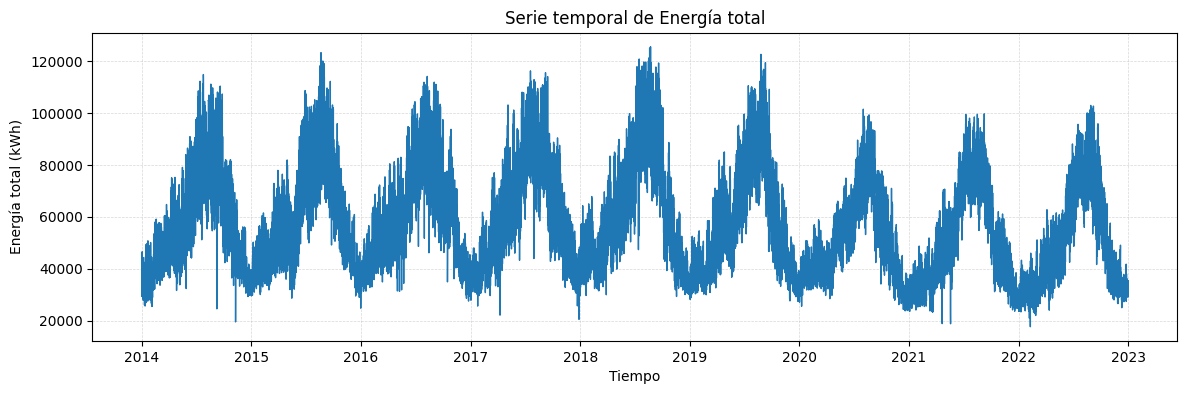

In [916]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Energía total (kWh)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Energía total (kWh)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Energía total')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como la gráfica parece funcionar de manera correcta.

### Emisión (kg CO₂)

Vamos a analizar como funciona la variable.

In [917]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Emisión (kg CO₂)'].describe())

count    7.888800e+04
mean    -2.197952e+31
std      7.032121e+33
min     -1.280000e+36
25%      2.532000e+04
50%      3.312000e+04
75%      4.476000e+04
max      8.050000e+35
Name: Emisión (kg CO₂), dtype: float64


Vemos como tenemos unos datos extremadamente grandes y extremadamente negativos, cuando la variable no tiene sentido este tipo de datos, por lo que estableceremos percentiles superior e inferior para tratar con los datos.

In [918]:
# establecemos los percentiles
cuartil_minimo = energia['Emisión (kg CO₂)'].quantile(0.002)
cuartil_maximo = energia['Emisión (kg CO₂)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Emisión (kg CO₂)'] = energia['Emisión (kg CO₂)'].where(
    (energia['Emisión (kg CO₂)'] >= cuartil_minimo) & (energia['Emisión (kg CO₂)'] <= cuartil_maximo)
)

Comprobamos la cantidad de outliers detectados y eliminados.

In [919]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana         0
Electricidad (kW)        0
Fotovoltaica (kW)        0
Refrigeración (kW)       0
Calefacción (kWh)        0
Energía total (kWh)      0
Emisión (kg CO₂)       237
dtype: int64

vemos como tenemos 237 elementos que hemos eliminado, por lo que ahora imputaremos por interpolación temporal.

In [920]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Emisión (kg CO₂)'] = energia['Emisión (kg CO₂)'].interpolate(method='time')

Vemos como ha quedado el dataset y si han quedado algún nulo sin rellenar.

In [921]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Emisión (kg CO₂)'].describe()

count    78888.000000
mean     35788.231184
std      12745.103364
min      13780.000000
25%      25340.000000
50%      33120.000000
75%      44750.000000
max      74540.000000
Name: Emisión (kg CO₂), dtype: float64

Vemos cómo no hay nulos y sus datos tienen valores lógicos con el resto de valores de la variable. Ahora veremos su representación temporal en una gráfica.

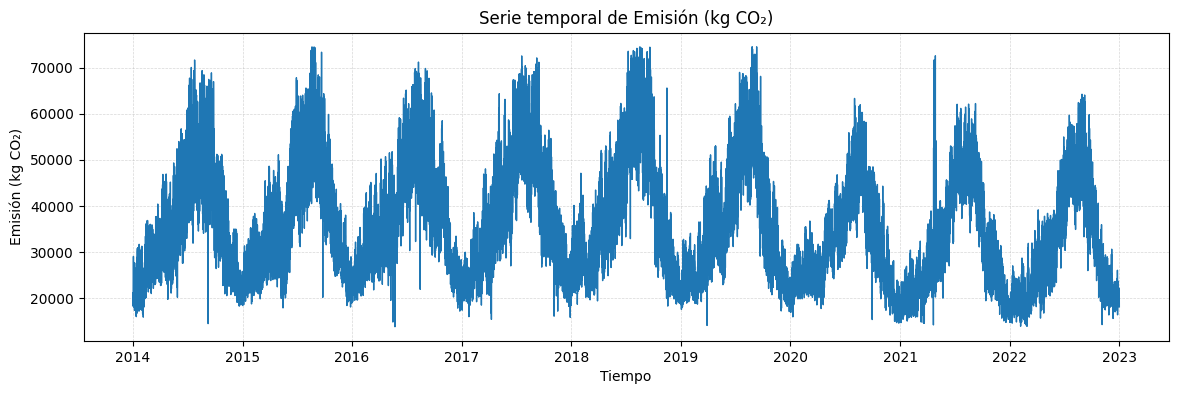

In [922]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Emisión (kg CO₂)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Emisión (kg CO₂)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Emisión (kg CO₂)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como la gráfica por lo general funciona bastante bien.

## Tabla de correlación

Ahora vamos a estudiar las correlaciones del dataset.

En primer lugar vamos a revisar la varianza.

In [923]:
# Calcular varianza de todas las columnas numéricas
varianza = energia.var()
varianza


Día de la semana       3.997008e+00
Electricidad (kW)      2.944753e+07
Fotovoltaica (kW)      2.797322e+07
Refrigeración (kW)     2.672180e+08
Calefacción (kWh)      1.076497e+06
Energía total (kWh)    4.179190e+08
Emisión (kg CO₂)       1.624377e+08
dtype: float64

No hay ninguna varianza cercana a 0, por lo tanto no eliminamos nada.

Ahora revisamos qué variables tienen más correlación con la variable objetivo "Energía total (kWh)".

In [924]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = energia.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Energía total (kWh)"].sort_values(ascending=False)

Energía total (kWh)    1.000000
Emisión (kg CO₂)       0.998726
Refrigeración (kW)     0.985782
Electricidad (kW)      0.899239
Fotovoltaica (kW)      0.347113
Día de la semana      -0.079884
Calefacción (kWh)     -0.531141
Name: Energía total (kWh), dtype: float64

Vemos como "Emisión (kg CO₂)", tal y como habíamos visto cuando explicábamos las gráficas de las variables sin aún haber eliminado outliers, hay una correlación casi del 100%, que de momento, no le tocaremos hasta ver más detalles en la matriz de correlación.

Otras variables con mucha correlación, Refrigeración (kW), Electricidad (kW) y Calefacción (kWh), son las 3 variables que utilizamos para calcular la variable objetivo, por lo tanto tiene sentido que haya una alta correlación y no le tocaremos.

Por último, vemos que "Día de la semana" tiene muy poca correlación con nuestra variable objetivo, pero no la eliminaremos ya que nos puede seguir siendo útil en series temporales, como es el caso de capturar patrones semanales.

Por último, vamos a revisar la matriz de correlación.

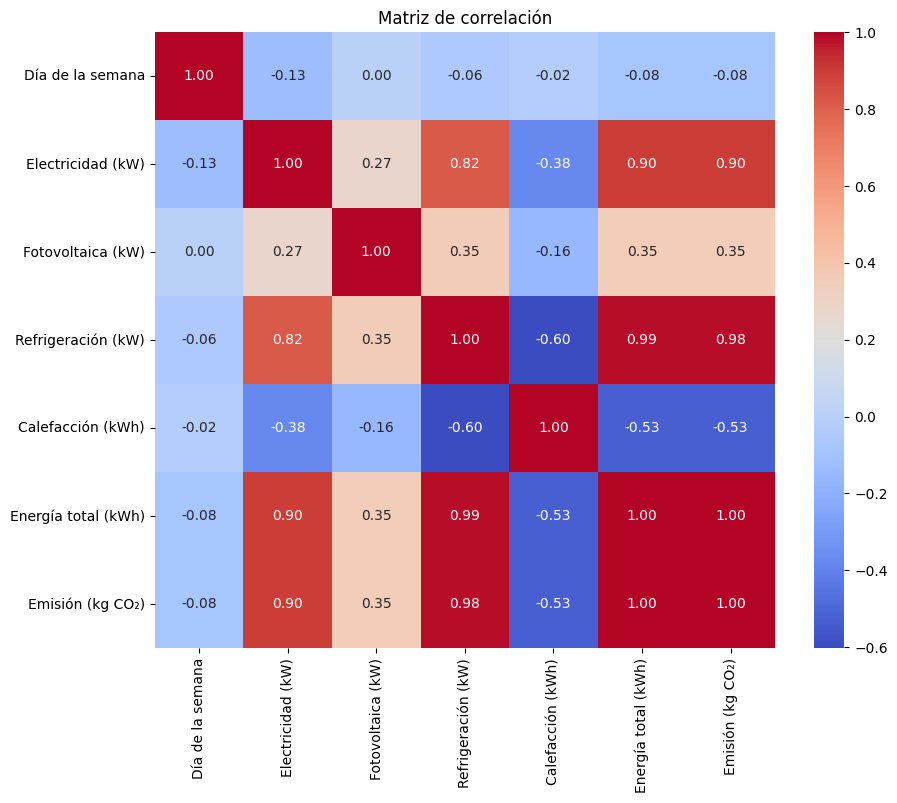

In [925]:
# Crear la tabla de correlación
correlation_matrix = energia.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Como podemos ver, se dan bastantes casos de alta correlación entre variables, destacando sobre todo "Emisión (kg CO₂)", pero decidimos no eliminar nada, pese al peligro de que haya problemas de multicolinealidad, porque el dataset ya contiene muy pocas variables (7) y pensamos que puede seguir siéndonos útil.

## Transformacion a días

Ante la gran cantidad de datos y que nuestro dataset no tiene mucho sentido que tenga los datos en formato horario, decidimos cambiarlo a que sean diarios. Para ello, hacemos un resample diario que sume todos los datos de cada dia, pero teniendo en cuenta que "Día de la semana" no queremos que cambie, y como cada fila es la suma de si mismo 24 veces, decidimos hacer una división de 24 y transformarlo en entero.

In [926]:
# Guardamos una copia
energia_horas = energia
# Cambia frecuencia temporal
energia = energia.resample('D').sum()
# Divide entre 24 los datos de la variable
energia['Día de la semana'] = energia['Día de la semana']/24
# Transforma a entero la variable
energia['Día de la semana'] = energia['Día de la semana'].astype(int)

Revisamos como han quedado las 10 primeras filas.

In [927]:
# Visualizamos las 5 primeras columnas del dataset
energia.head(10)

Día de la semana  Electricidad (kW)  Fotovoltaica (kW)  \
2014-01-01                 2          490049.28           62795.47   
2014-01-02                 3          556486.56           64284.00   
2014-01-03                 4          545831.45           67187.06   
2014-01-04                 5          511495.56           46798.28   
2014-01-05                 6          502806.80           70162.87   
2014-01-06                 0          543968.35           71666.60   
2014-01-07                 1          562002.91           52517.04   
2014-01-08                 2          557214.72           66145.06   
2014-01-09                 3          563161.10           50888.52   
2014-01-10                 4          520356.53           62773.62   

            Refrigeración (kW)  Calefacción (kWh)  Energía total (kWh)  \
2014-01-01        243369.71770        20107.60131         753526.59901   
2014-01-02        323886.05169        23987.86135         904360.47304   
2014-01-03        337004.60237        22112.20695         904948.25932   
2014-01-04        252493.06189        21074.73561         785063.35750   
2014-01-05        249265.37031        22777.47812         774849.64843   
2014-01-06        285299.00483        27314.21720         856581.57203   
2014-01-07        274781.34599        23633.24544         860417.50143   
2014-01-08        265609.15067        24020.09916         846843.96983   
2014-01-09        243592.34380        23108.64835         829862.09215   
2014-01-10        235918.63667        22238.22748         778513.39415   

            Emisión (kg CO₂)  
2014-01-01          469960.0  
2014-01-02          564020.0  
2014-01-03          564390.0  
2014-01-04          489640.0  
2014-01-05          483270.0  
2014-01-06          534210.0  
2014-01-07          536630.0  
2014-01-08          528160.0  
2014-01-09          517550.0  
2014-01-10          485540.0

Revisamos como ha quedado nuestro dataset en general.

In [928]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2014-01-01 to 2022-12-31
Freq: D
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Día de la semana     3287 non-null   int64  
 1   Electricidad (kW)    3287 non-null   float64
 2   Fotovoltaica (kW)    3287 non-null   float64
 3   Refrigeración (kW)   3287 non-null   float64
 4   Calefacción (kWh)    3287 non-null   float64
 5   Energía total (kWh)  3287 non-null   float64
 6   Emisión (kg CO₂)     3287 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 205.4 KB


Vemos como nuestro dataset ha pasado de 78888 a 3287 entradas (78888/24) y todo lo demás queda igual.

## Análisis de las variables

Hay que tener en cuenta que aunque varias partes de los análisis de las variables tengamos que ir cambiando granularidad (para que se vea más suavizadas las lineas temporales de las variables y podamos interpretarlas com mayor sencillez), siempre tendremos frecuencia diaria en nuestro dataset, y esto no cambiará.

Vamos a analizar sobre nuestra variable objetivo, sobre su tendencia, estacionalidad, ruido, estacionariedad y autocorrelación.

### Energía total (kWh)

Primero empezamos con la variable objetivo, ya que es la más importante de nuestro dataset.

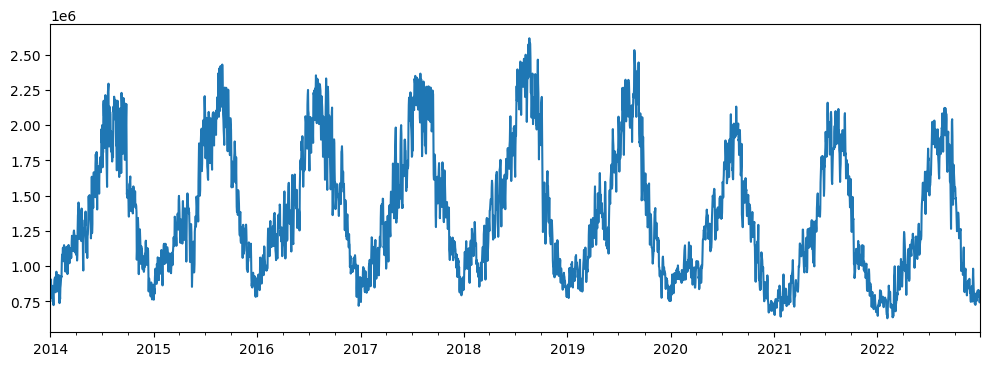

In [929]:
# Creamos una gráfica de tamaño (12,4) de la variable Energía total (kWh)
plt.figure(figsize=(12,4))
energia['Energía total (kWh)'].plot()
plt.show()

Se puede ver a simple vista que la serie es bastante densa, posiblemente porque aún tenemos bastantes datos, por lo tanto vamos a realizar una reducción de granularidad a semana, mes y año para analizar esta variable con más facilidad.

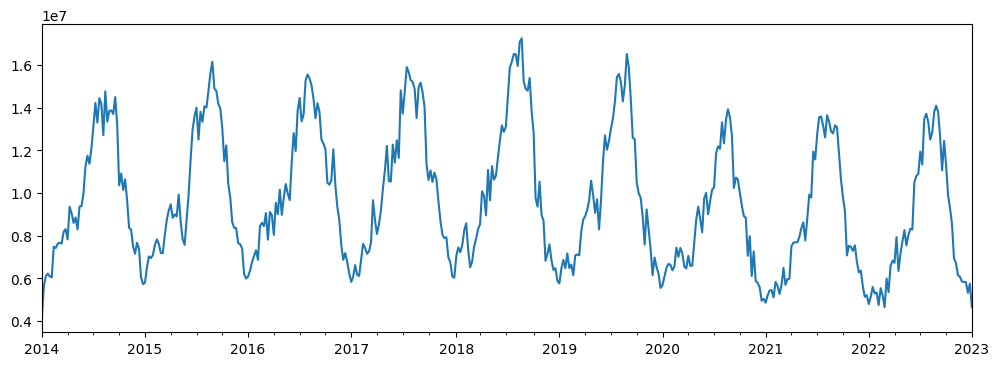

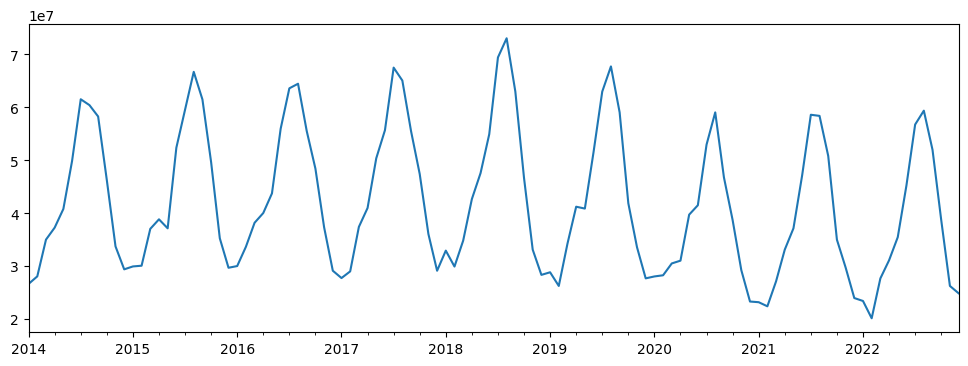

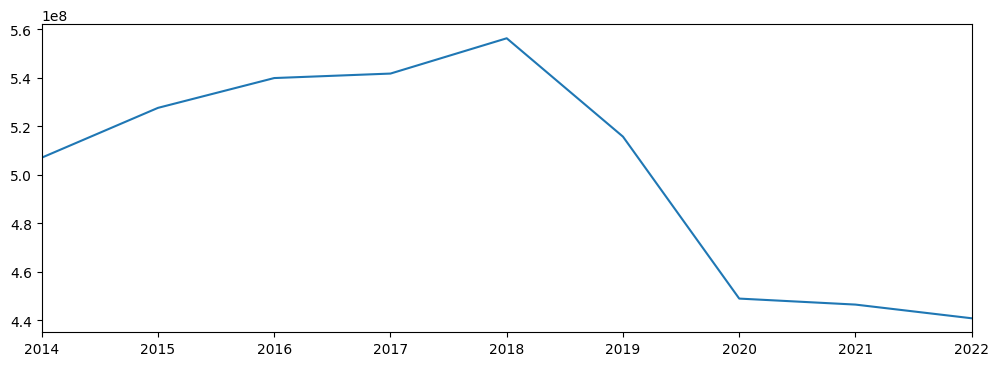

In [930]:
# Reduce granularidad a semanal de la variable
energia_semanal = energia['Energía total (kWh)'].resample('W').sum()
# Reduce granularidad a mensual de la variable
energia_mensual = energia['Energía total (kWh)'].resample('ME').sum()
# Reduce granularidad a anual de la variable
energia_anual = energia['Energía total (kWh)'].resample('YE').sum()

# Crea una gráfica (12,4) con granularidad semanal de la variable
plt.figure(figsize=(12,4))
energia_semanal.plot()
plt.show()

# Crea una gráfica (12,4) con granularidad semanal de la variable
plt.figure(figsize=(12,4))
energia_mensual.plot()
plt.show()

# Crea una gráfica (12,4) con granularidad semanal de la variable
plt.figure(figsize=(12,4))
energia_anual.plot()
plt.show()

Con granularidad anual podemos ver claramente la tendencia en el tiempo de la variable, en la cual parece haber una tendencia ascendente desde 2014 hasta 2018, luego decrementa fuertemente desde 2018 hasta 2020, y luego sigue decrementando desde 2020 hasta 2022 de forma mucho menos notoria.

Ahora vamos a revisar si hay alguna posible estacionalidad, y para que se vea de forma más o menos clara, lo haremos cada 3 años las gráficas.

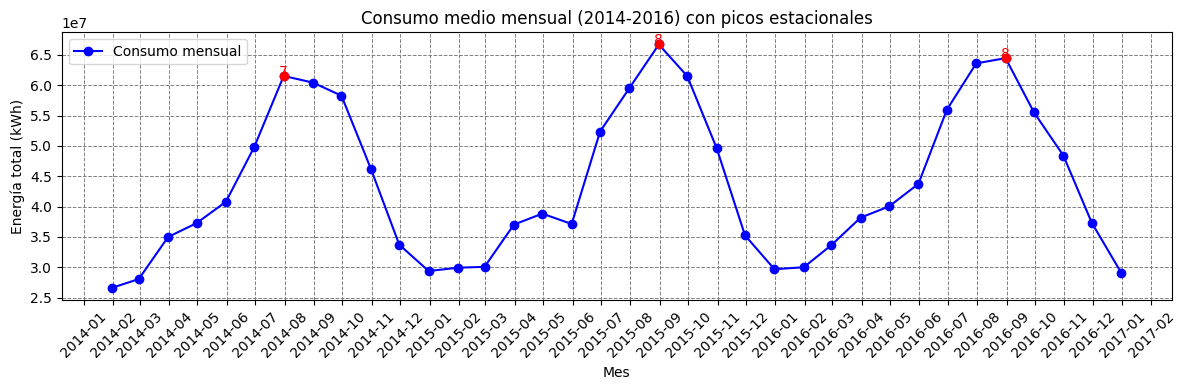

In [931]:
# Selección de rango
ts = energia_mensual["2014":"2016"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2014-2016) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Energía total (kWh)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()


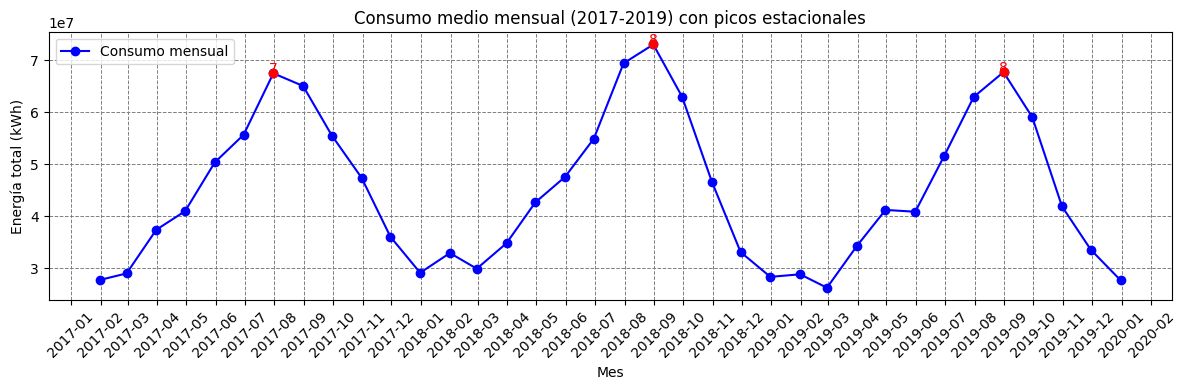

In [932]:
# Selección de rango
ts = energia_mensual["2017":"2019"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2017-2019) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Energía total (kWh)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()


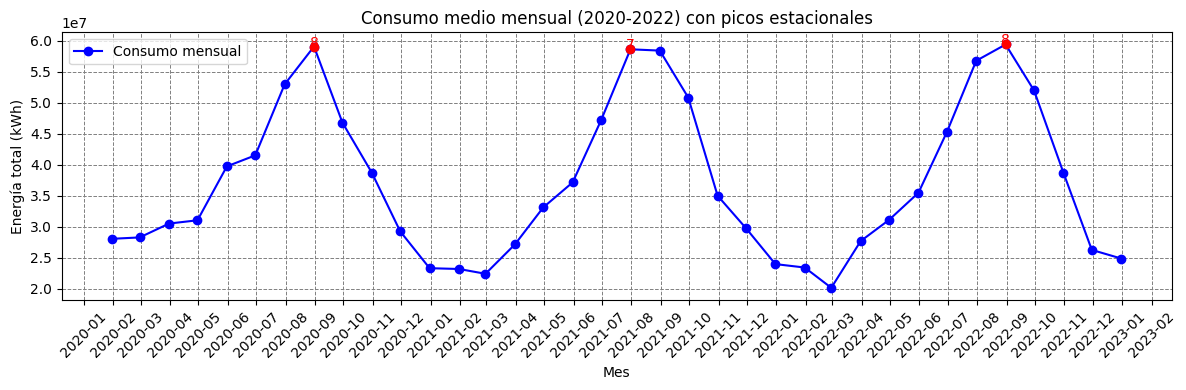

In [933]:
# Selección de rango
ts = energia_mensual["2020":"2022"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2020-2022) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Energía total (kWh)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()


Se puede ver que existe una posible estacionalidad, puesto que que parece que sube a partir de junio y baja a partir de septiembre u octubre, bajando de manera consistente hasta enero, cada año. Luego revisaremos el decompose para confirmarlo.

Ahora vamos a analizar el histograma.

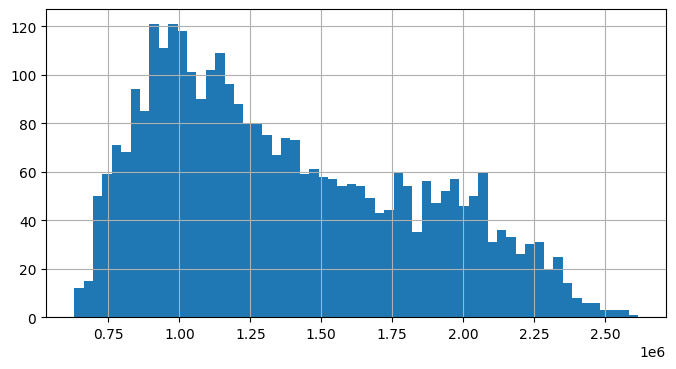

In [934]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Energía total (kWh)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 700000 y 1400000, haciendo que la mayor parte de Energía total (kWh) esté entre la parte baja y mediana del histograma, haciendo haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a analizar los componentes que tenemos cuando descompongamos la variable.

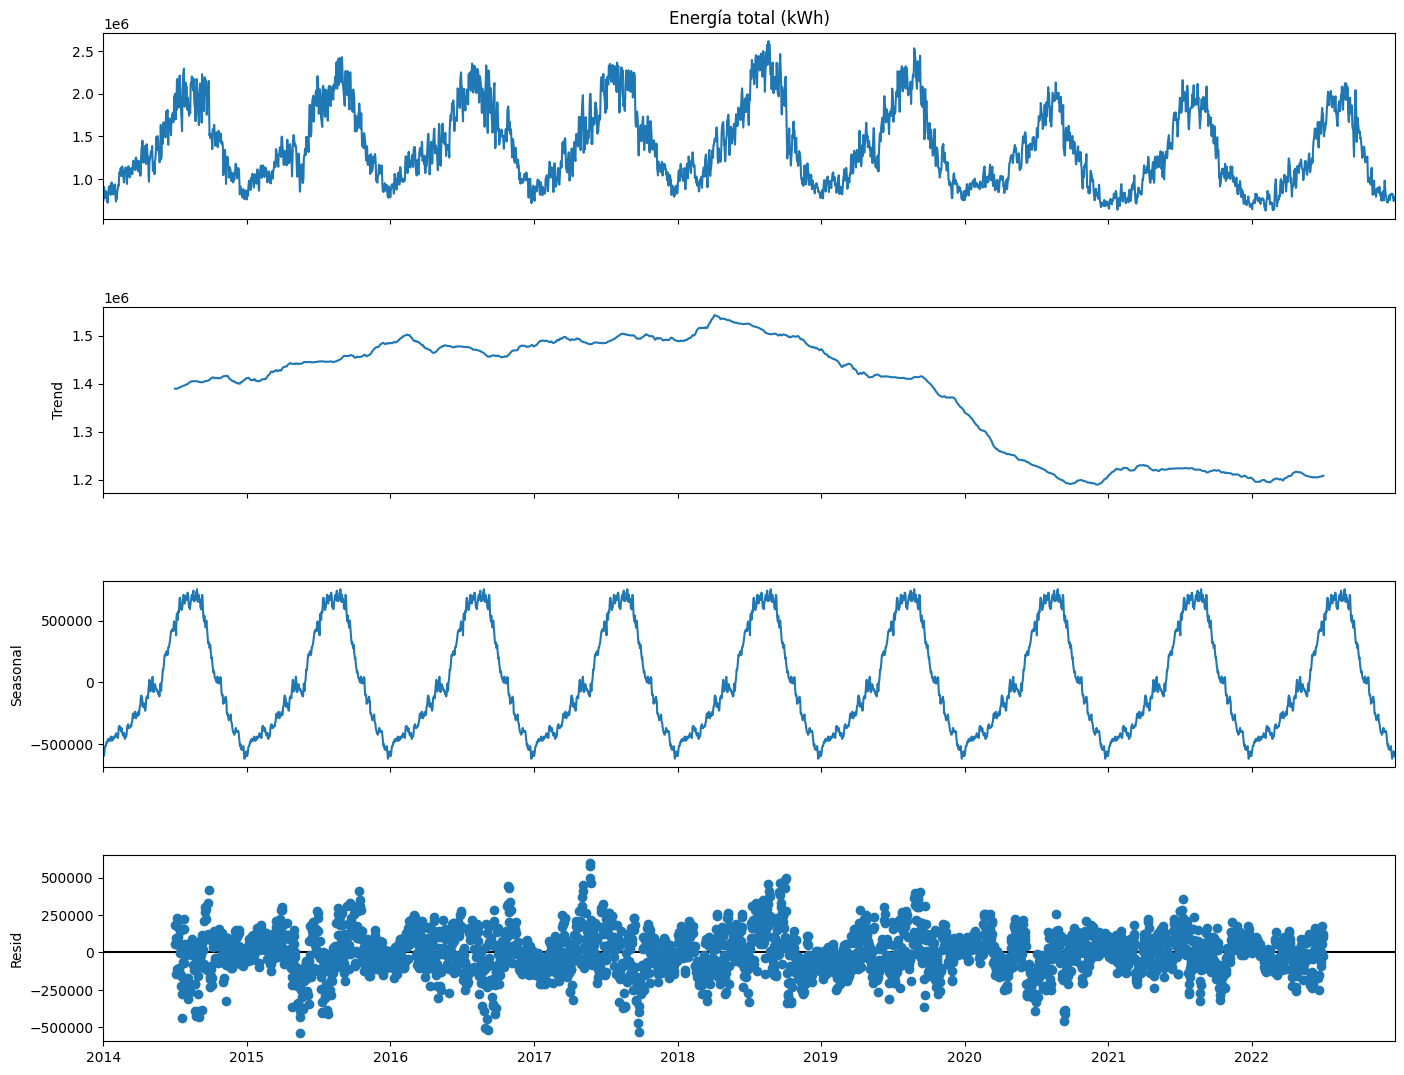

In [935]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Energía total (kWh)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Después de varias pruebas, vemos como la tendencia y estacionalidad se pueden ver muy bien con un periodo anual (30*12). Primero revisaremos la tendencia, como habíamos hecho antes, donde había un ascenso, luego un descenso, y luego otro descenso mucho más lento.

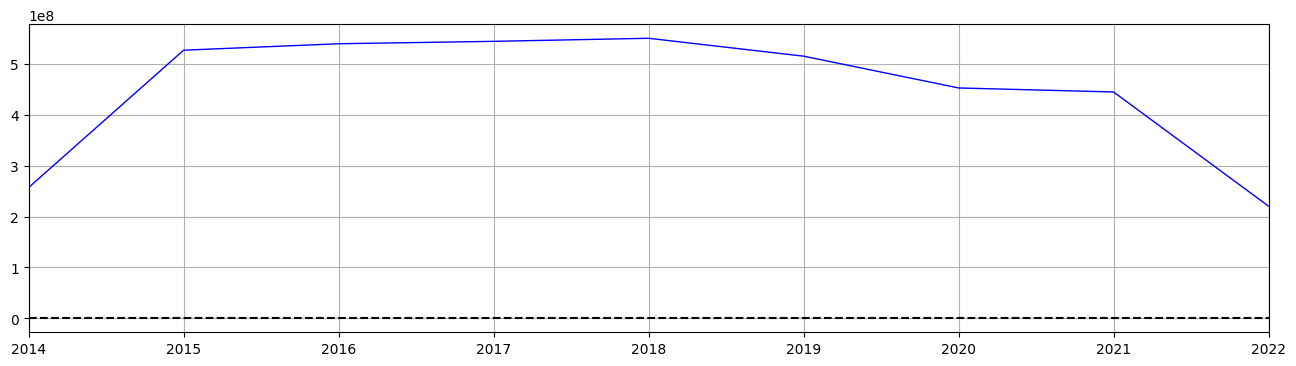

In [936]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Al igual como habíamos visto antes, se puede ver una tendencia que incrementa desde 2014 hasta 2018, y luego que desciende desde 2018 hasta 2022.

Comprobaremos la estacionalidad.

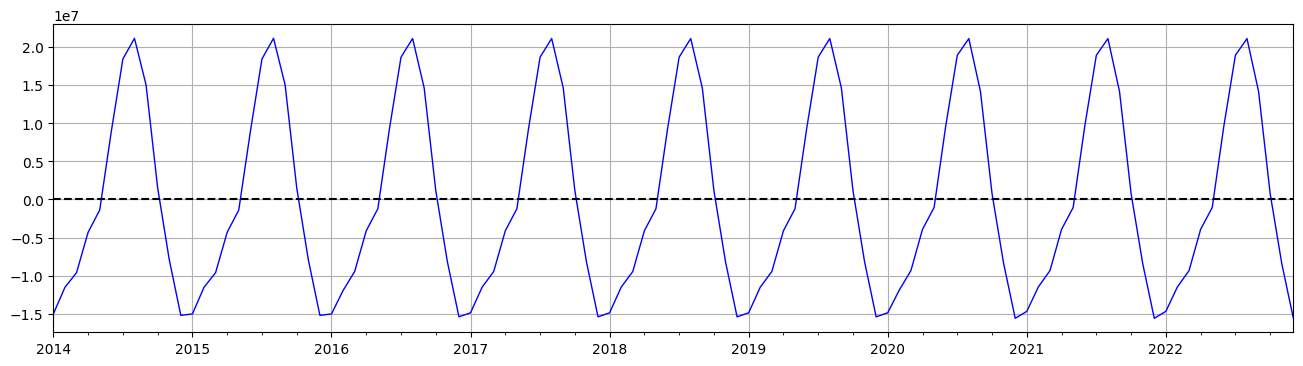

In [937]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Pese a que tenemos nuestro Seasonal en periodo anual, lo describimos a través de granularidad mensual. Podemos ver que, efectivamente, hay una estacionalidad en esta variable, ya que hay repeticiones del mismo patrón, haciendo que esta variable pueda ser fácilmente predecible ya que sabemos que se irá repitiendo cada año.

Ahora vamos a analizar el ruido.

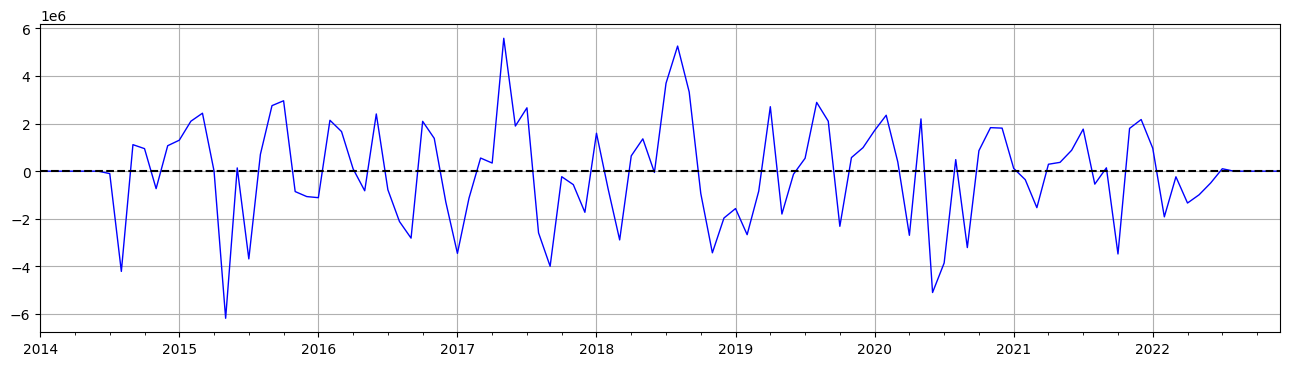

In [938]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Analizando el residual podemos ver como no recoge estacionalidad, oscila alrededor de 0 por lo que decompose está hecho de forma correcta, no hay tendencia, hay una variabilidad mas o menos constante, y no se nota la presencia de outliers.

Ahora vamos a revisar a ver si hay estacionalidad semanal en la variable objetivo.

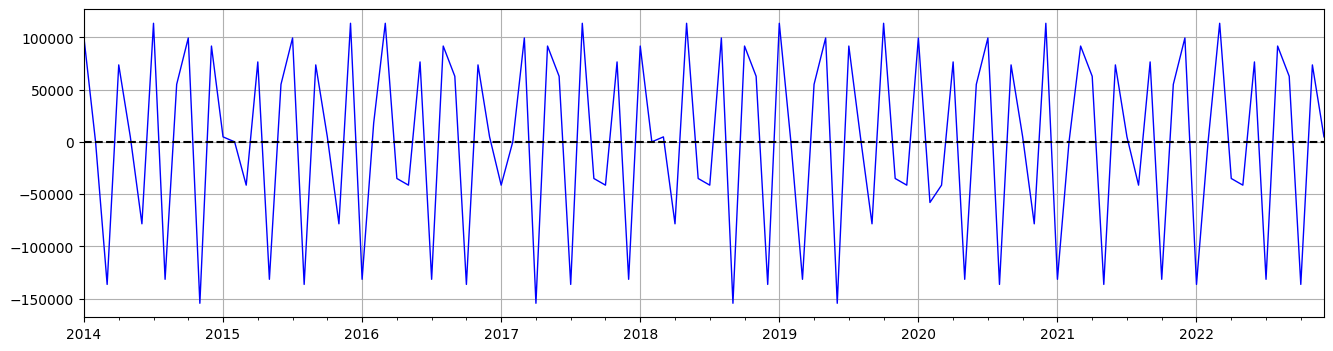

In [939]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Energía total (kWh)'], model='additive', period=7)

# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Podemos ver como también hay una estacionalidad semanal ya que hay una repetición de patrones a lo largo del tiempo.

Ahora vamos a hablar de la estacionariedad.

In [940]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Energía total (kWh)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.967523
p-value: 0.001590
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.001590 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Ahora revisaremos la autocorrelación con lags=7 puesto que más adelante se nos pide un horizonte temporal de 7 días de la energía total consumida.

<Figure size 1000x600 with 0 Axes>

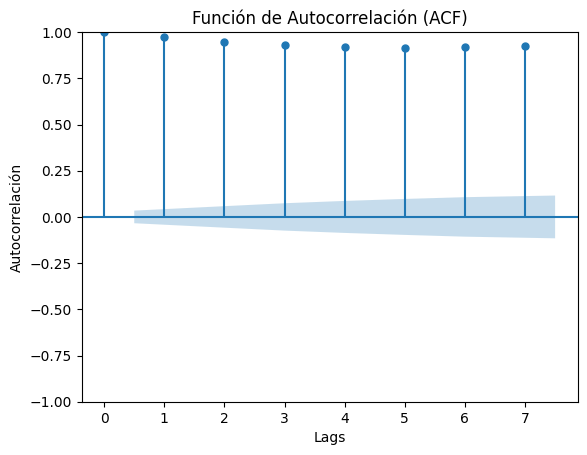

In [941]:
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(energia['Energía total (kWh)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Se puede ver que hay una autocorrelación muy alta en todos los puntos del lag, todos encima del 75%, indicando una dependencia entre los valores presentes y pasados.

<Figure size 1000x600 with 0 Axes>

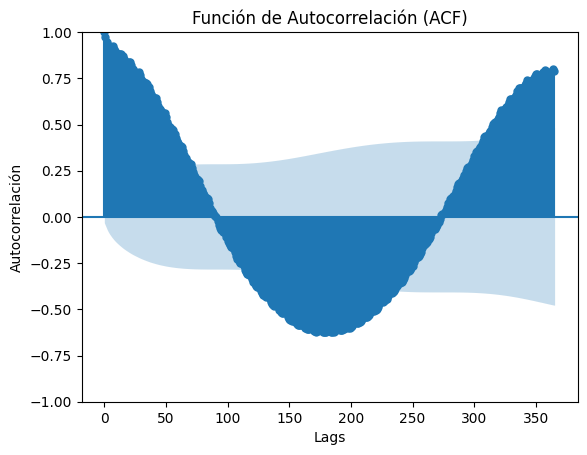

In [942]:
# Se crea una gráfcia de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Energía total (kWh)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 (un año) confirmamos que hay estacionalidad.

### Electricidad (kW)

Realizamos el histograma para ver como están distribuidos los datos.

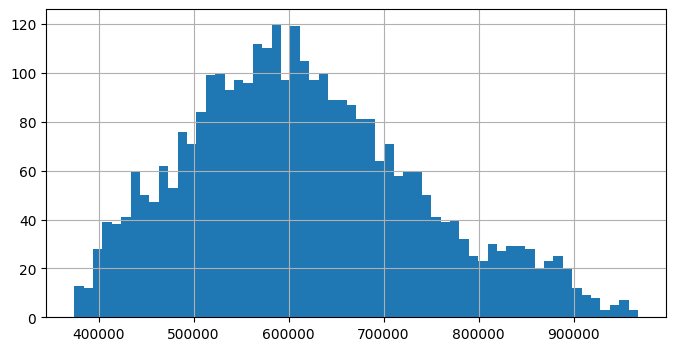

In [943]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Electricidad (kW)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 450000 y 750000, haciendo que la mayor parte de Electricidad (kW) esté entre la parte baja y mediana superior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

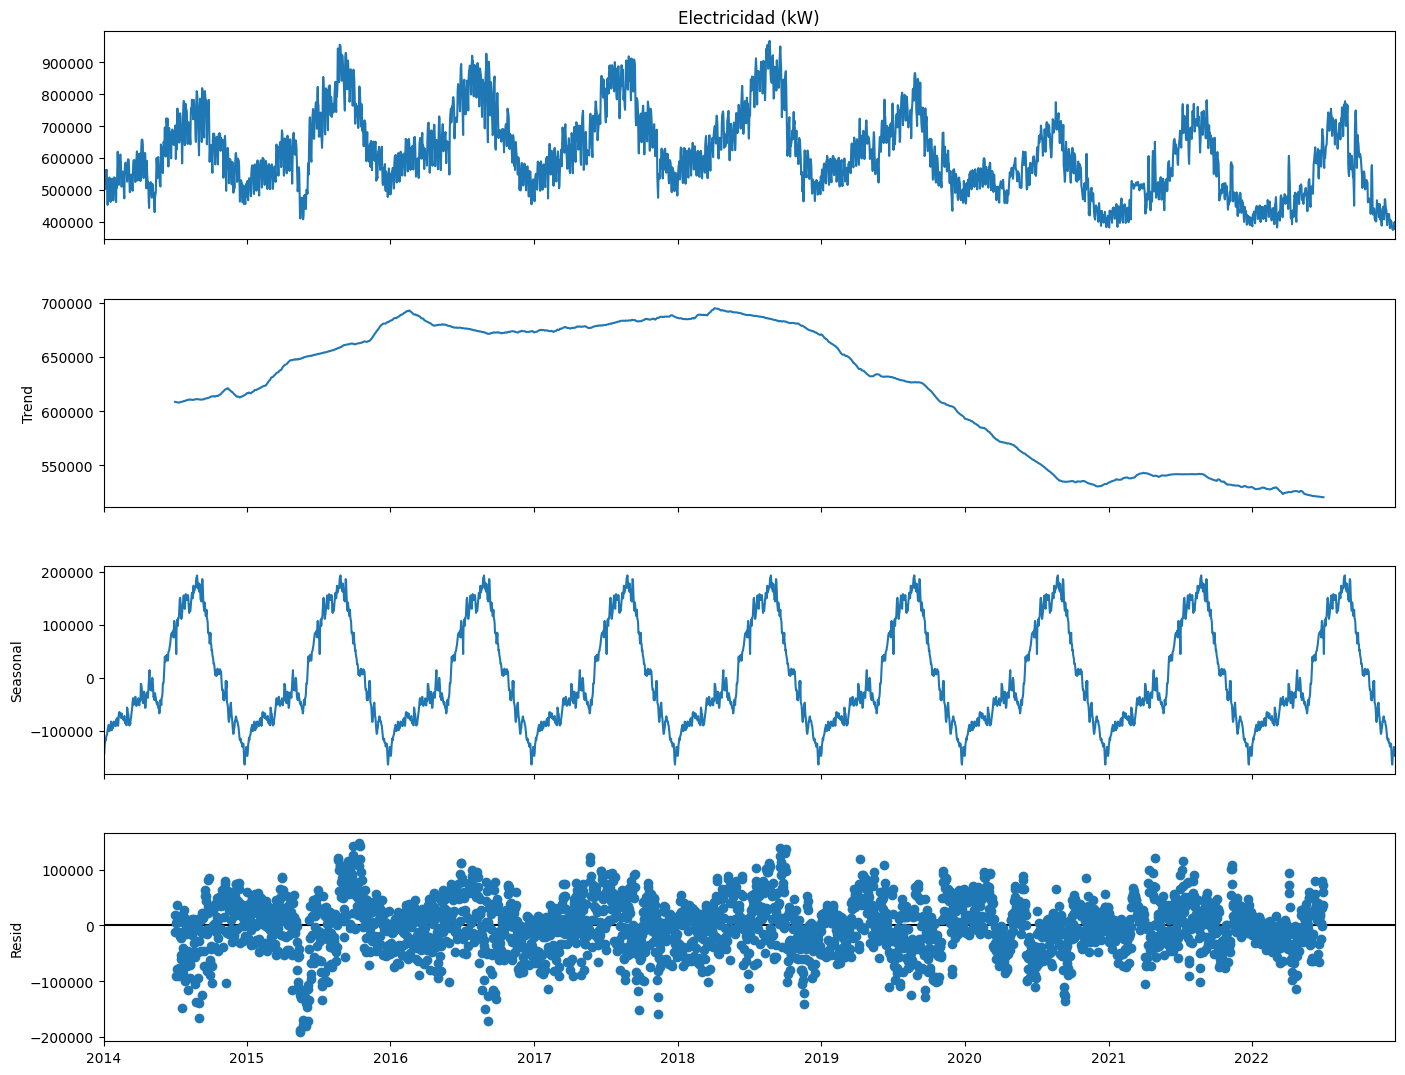

In [944]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Electricidad (kW)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

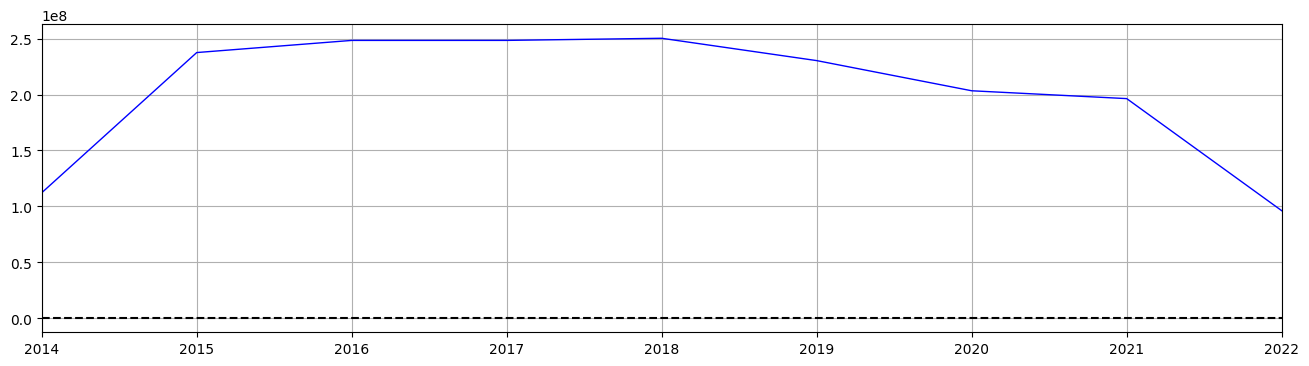

In [945]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, vemos en la tendencia un ascenso desde 2014 a 2016, mantiene su valor hasta 2018, a partir de 2018 desciende.

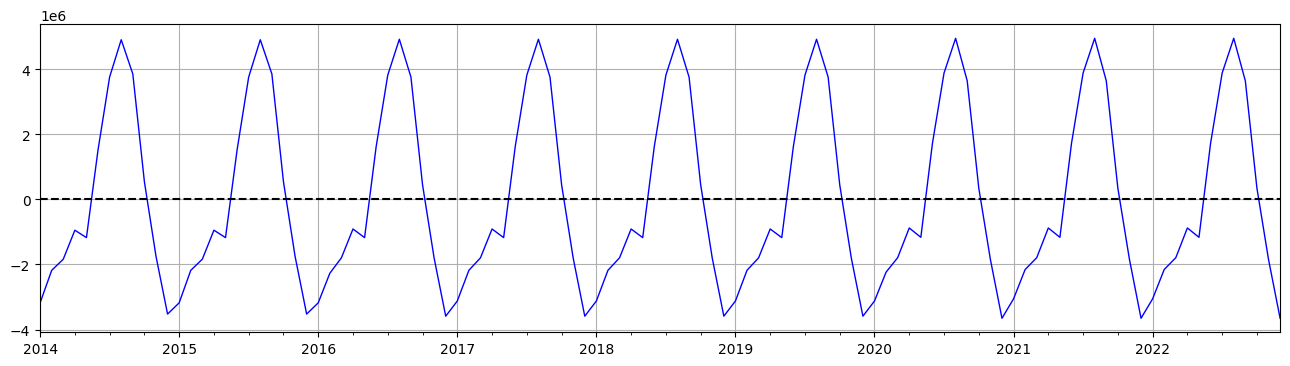

In [946]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

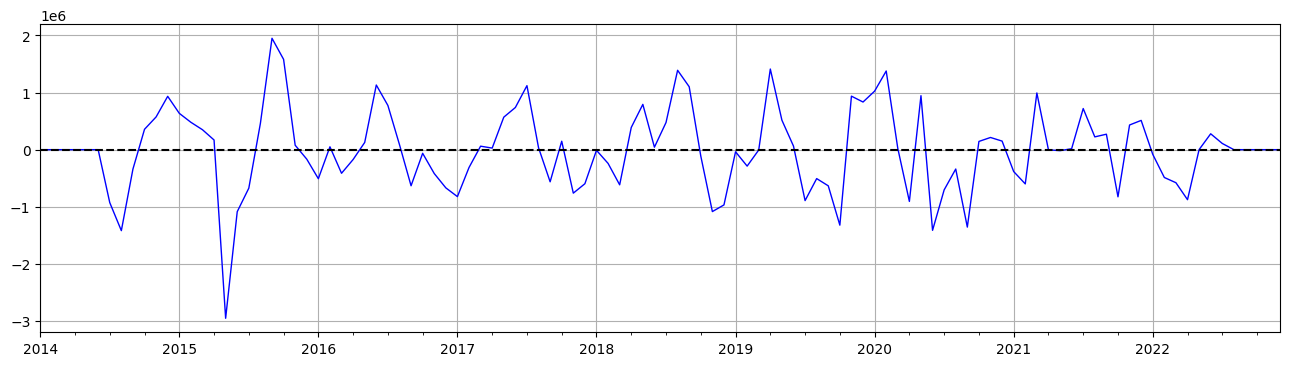

In [947]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [948]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Electricidad (kW)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.425947
p-value: 0.010105
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.010105 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

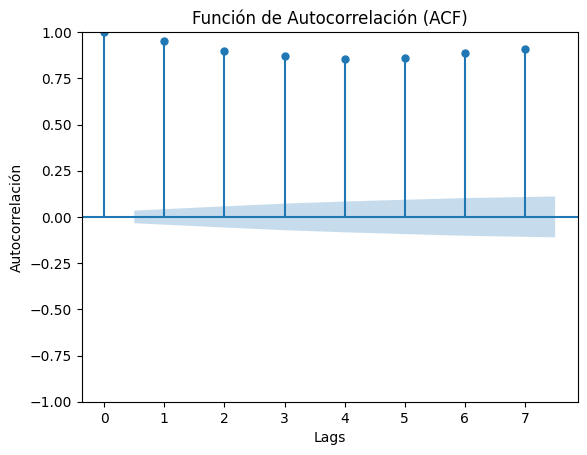

In [949]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Electricidad (kW)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 75% haciendo que haya dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

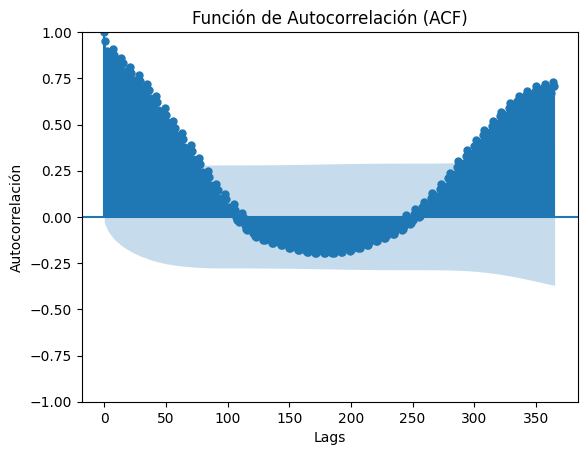

In [950]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Electricidad (kW)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

### Fotovoltaica (kW)

Realizamos el histograma para ver como están distribuidos los datos.

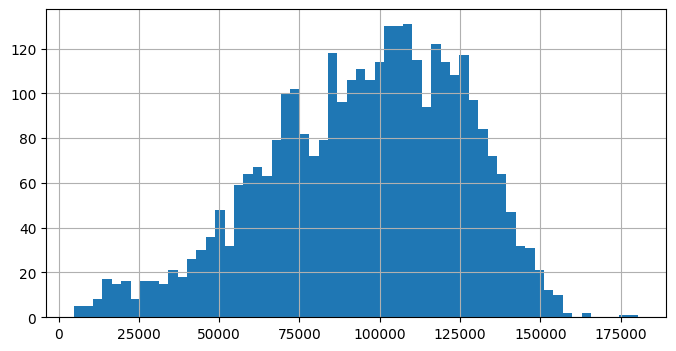

In [951]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Fotovoltaica (kW)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 60000 y 140000, haciendo que la mayor parte de Fotovoltaica (kW) esté entre la parte mediana inferior y superior del histograma, haciendo que haya una cola hacia la izquierda y por lo tanto, un sesgo negativo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el los componentes de la variable.

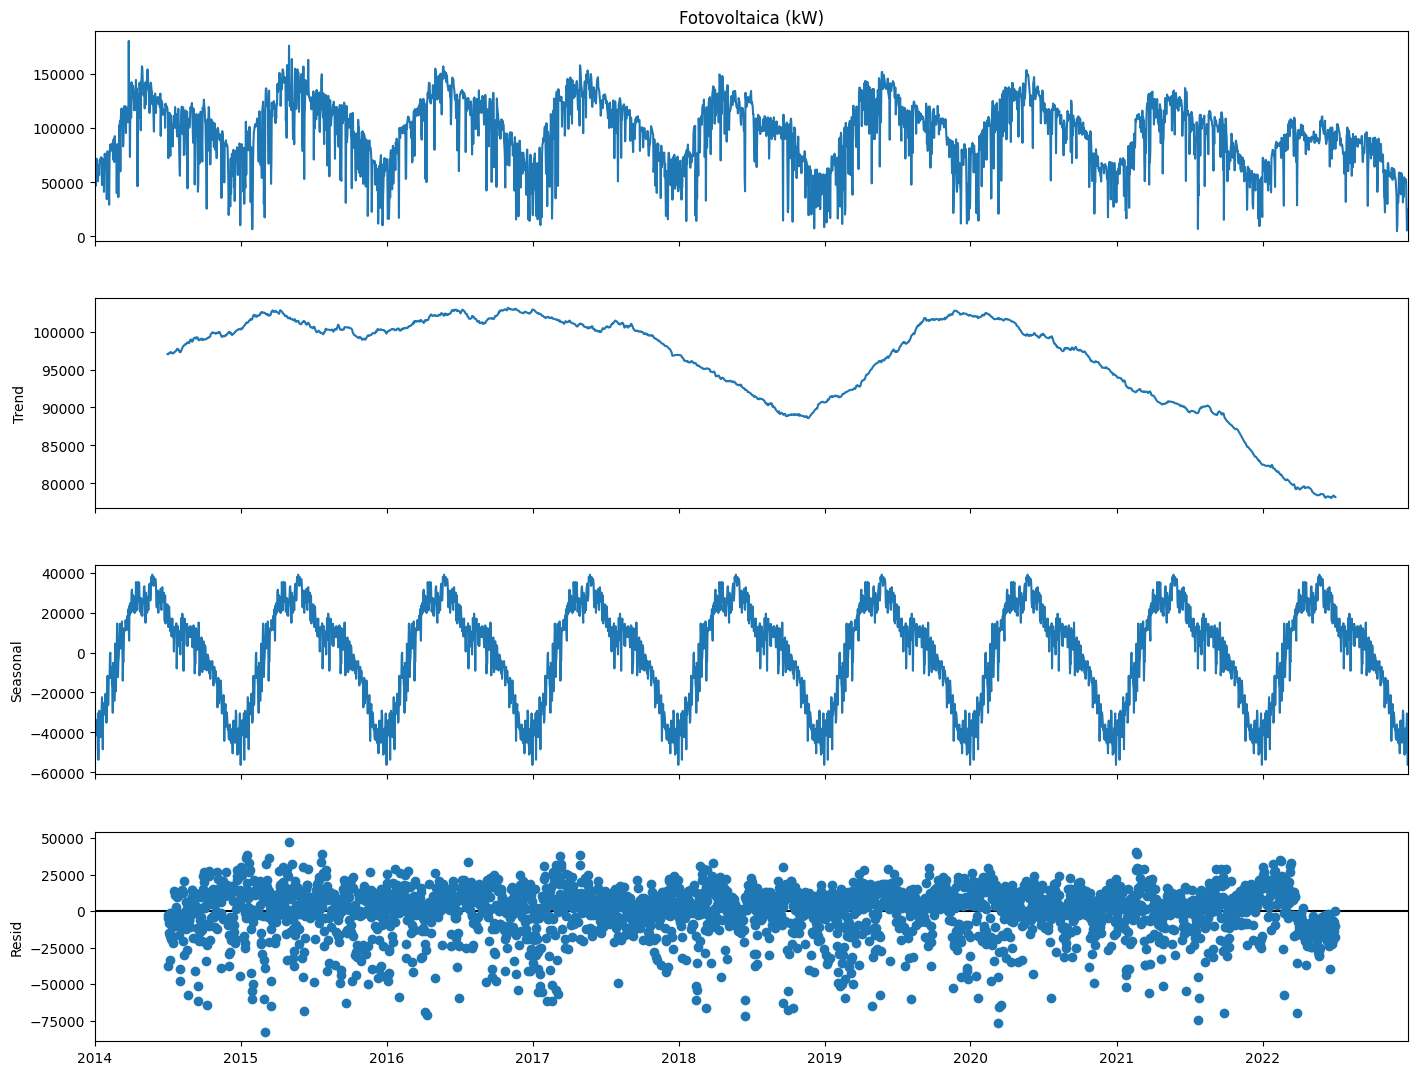

In [952]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Fotovoltaica (kW)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Elegimos el periodo anual porque podemos ver bien la tendencia, la estacionalidad y el ruido.

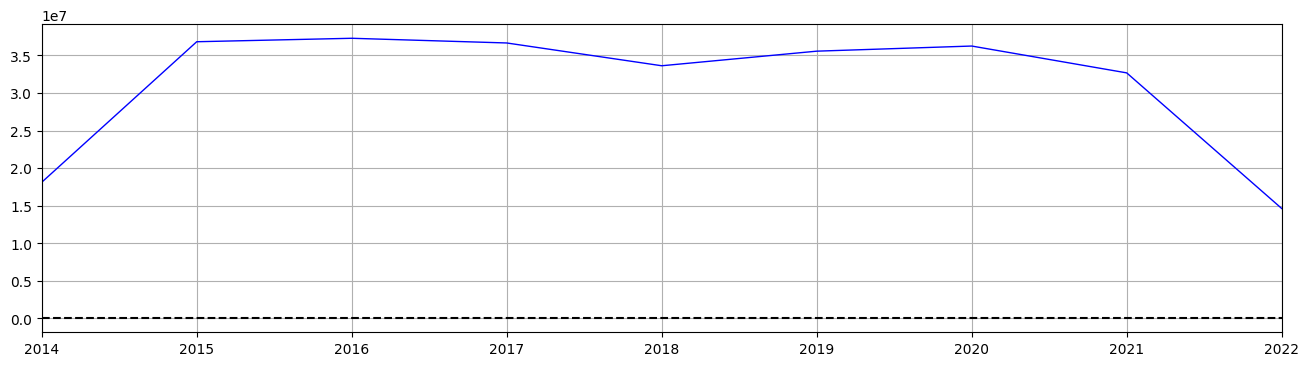

In [953]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver un ascenso desde 2014 hasta 2016, un descenso hasta 2018, un ascenso hasta 2020, y luego un fuerte descenso.

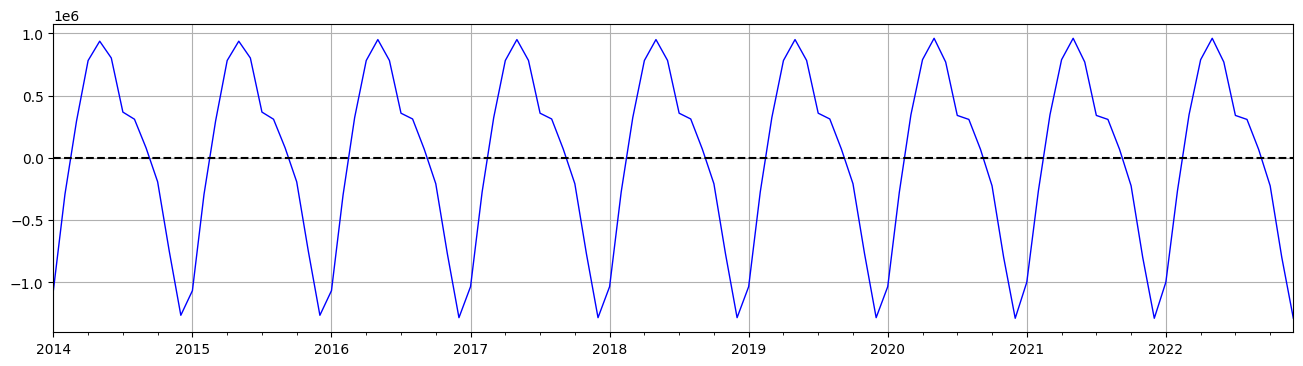

In [954]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver cómo existe una estacionalidad, por lo que el patrón se repetirá periódicamente.

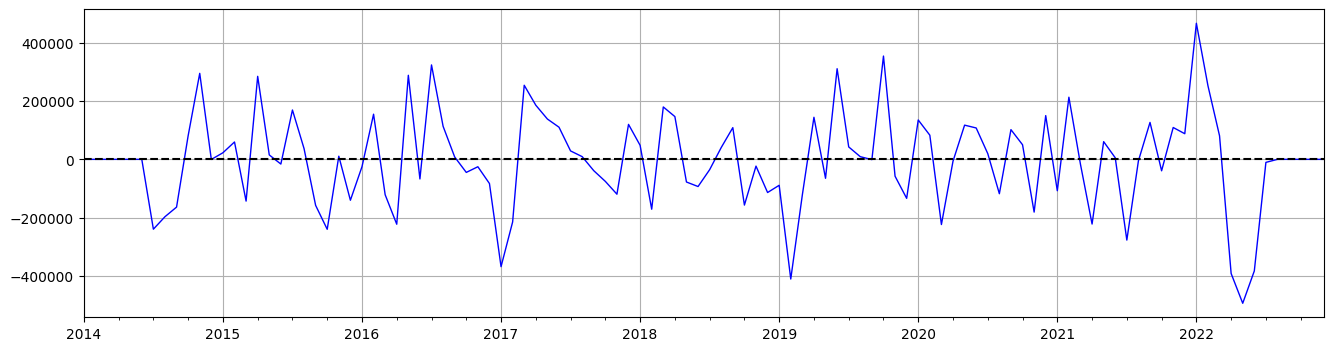

In [955]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver como no hay una tendencia, no hay estacionalidad, la gráfica ronda el 0, no hay outliers y hay menos ruido al principio que al final.

In [956]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Fotovoltaica (kW)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.256998
p-value: 0.016914
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.016914 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

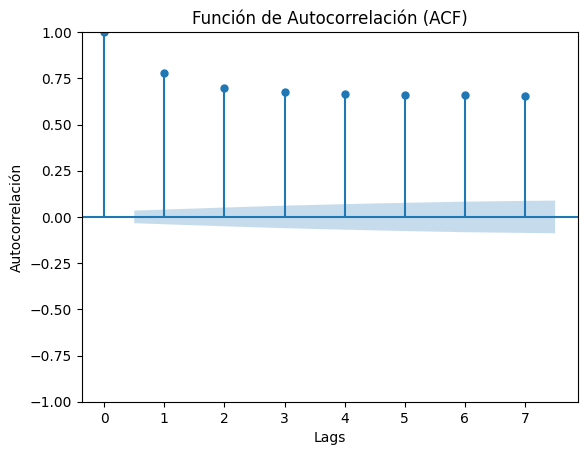

In [957]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Fotovoltaica (kW)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

En cuanto a la autocorrelación, podemos ver como hay una correlación mayor del 60% por lo que hay una fuerte dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

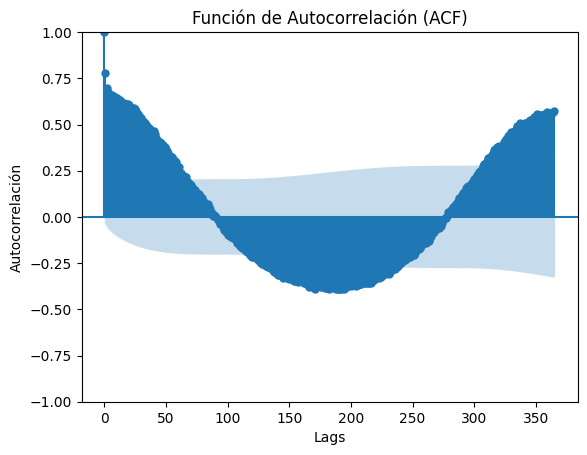

In [958]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Fotovoltaica (kW)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Vemos que hay estacionalidad con lag=365.

### Refrigeración (kW)

Realizamos el histograma para ver como están distribuidos los datos.

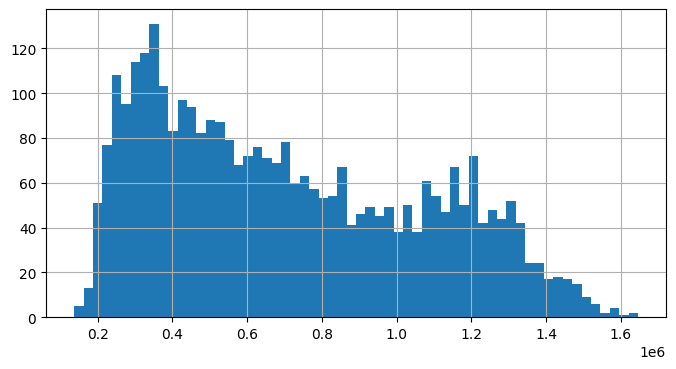

In [959]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Refrigeración (kW)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 200000 y 1300000, haciendo que la mayor parte de Refrigeración (kW) esté entre la parte baja y casi superior que del histograma, haciendo haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a ver los componentes de la variable.

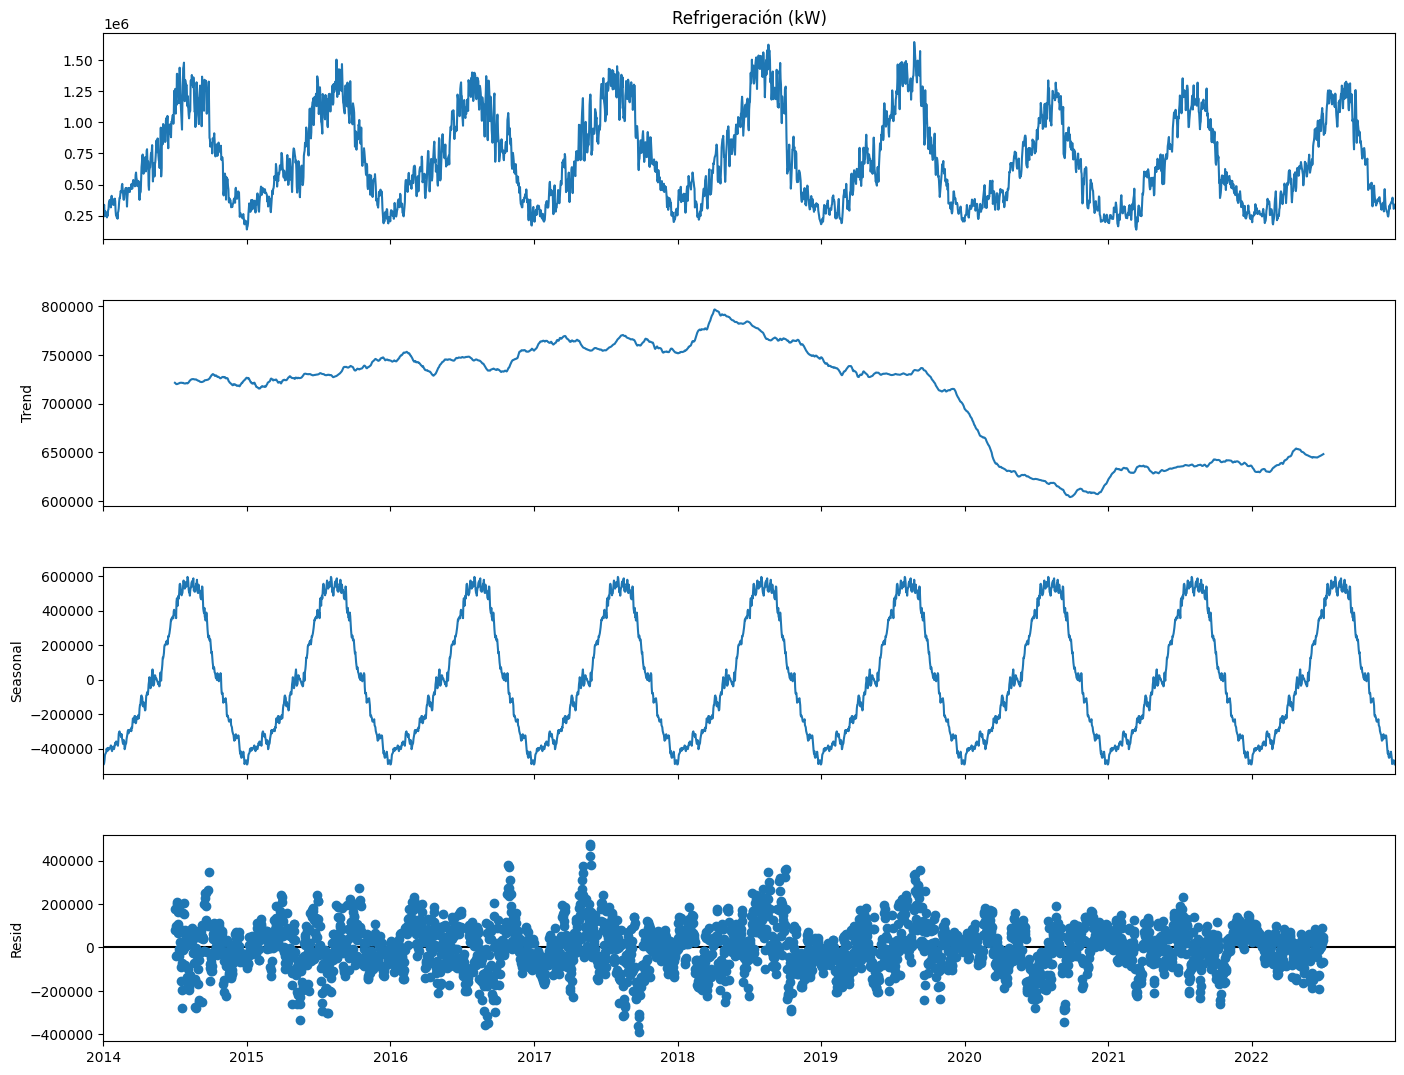

In [960]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Refrigeración (kW)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Con periodo anual podemos ver perfectamente la tendencia, la estacionalidad y el ruido.

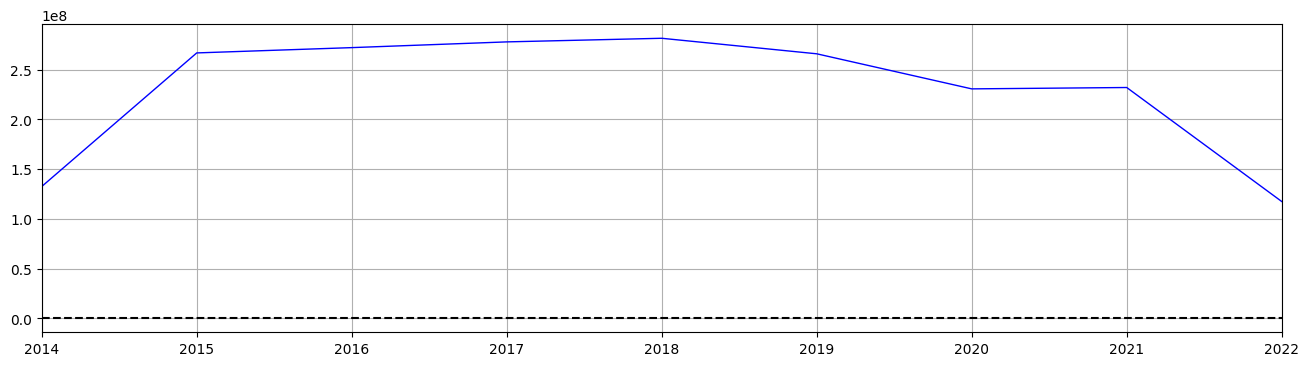

In [961]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver un ascenso desde 2014 hasta 2018, luego un descenso hasta 2020, se mantiene hasta 2021, y luego baja.

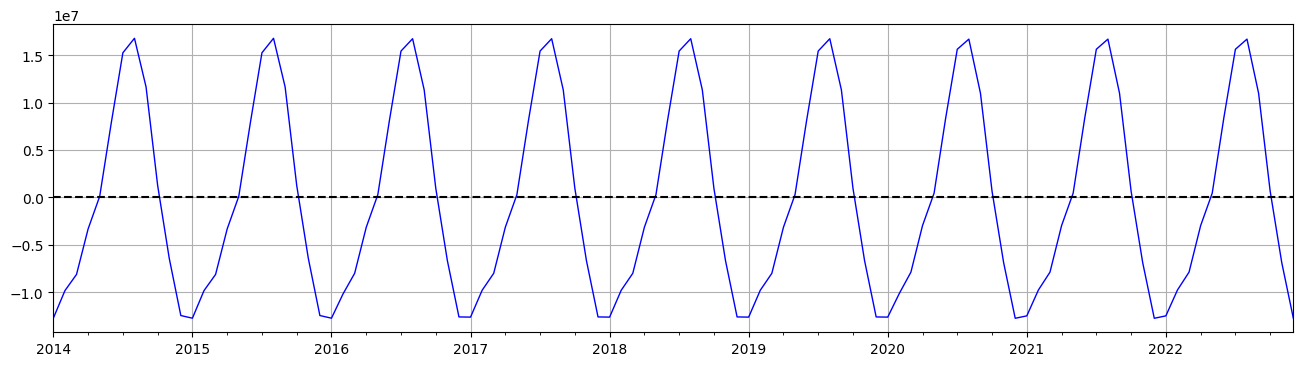

In [962]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay una clara estacionalidad, haciéndonos saber que seguramente el patrón se repetirá periódicamente.

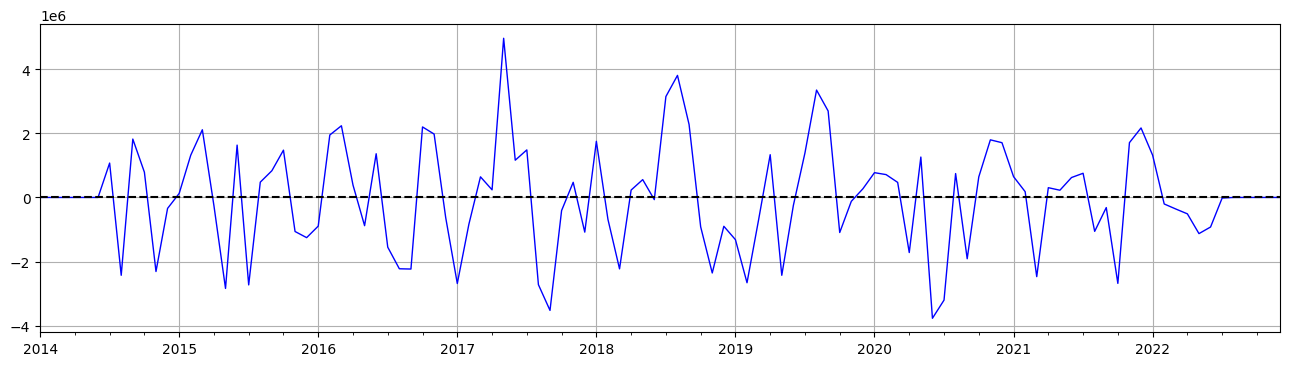

In [963]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver que en el ruido no tenemos tendencia, ni estacionalidad, ni outliers, ronda por 0 y hay un ruido más o menos estable al principio y final.

In [964]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Refrigeración (kW)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.972714
p-value: 0.001560
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.001560 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

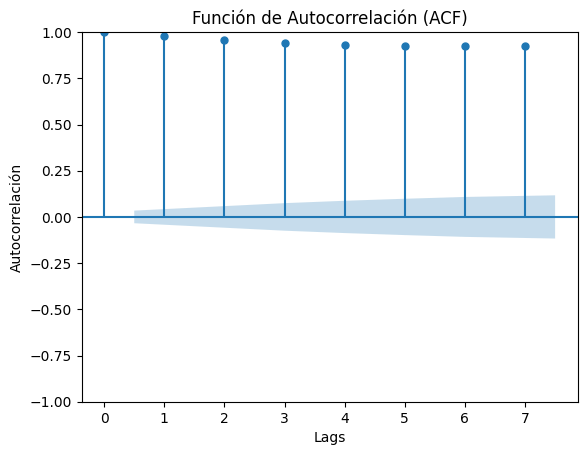

In [965]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Refrigeración (kW)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Parece haber una autocorrelación bastante mayor que 75%, por lo tanto, hay una fuerte dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

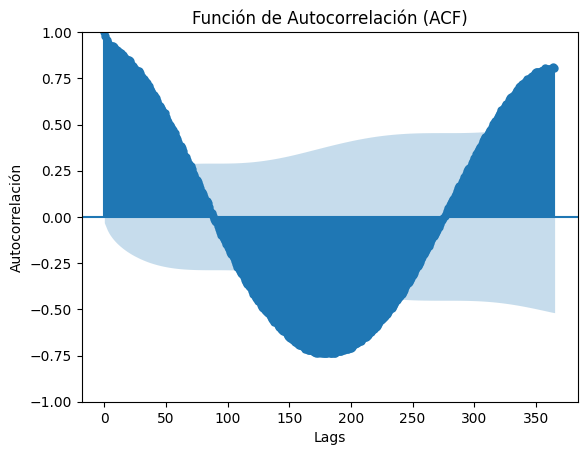

In [966]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Refrigeración (kW)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Confirmamos la estacionalidad.

### Calefacción (kWh)

Realizamos el histograma para ver como están distribuidos los datos.

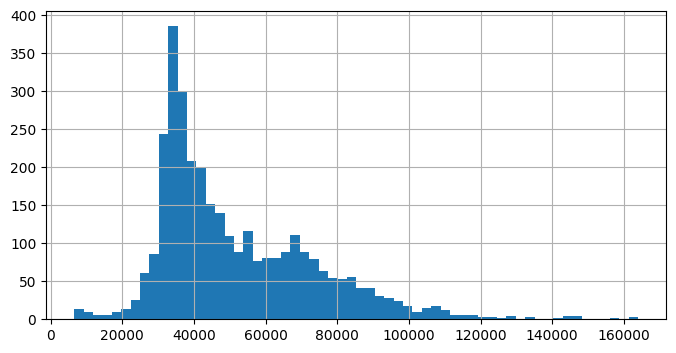

In [967]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Calefacción (kWh)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 30000 y 50000, haciendo que la mayor parte de Calefacción (kWh) esté en la parte baja histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante estrecha, puesto que los datos están muy concentrados en una parte pequeña de la variable.

Vamos a revisar las componentes principales de la variable.

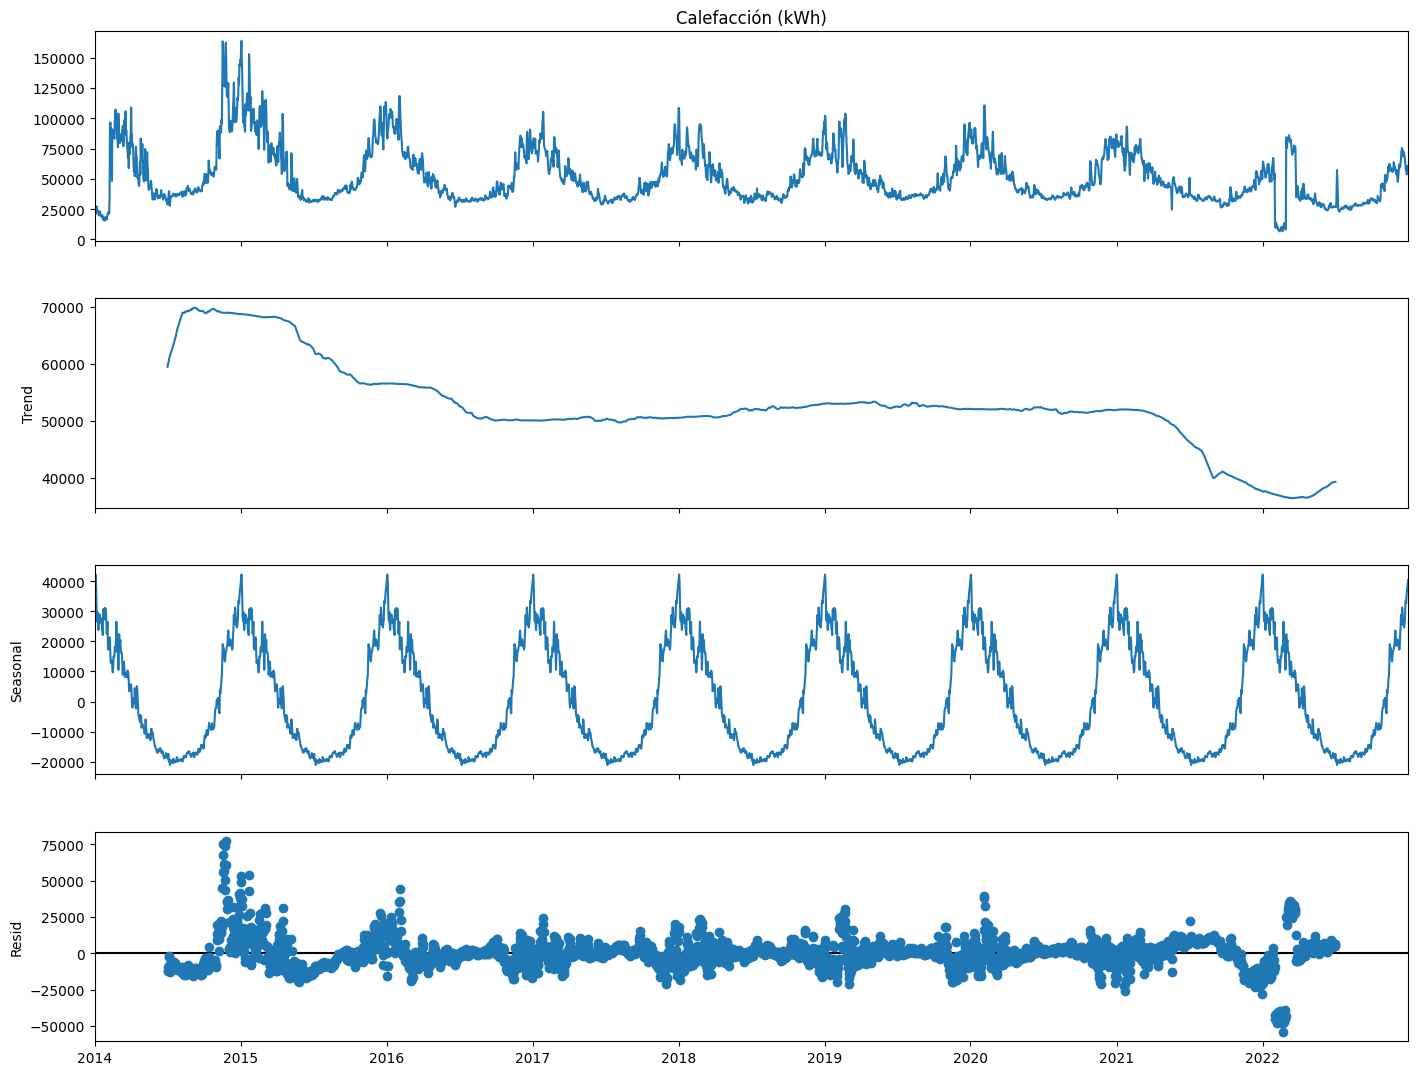

In [968]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Calefacción (kWh)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Con periodo anual podemos ver como se puede presenciar de manera clara la tendencia, estacionalidad y ruido.

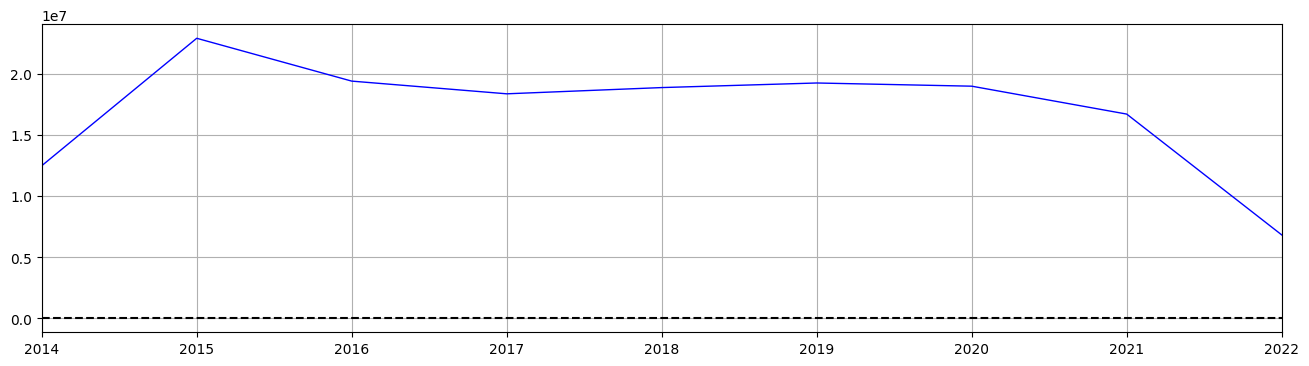

In [969]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver como hay un ascenso desde 2014 hasta 2015, luego disminuye hasta 2017, aumenta de nuevo muy ligeramente hasta 2019, y luego baja bastante.

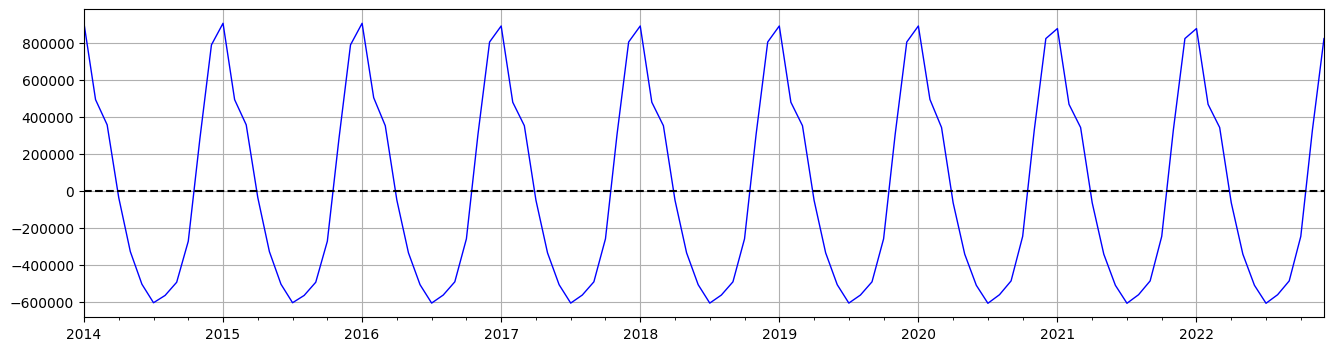

In [970]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Se puede ver como hay una clara estacionalidad, haciéndonos saber que seguramente el patrón se repetirá en el futuro.

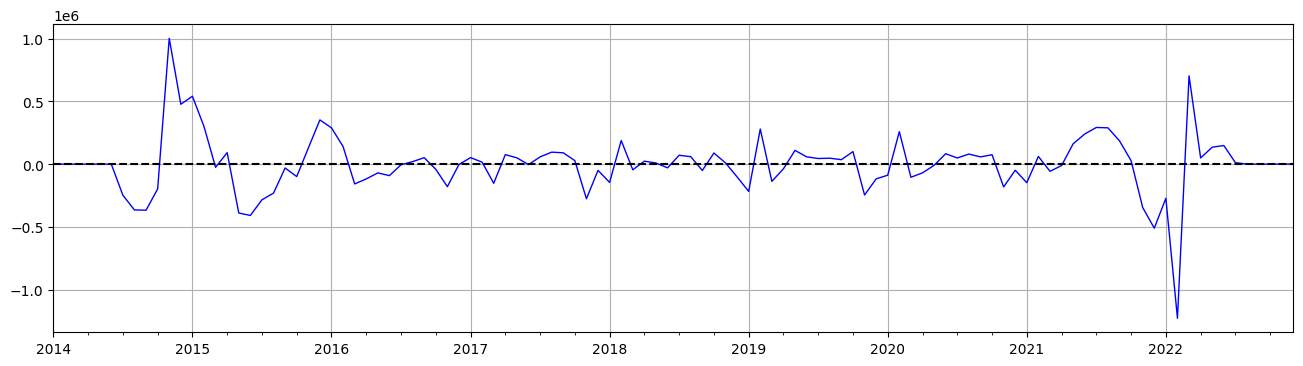

In [971]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver en cuánto al ruido, que no hay estacionalidad, no hay una tendencia, la gráfica ronda el 0, no hay outliers, y hay poco ruido a diferencia de otras variables, excepto al principio y al final.

In [972]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Calefacción (kWh)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.678441
p-value: 0.000092
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.000092 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

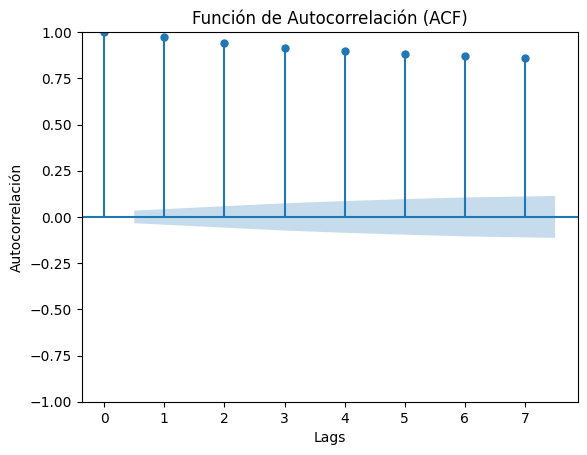

In [973]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Calefacción (kWh)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

En cuanto a la autocorrelación podemos ver como supera el 75%, por lo tanto hay una fuerte dependencia entre valores pasados y presentes. Fijarnos también que cuanto mayor es el lag, parece que va decrementando el valor de autocorrelación.

<Figure size 1000x600 with 0 Axes>

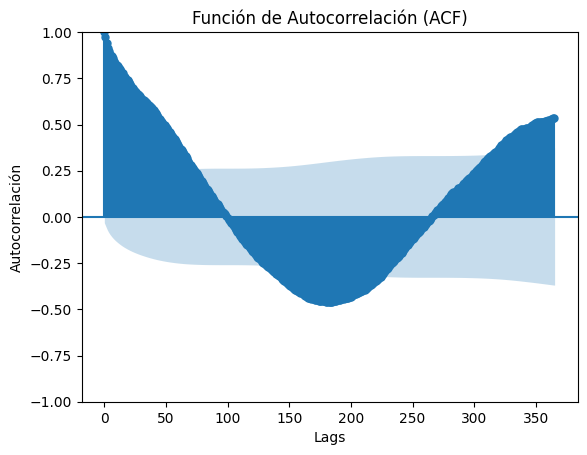

In [974]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Calefacción (kWh)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Confirmamos la estacionalidad.

### Emisión (kg CO₂)

Realizamos el histograma para ver como están distribuidos los datos.

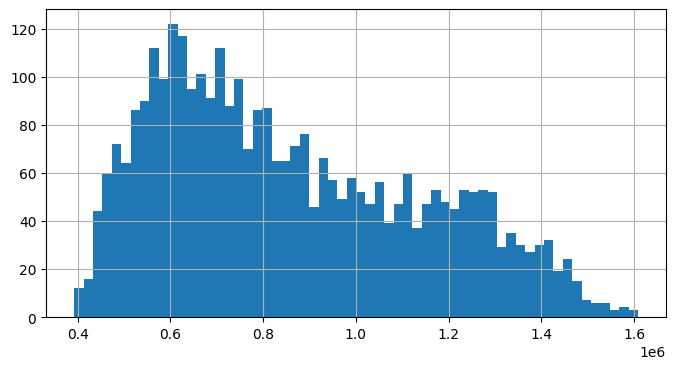

In [975]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Emisión (kg CO₂)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 450000 y 130000, haciendo que la mayor parte de Emisión (kg CO₂) esté entre la parte baja y casi superior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar las componentes principales de la variable.

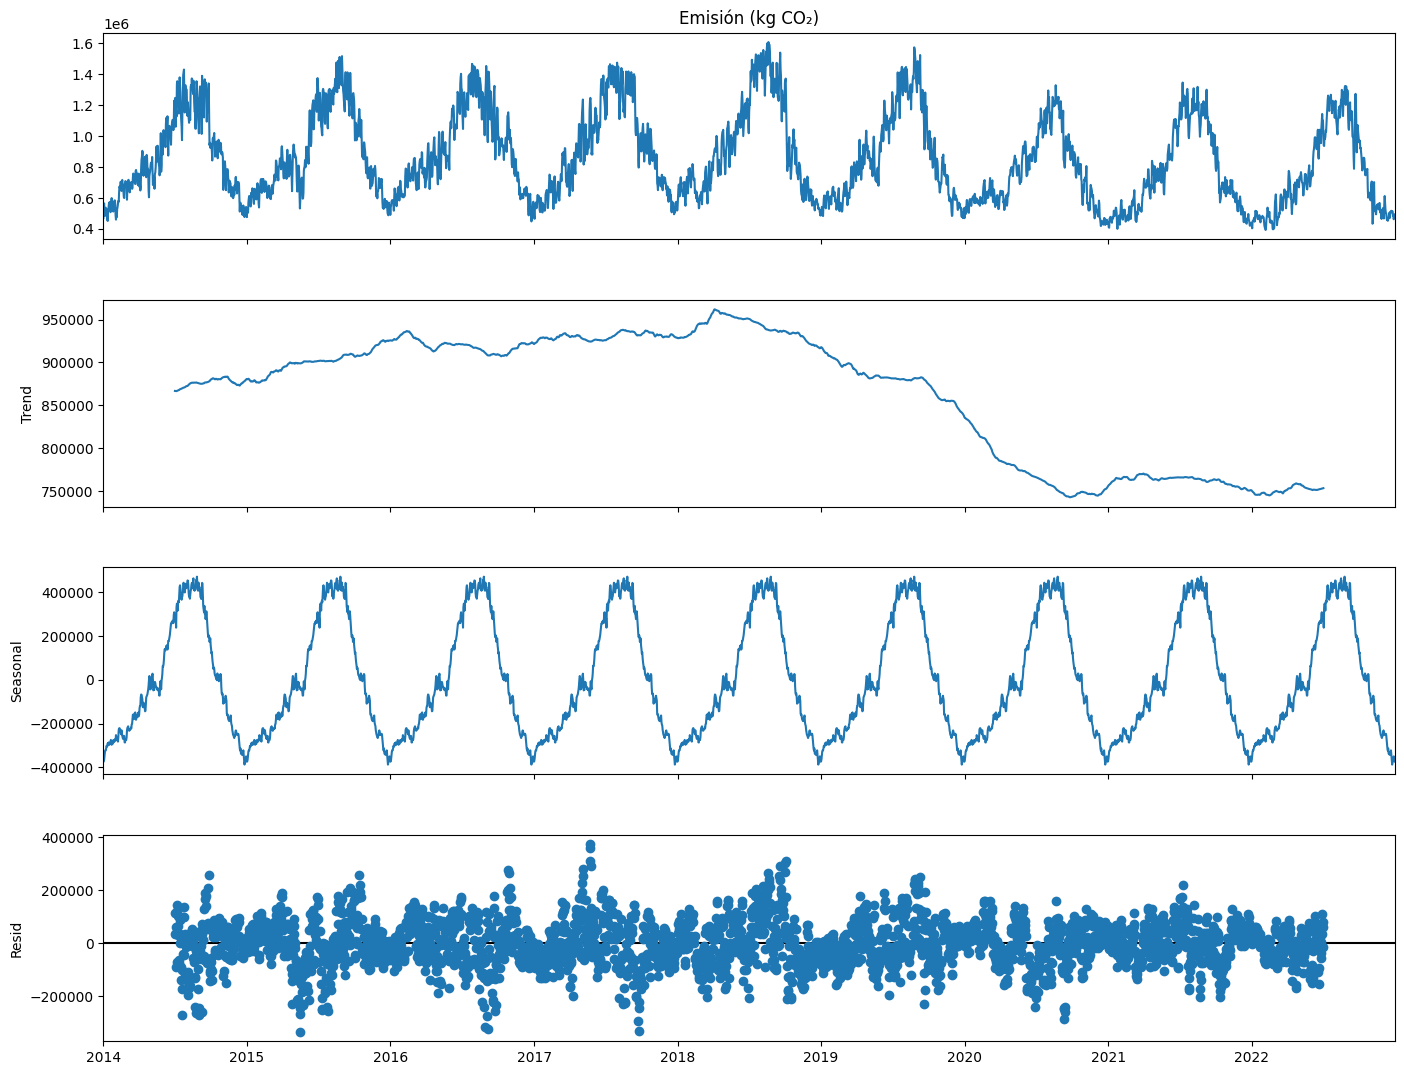

In [976]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Emisión (kg CO₂)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Con periodo anual podemos ver claramente la tendencia, estacionalidad y ruido de la serie temporal de la variable.

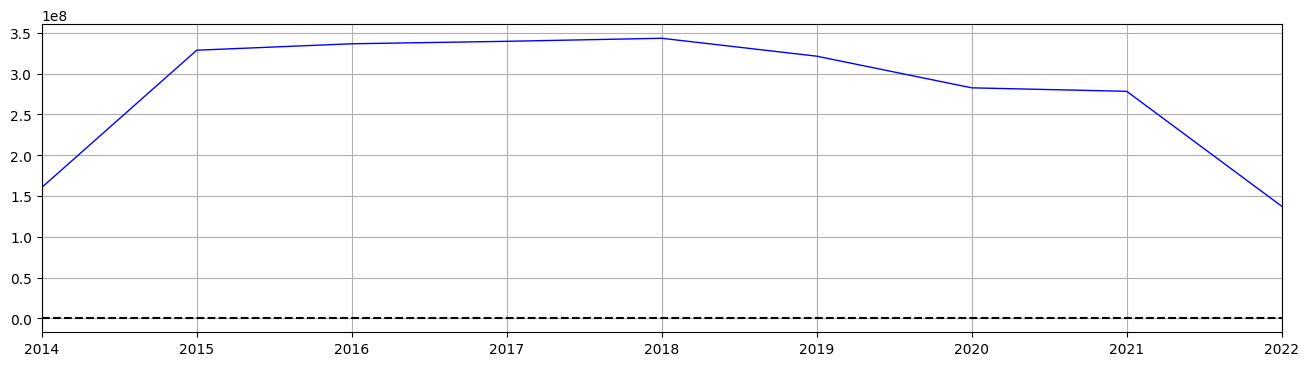

In [977]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Incremente desde 2014 hasta 2018, y luego a partir de ahí solo hay decremento.

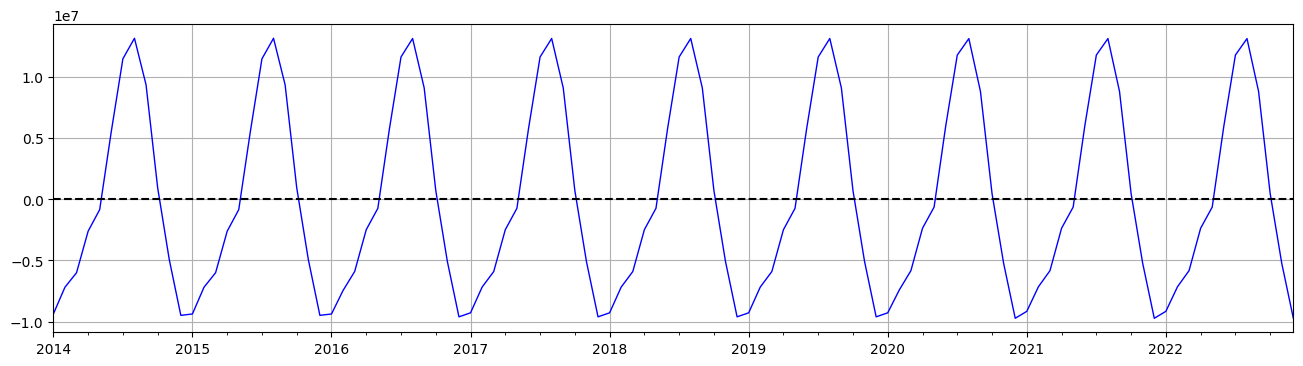

In [978]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Se puede ver que hay una clara estacionalidad en la serie temporal de la variable, por lo tanto, seguramente habrá una repetición del patrón en el futuro.

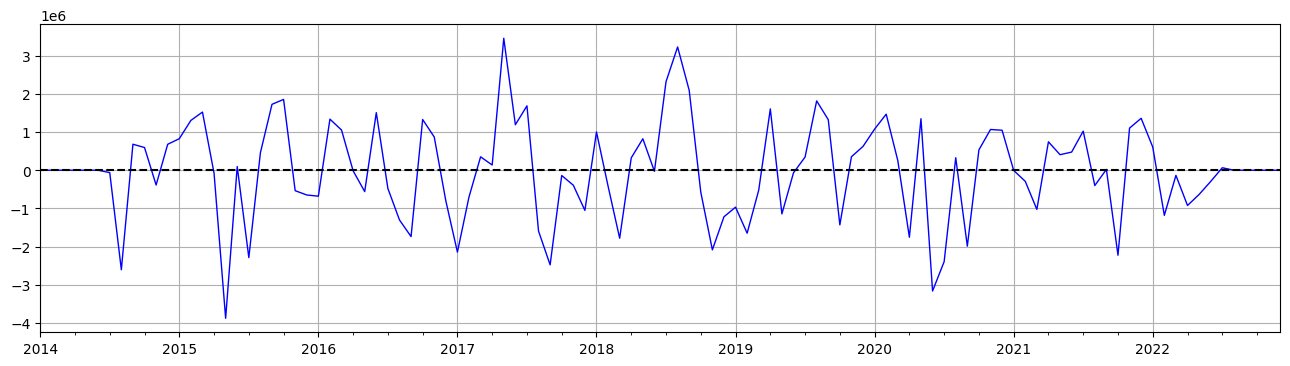

In [979]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

En cuanto al ruido no vemos estacionalidad, ni tendencia, la gráfica ronda por el 0, no hay outliers y hqy más ruido al principio que al final.

In [980]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Emisión (kg CO₂)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.985718
p-value: 0.001487
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.001487 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

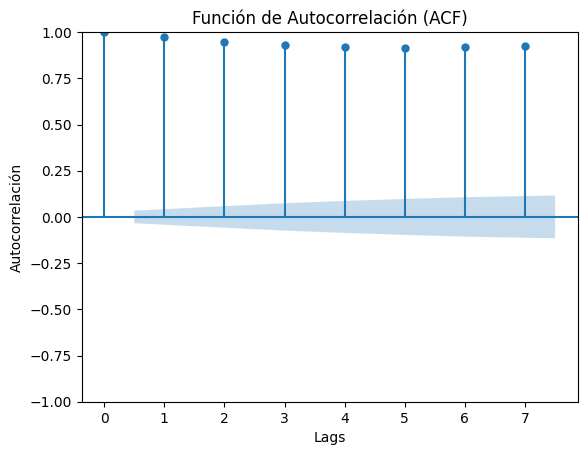

In [981]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Emisión (kg CO₂)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Se puede ver en la autocorrelación, que todos los lags tienen una autocorrelación por encima del 80%, por lo tanto, hay una fuerte dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

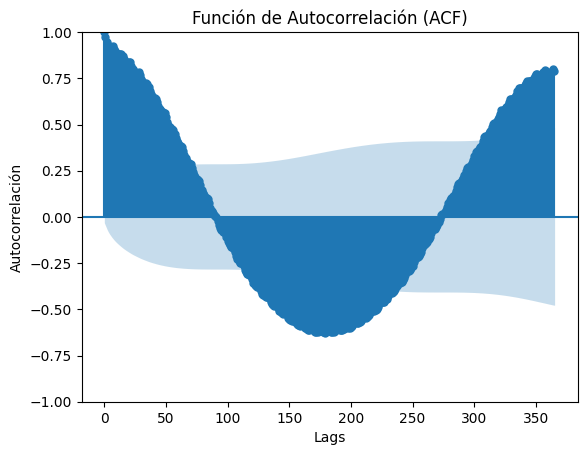

In [982]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Emisión (kg CO₂)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Se confirma estacionalidad.

## Variables endógenas y exógenas

En cuanto a las variables endógenas, variables de las que dependen la variable objetivo, son las variables: Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh) y Emisión (kg CO₂).

En cambio las variables exógenas, las cuales son variables que no dependen de las endógeneas pero que depende la variable de salida, y por lo tanto, son como variables externas al dataset, tenemos la variable Día de la semana

## Guardar dataset

In [983]:
# energia.head()

In [984]:
# energia.to_csv('Data/energia_preprocesada.csv')

# Datos_Climaticos

Vamos a analizar el dataset, habiendo ya analizado por encima en la sección de "Análisis de los datasets".

## Fechas perdidas

Comprobamos si tenemos fechas perdidas

In [985]:
# Se calcula el numero de fechas desde a través de las hora
fechas_esperadas =  pd.date_range(start=climaticos.index.min(), end=climaticos.index.max(), freq='h')
# Diferencias entre la cantidad de horas que se supone que tenemos, y lo que realmente tenemos
fechas_perdidas = fechas_esperadas.difference(climaticos.index)
# Imprimir el número de horas perdidas
print(f'Número de fechas faltantes: {len(fechas_perdidas)}')
# Muestra las horas pérdidas
fechas_perdidas

Número de fechas faltantes: 0


DatetimeIndex([], dtype='datetime64[ns]', freq='h')

Vemos como no tenemos fechas perdidas, por lo que no realizamos nada.

## Tratamiento de duplicados

Primero analizaremos si hay duplicados, y en caso de que los haya eliminarlos

In [986]:
# Visualizamos la cantidad de duplicados del dataset
climaticos.duplicated().sum()


np.int64(403)

Vemos como tenemos 403 duplicados, vamos a comprobar si tenemos algún índice duplicado.

In [987]:
climaticos.index.duplicated().sum()

np.int64(0)

Vemos como no tenemos índices duplicados, por lo que vamos a sustituir los datos duplicados por nulos, para no eliminar la continuidad de la serie temporal, excepto los días de la semana.

In [988]:
# Se detectan las filas duplicadas, manteniendo solo la primera de cada grupo de duplicadas
duplicados = climaticos.duplicated(subset=climaticos.columns[1:], keep='first')

# Pongo en NaN las filas duplicadas
climaticos.loc[duplicados, climaticos.columns[1:]] = np.nan

## Tratamiento de nulos

In [989]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Día de la semana                 0
Temperatura (°C)               862
Punto de rocío (°C)            862
Humedad (%)                    862
Dirección del viento          1205
Velocidad del viento (m/s)     862
Ráfaga de viento (m/s)         862
Presión (hPa)                  862
Precipitación (mm)             862
Condición meteorológica        866
dtype: int64

Como se puede ver hay pocos nulos: 1205 en Dirección del viento, 866 en Condición meteorológica, Temperatura (°C), Punto de rocío (°C), Humedad (%), Velocidad del viento (m/s), Ráfaga de viento (m/s), Presión (hPa) y Precipitación (mm) 862 nulos. Por lo tanto, podríamos eliminarlos o imputarlos, en nuestro caso, como no queremos eliminar ya que no queremos perder datos, decidimos imputar, para ello analizamos cómo funciona el dataset

In [990]:
# Visualizamos las 5 primeras columnas del dataset
climaticos.head()

Día de la semana  Temperatura (°C)  Punto de rocío (°C)  \
2014-01-01 00:00:00                 2         11.666667           -17.777778   
2014-01-01 01:00:00                 2         10.555556             0.555556   
2014-01-01 02:00:00                 2         10.000000           -17.777778   
2014-01-01 03:00:00                 2          9.444444           -17.777778   
2014-01-01 04:00:00                 2          9.444444           -17.777778   

                     Humedad (%) Dirección del viento  \
2014-01-01 00:00:00         45.0                CALMA   
2014-01-01 01:00:00         50.0                    E   
2014-01-01 02:00:00         50.0                  ESE   
2014-01-01 03:00:00         52.0                  ESE   
2014-01-01 04:00:00         52.0                CALMA   

                     Velocidad del viento (m/s)  Ráfaga de viento (m/s)  \
2014-01-01 00:00:00                     0.00000                     0.0   
2014-01-01 01:00:00                     2.23520                     0.0   
2014-01-01 02:00:00                     1.34112                     0.0   
2014-01-01 03:00:00                     2.68224                     0.0   
2014-01-01 04:00:00                     0.00000                     0.0   

                     Presión (hPa)  Precipitación (mm) Condición meteorológica  
2014-01-01 00:00:00     977.312154                 0.0               Despejado  
2014-01-01 01:00:00     977.312154                 0.0               Despejado  
2014-01-01 02:00:00     977.312154                 0.0               Despejado  
2014-01-01 03:00:00     977.312154                 0.0               Despejado  
2014-01-01 04:00:00     977.650793                 0.0               Despejado

### imputación mediante interpolación temporal

En nuestro dataset, nuestros datos están organizados por horas, por lo que pensamos aprovecharnos sobre ello. Por lo tanto, "method = time" utiliza el DatetimeIndex para estimar los valores faltantes teniendo en cuenta la distancia real entre timestamps (en este caso, horas). Viendo la documentación, vemos cómo funciona en datos diarios o con mayor resolución, por lo que es adecuado para series horarias como esta. Además, al haber pocos valores nulos, la interpolación temporal proporciona una aproximación suave y coherente sin distorsionar el comportamiento general de la serie.

In [991]:
# Seleccionamos todas las columnas numéricas del dataset
numericas = climaticos.select_dtypes(include='number').columns
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos[numericas] = climaticos[numericas].interpolate(method='time')

Como este método solo se puede usar en columnas numéricas, seleccionamos esas columnas y realizamos la operación, dejandonos que sólo nos queden nulos en las dos variables de tipo object, en las cuales debemos utilizar un método diferente.

In [992]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Día de la semana                 0
Temperatura (°C)                 0
Punto de rocío (°C)              0
Humedad (%)                      0
Dirección del viento          1205
Velocidad del viento (m/s)       0
Ráfaga de viento (m/s)           0
Presión (hPa)                    0
Precipitación (mm)               0
Condición meteorológica        866
dtype: int64

Podemos ver que aun hay 1205 nulos en Dirección del viento y 866 nulos en Condición meteorológica. Que esto sucede porque la interpolación temporal solo nos sirve con números, por lo tanto, para tratar a los objects utilizaremos  el ffill() y bfill().

### imputación mediante último y siguiente valor observado.

Para los nulos en las variables "object" hemos decidido en utilizar `ffill()` y `bfill()`, ya que como cogen el valor anterior o posterior respectivamente, pensamos en utilizarlos juntos por si al aplicar uno de ellos sigue habiendo nulos según como estén distribuidos en nuestro dataset. Además, la dirección del viento y la condición meteorológica no son variables tan volubles que cambien fácilmente cada hora, por lo que pensamos que son los métodos adecuados para estas dos variables.

In [993]:
# Rellenamos las columnas con el valor anterior y posterior (ffill y bfill respectivamente)
climaticos['Dirección del viento'] = climaticos['Dirección del viento'].ffill().bfill()
climaticos['Condición meteorológica'] = climaticos['Condición meteorológica'].ffill().bfill()

Con esto podemos observar cómo hemos eliminado todos los nulos de nuestro dataset.

In [994]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Día de la semana              0
Temperatura (°C)              0
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 0
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

## Outliers

Vamos a analizar si hay valores sospechosos en cada una de las variables. Primero, analizaremos los 5 primeros datos de nuestro dataset.

In [995]:
# Visualizamos las 5 primeras columnas del dataset
climaticos.head()

Día de la semana  Temperatura (°C)  Punto de rocío (°C)  \
2014-01-01 00:00:00                 2         11.666667           -17.777778   
2014-01-01 01:00:00                 2         10.555556             0.555556   
2014-01-01 02:00:00                 2         10.000000           -17.777778   
2014-01-01 03:00:00                 2          9.444444           -17.777778   
2014-01-01 04:00:00                 2          9.444444           -17.777778   

                     Humedad (%) Dirección del viento  \
2014-01-01 00:00:00         45.0                CALMA   
2014-01-01 01:00:00         50.0                    E   
2014-01-01 02:00:00         50.0                  ESE   
2014-01-01 03:00:00         52.0                  ESE   
2014-01-01 04:00:00         52.0                CALMA   

                     Velocidad del viento (m/s)  Ráfaga de viento (m/s)  \
2014-01-01 00:00:00                     0.00000                     0.0   
2014-01-01 01:00:00                     2.23520                     0.0   
2014-01-01 02:00:00                     1.34112                     0.0   
2014-01-01 03:00:00                     2.68224                     0.0   
2014-01-01 04:00:00                     0.00000                     0.0   

                     Presión (hPa)  Precipitación (mm) Condición meteorológica  
2014-01-01 00:00:00     977.312154                 0.0               Despejado  
2014-01-01 01:00:00     977.312154                 0.0               Despejado  
2014-01-01 02:00:00     977.312154                 0.0               Despejado  
2014-01-01 03:00:00     977.312154                 0.0               Despejado  
2014-01-01 04:00:00     977.650793                 0.0               Despejado

De momento no parece haber nada raro, vamos a analizar con más profundidad observando las series temporales de cada variable.

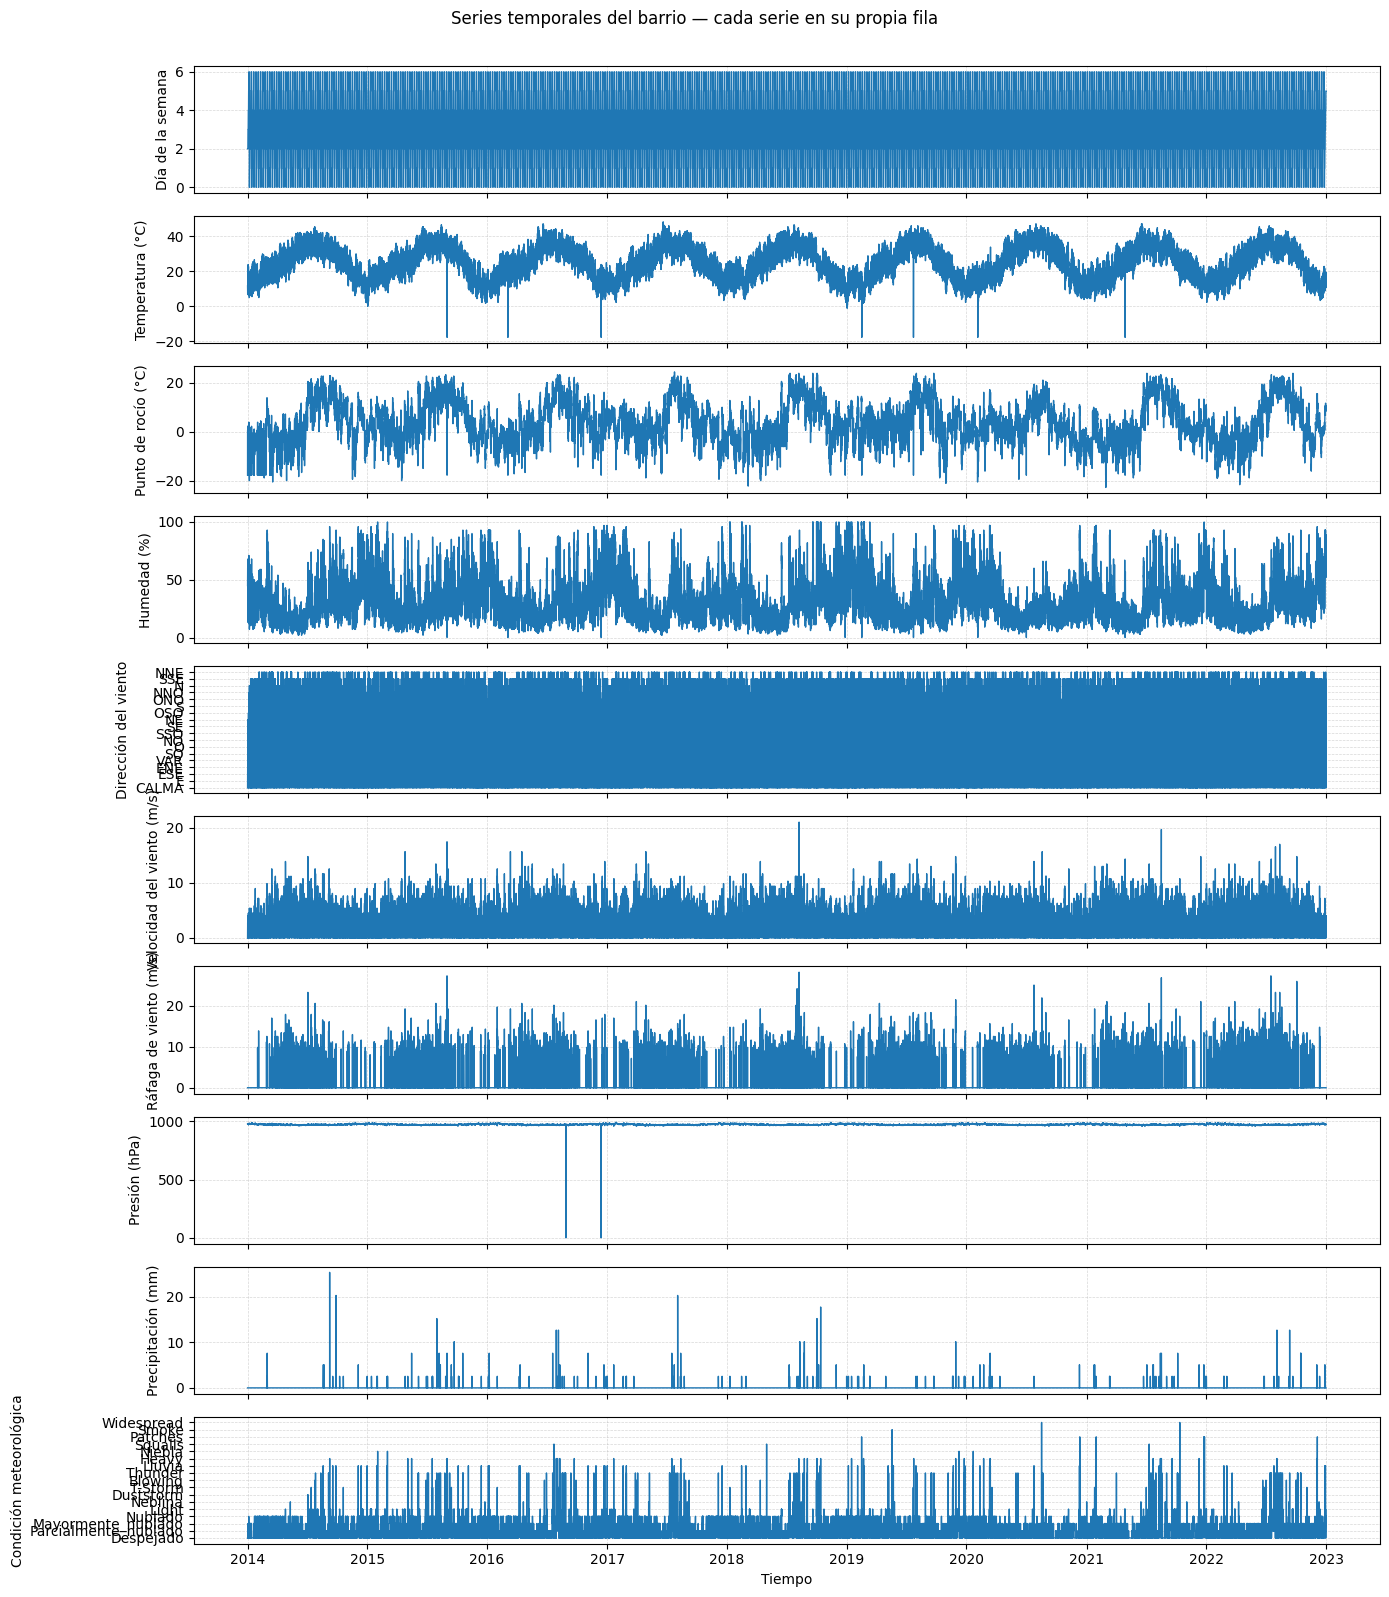

In [996]:
# Guarda el número de variables del dataset
n = len(climaticos.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, climaticos.columns):
    ax.plot(climaticos.index, climaticos[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()



Temperatura (ºC) la temperatura suele estar entre 0 y 40 y pocos, con bajadas de golpe hacia alrededor de -15. Existen outliers. 

Punto de rocío (ºC) va entre alrededor de -20 a 23, en algunos puntos la variable actúa de forma extraña, dando bajones en zona muy altas, por lo que indica que también hay presencia de outliers.

Humedad (%) a simple vista no parece que haya ningún valor por debajo de 0 o mayor a 100, por lo que no consideramos que hayan outliers.

Dirección del viento, al ser una clasificación, no se nota la presencia de outliers. 

Velocidad del viento (m/s) va de 0 a 15 con picos de hasta 22 (alrededor) en algunos puntos, aunque hay picos muy altos, por el contexto de la variable consideramos que no existen outliers. 

Rafaga de viento (m/s) va desde 0 hasta 20, con picos de 23 o alrededor. Se considera que no hay outliers viendo el contexto de la variable.

Presion fija en 1000, con 2 bajones a 0. Por lo tanto existen outliers.

Precipitacion aunque suele estar en 0, tiene picos muy altos hasta de alrededor de 20 o más, pero leyendo el contexto de la variable, no consideramos que existan outliers.

Condicion meteorologica, como sucedia en direccion del viento al ser una variable de clasificación no contiene outliers.

### Temperatura (°C)

Vamos a analizar la variable.

In [997]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Temperatura (°C)'].describe())

count    78888.000000
mean        24.786952
std          9.509110
min        -17.777778
25%         17.222222
50%         25.000000
75%         32.222222
max         48.333333
Name: Temperatura (°C), dtype: float64


Aquí parece ser normal, puesto que hayan temperaturas entre -18ºC y 49ºC podrían ser normales. Por lo tanto, para esta variable, analizaremos los outliers desde su gráfica.

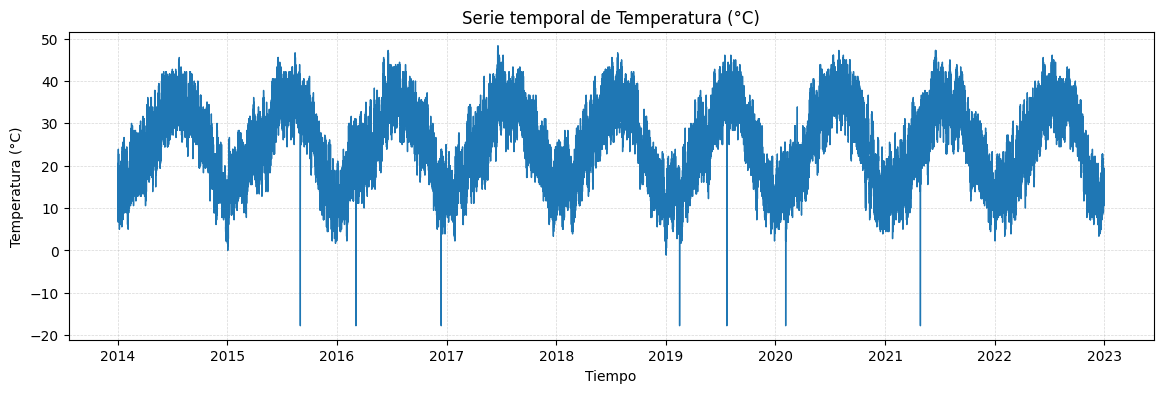

In [998]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se destacan bastante los outliers, puesto que la forma de la gráfica no suele bajar demasiado de 0 o incluso parece que -1ºC, por lo tanto solo detectaremos los valores que tengan menos de -10ºC, puesto que son picos muy notorios hacia abajo, por lo tanto esta temperatura no tiene sentido en la zona donde analiza el dataset del problema.

In [999]:
# Elimina todos los valores por debajo de -10ºC
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].where((climaticos['Temperatura (°C)'] >= -10)
)

Comprobamos cuántos outliers hemos eliminado.

In [1000]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Día de la semana               0
Temperatura (°C)              12
Punto de rocío (°C)            0
Humedad (%)                    0
Dirección del viento           0
Velocidad del viento (m/s)     0
Ráfaga de viento (m/s)         0
Presión (hPa)                  0
Precipitación (mm)             0
Condición meteorológica        0
dtype: int64

Vemos cómo hemos eliminado 15 outliers, vamos a imputar con intepolación temporal

In [1001]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].interpolate(method='time')

Vemos cómo queda el dataset.

In [1002]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
climaticos['Temperatura (°C)'].describe()

count    78888.000000
mean        24.792174
std          9.495785
min         -3.148148
25%         17.222222
50%         25.000000
75%         32.222222
max         48.333333
Name: Temperatura (°C), dtype: float64

Hemos imputados todos los nulos y sus valores parecen haber quedado bien. Vamos a revisar de nuevo la gráfica de su serie temporal.

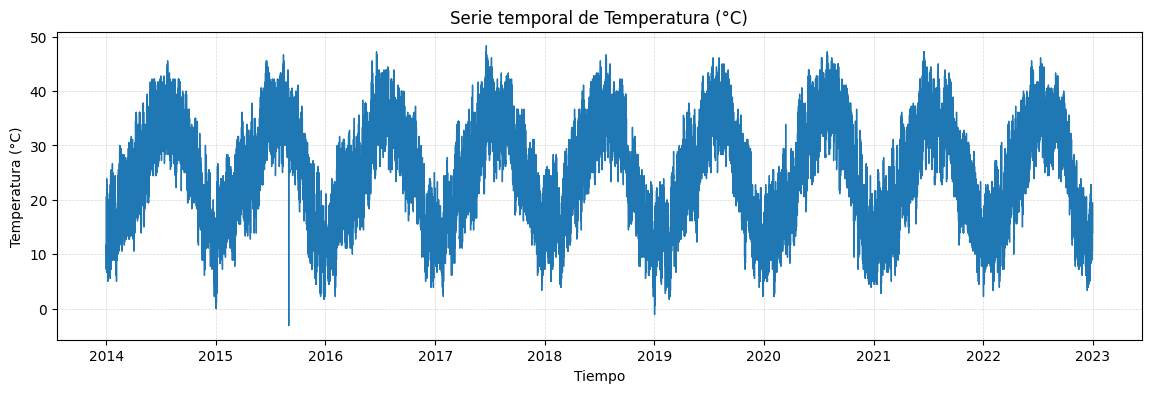

In [1003]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Podemos ver que aún hay un outlier que baja demasiado, por lo tanto vamos a eliminarlo de la misma manera, pero esta vez vamos a poner todo lo que sea menos de -2 grados.

In [1004]:
# Elimina todos los valores por debajo de -2ºC
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].where((climaticos['Temperatura (°C)'] >= -2)
)

Vamos a comprobar que lo hemos eliminado.

In [1005]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Día de la semana              0
Temperatura (°C)              1
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 0
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

Efectivamente, lo hemos eliminado poniendolo a nulo.

In [1006]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].interpolate(method='time')

Realizamos el interpolado temrporal.

In [1007]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
climaticos['Temperatura (°C)'].describe()

count    78888.000000
mean        24.792295
std          9.495489
min         -1.111111
25%         17.222222
50%         25.000000
75%         32.222222
max         48.333333
Name: Temperatura (°C), dtype: float64

Los nulos han sido tratados.

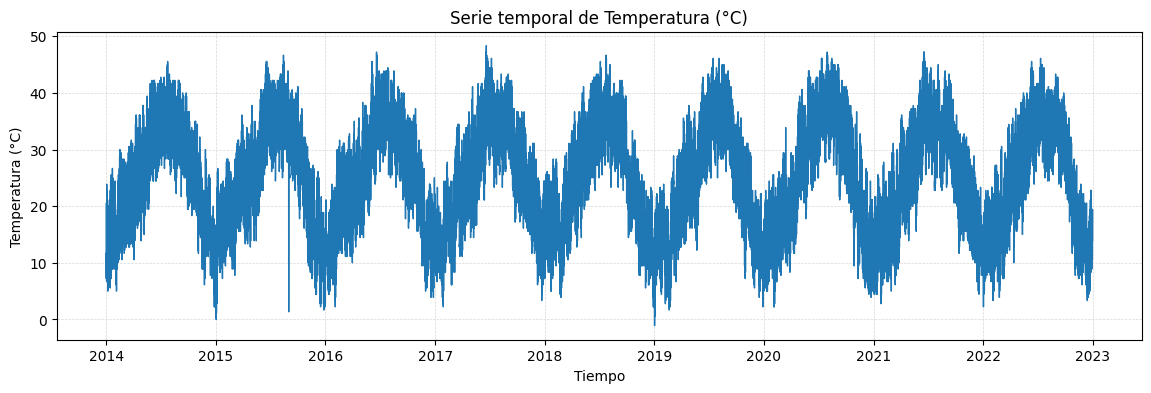

In [1008]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Hemos logrado reducir el outlier pero no eliminarlo del todo.

### Punto de rocío (°C)

Vamos a analizar esta variable.

In [1009]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Punto de rocío (°C)'].describe())

count    78888.000000
mean         3.794775
std          8.244735
min        -22.777778
25%         -2.222222
50%          2.777778
75%          9.722222
max         24.444444
Name: Punto de rocío (°C), dtype: float64


Vemos, al igual que paso con la anterior variable, los valores de esta variable parecen normales, vamos a analizar la gráfica.

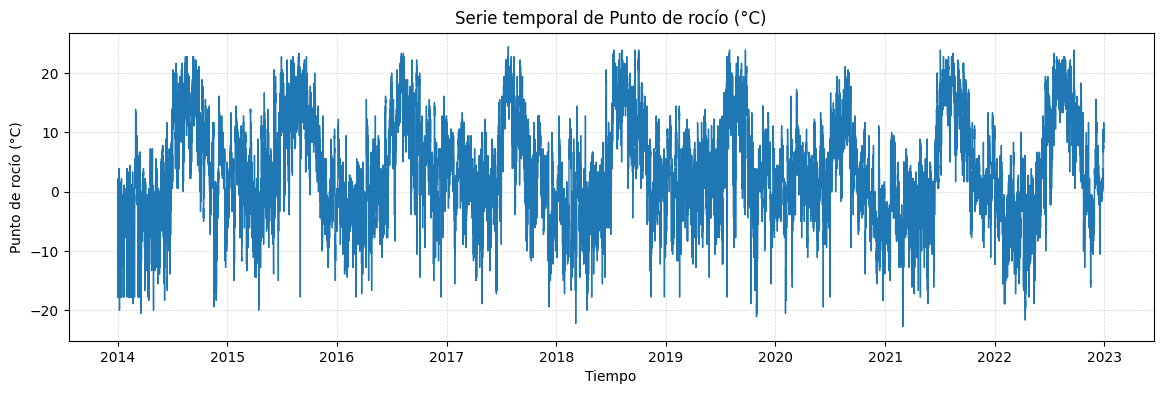

In [1010]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Punto de rocío (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Punto de rocío (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Punto de rocío (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos que aunque haya algun bajon, parece que es el funcionamiento típico de la variable, por lo tanto lo identificamos como que esta variable no contiene outliers.

### Humedad (%)

Vamos a analizar esta variable.

In [1011]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Humedad (%)'].describe())

count    78888.000000
mean        31.299336
std         19.548518
min          0.000000
25%         17.000000
50%         27.000000
75%         41.000000
max        100.000000
Name: Humedad (%), dtype: float64


Vemos que los valores de humedad de forma porcentual son lógicos, por lo que vamos a visualizar la gráfica de su serie temporal.

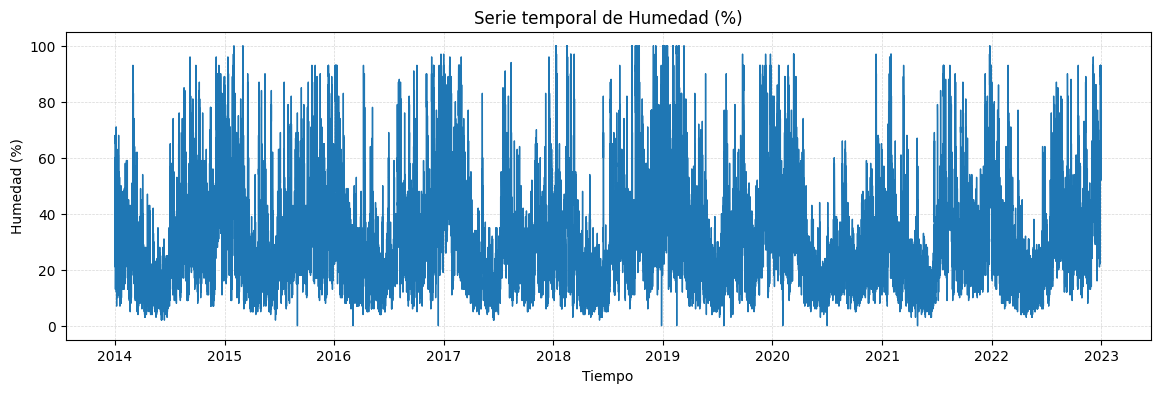

In [1012]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Humedad (%)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Humedad (%)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Humedad (%)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos en su serie tempora, cómo aquí parece que tampoco hay outliers, ya que no se ve un funcionamiento raro en ningún lado.

### Velocidad del viento (m/s)

Vamos a analizar esta variable.

In [1013]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Velocidad del viento (m/s)'].describe())

count    78888.000000
mean         2.891174
std          1.958879
min          0.000000
25%          1.341120
50%          2.682240
75%          3.576320
max         21.010880
Name: Velocidad del viento (m/s), dtype: float64


Se puede ver, que aunque por encima del 75% se dispara, no parece valores exagerados, por lo que vamos a analizar su serie temporal en la gráfica.

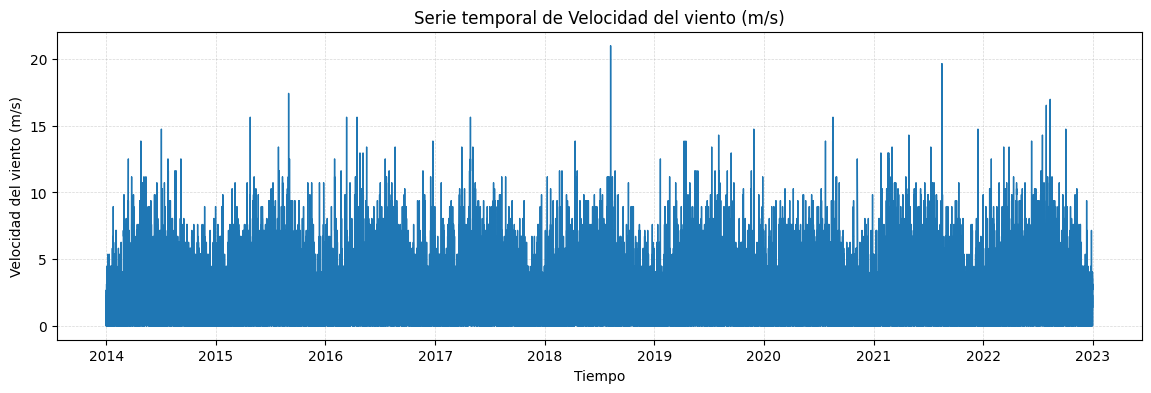

In [1014]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Velocidad del viento (m/s)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Velocidad del viento (m/s)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Velocidad del viento (m/s)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se ve qué aunque hay subidas muy altas de viento, puede ser lógicas debido a borrascas, rachas de viento entre otras cosas (contexto de la variable) por lo que consideramos que no contiene outliers.

### Ráfaga de viento (m/s)

Vamos a analizar esta variable.

In [1015]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Ráfaga de viento (m/s)'].describe())

count    78888.000000
mean         0.651585
std          2.575002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         28.163520
Name: Ráfaga de viento (m/s), dtype: float64


Puesto que la propia variable indica que son ráfagas, se puede ver como gran parte de los valores están situados en 0 y hay un valor máximo dentro de la lógica del contexto de la variable, por lo que no parecen haber outliers, vamos a analizar su serie temporal en una gráfica.

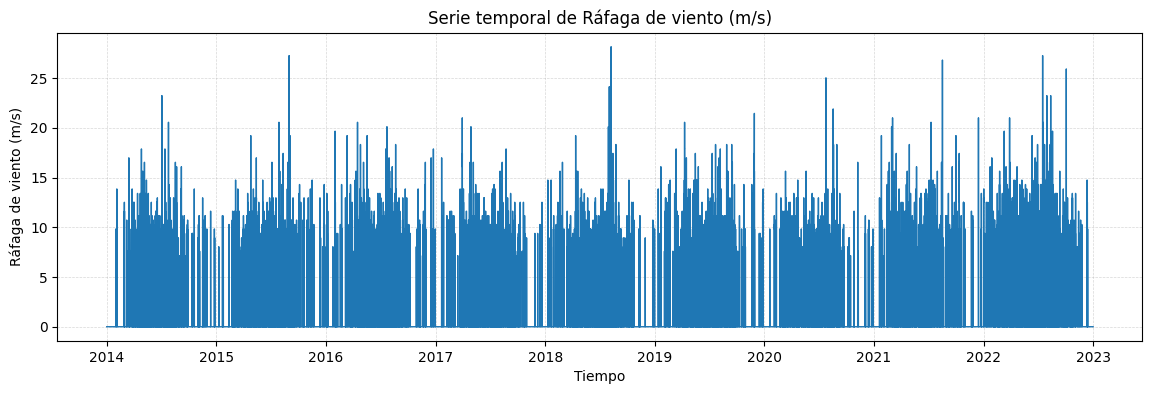

In [1016]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Ráfaga de viento (m/s)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Ráfaga de viento (m/s)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Ráfaga de viento (m/s)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Cómo hemos descrito antes, al ser ráfagas, los valores estaran en 0 y habrán picos hacia arriba, que encima no son exagerados, por lo tanto lo consideramos normales dentro del contexto de la variable y decidimos no eliminar nada, puesto que no vemos outliers.

### Presión (hPa)

Vamos a analizar la variable.

In [1017]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Presión (hPa)'].describe())

count    78888.000000
mean       972.419600
std          7.531527
min          0.000000
25%        969.184818
50%        971.893930
75%        975.280320
max        991.534992
Name: Presión (hPa), dtype: float64


Por lo tanto decidimos eliminar únicamente las variables que bajen de 900 (hPa) de presión

In [1018]:
# Sustituimos los valores encima del 75% por nulos
climaticos['Presión (hPa)'] = climaticos['Presión (hPa)'].where((climaticos['Presión (hPa)'] >= 900)
)

Revisamos cuántos outliers hemos eliminado.

In [1019]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Día de la semana              0
Temperatura (°C)              0
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 3
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

Vemos como hemos eliminado 3 outliers. Ahora imputaremos a través de interpolación temporal.

In [1020]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos['Presión (hPa)'] = climaticos['Presión (hPa)'].interpolate(method='time')

Revisamos de nuevo la variable.

In [1021]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
climaticos['Presión (hPa)'].describe()

count    78888.000000
mean       972.456714
std          4.556647
min        957.332453
25%        969.184818
50%        971.893930
75%        975.280320
max        991.534992
Name: Presión (hPa), dtype: float64

Se puede ver como ya no existen nulos ni valores extraños.

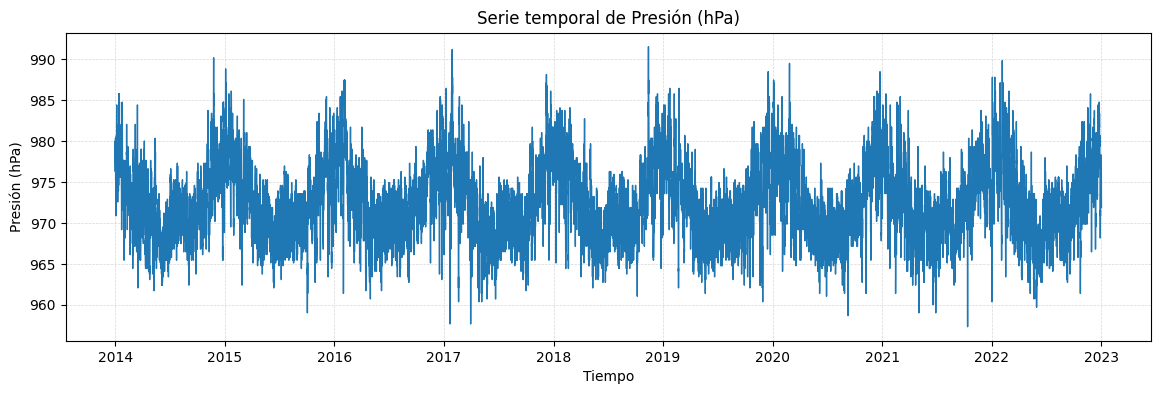

In [1022]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Presión (hPa)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Presión (hPa)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Presión (hPa)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Se puede ver en la gráfica como ya se muestra la serie temporal de la variable sin problemas.

### Precipitación (mm)

Vamos a analizar esta variable.

In [1023]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Precipitación (mm)'].describe())

count    78888.000000
mean         0.017226
std          0.331767
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.400000
Name: Precipitación (mm), dtype: float64


Se puede ver cómo gran parte de los valores están en 0, rasgo característico de zonas muy poco lluviosas, por lo que los valores que están fuera de ellos son valores normales de que hay precipitación por lo tanto no lo consideramos outliers. Ahora vamos a revisar su serie temporal en la gráfica.

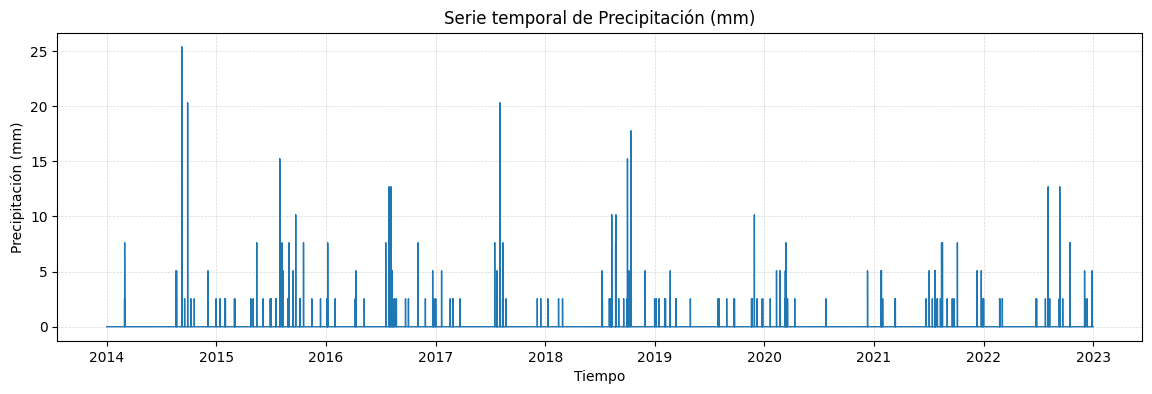

In [1024]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Precipitación (mm)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Precipitación (mm)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Precipitación (mm)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se puede ver cómo efectivamente, su serie temporal demuestra el tiempo donde ha habido lluvia con precipitaciones dentro de valores razonables, por lo tanto no consideramos que esta variable tenga outliers.

## Transformación de variables categóricas a numéricas

Transformemos "Dirección del viento" y "Condición meteorológica" de object a numéricas, ya que nos resultarán mucho más útil para nuestros modelos que estén en numéricas.

In [1025]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas = climaticos.select_dtypes(include = ["object"]).columns
categoricas

Index(['Dirección del viento', 'Condición meteorológica'], dtype='object')

Seleccionamos las variables categoricas.

In [1026]:
#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.
categoricas_Datos = pd.get_dummies(climaticos[categoricas], drop_first = True)
# Mostramos la transformación de las variables categóricas en variables dummies
categoricas_Datos.head()

Dirección del viento_E  Dirección del viento_ENE  \
2014-01-01 00:00:00                   False                     False   
2014-01-01 01:00:00                    True                     False   
2014-01-01 02:00:00                   False                     False   
2014-01-01 03:00:00                   False                     False   
2014-01-01 04:00:00                   False                     False   

                     Dirección del viento_ESE  Dirección del viento_N  \
2014-01-01 00:00:00                     False                   False   
2014-01-01 01:00:00                     False                   False   
2014-01-01 02:00:00                      True                   False   
2014-01-01 03:00:00                      True                   False   
2014-01-01 04:00:00                     False                   False   

                     Dirección del viento_NE  Dirección del viento_NNE  \
2014-01-01 00:00:00                    False                     False   
2014-01-01 01:00:00                    False                     False   
2014-01-01 02:00:00                    False                     False   
2014-01-01 03:00:00                    False                     False   
2014-01-01 04:00:00                    False                     False   

                     Dirección del viento_NNO  Dirección del viento_NO  \
2014-01-01 00:00:00                     False                    False   
2014-01-01 01:00:00                     False                    False   
2014-01-01 02:00:00                     False                    False   
2014-01-01 03:00:00                     False                    False   
2014-01-01 04:00:00                     False                    False   

                     Dirección del viento_O  Dirección del viento_ONO  ...  \
2014-01-01 00:00:00                   False                     False  ...   
2014-01-01 01:00:00                   False                     False  ...   
2014-01-01 02:00:00                   False                     False  ...   
2014-01-01 03:00:00                   False                     False  ...   
2014-01-01 04:00:00                   False                     False  ...   

                     Condición meteorológica_Neblina  \
2014-01-01 00:00:00                            False   
2014-01-01 01:00:00                            False   
2014-01-01 02:00:00                            False   
2014-01-01 03:00:00                            False   
2014-01-01 04:00:00                            False   

                     Condición meteorológica_Niebla  \
2014-01-01 00:00:00                           False   
2014-01-01 01:00:00                           False   
2014-01-01 02:00:00                           False   
2014-01-01 03:00:00                           False   
2014-01-01 04:00:00                           False   

                     Condición meteorológica_Nublado  \
2014-01-01 00:00:00                            False   
2014-01-01 01:00:00                            False   
2014-01-01 02:00:00                            False   
2014-01-01 03:00:00                            False   
2014-01-01 04:00:00                            False   

                     Condición meteorológica_Parcialmente_nublado  \
2014-01-01 00:00:00                                         False   
2014-01-01 01:00:00                                         False   
2014-01-01 02:00:00                                         False   
2014-01-01 03:00:00                                         False   
2014-01-01 04:00:00                                         False   

                     Condición meteorológica_Patches  \
2014-01-01 00:00:00                            False   
2014-01-01 01:00:00                            False   
2014-01-01 02:00:00                            False   
2014-01-01 03:00:00                            False   
2014-01-01 04:00:00                            False   

                     Condic

Creamos las dummies de las variables categóricas, eliminando la primera columna.

In [1027]:
# Eliminamos los atributos originales
climaticos.drop(categoricas, axis = 1, inplace = True)
# Concatenamos los nuevos atributos creados para las variables categóricas
climaticos = pd.concat([climaticos, categoricas_Datos], axis = 1)
# Mostramos como quedan los datos de nuevo
climaticos.head()

Día de la semana  Temperatura (°C)  Punto de rocío (°C)  \
2014-01-01 00:00:00                 2         11.666667           -17.777778   
2014-01-01 01:00:00                 2         10.555556             0.555556   
2014-01-01 02:00:00                 2         10.000000           -17.777778   
2014-01-01 03:00:00                 2          9.444444           -17.777778   
2014-01-01 04:00:00                 2          9.444444           -17.777778   

                     Humedad (%)  Velocidad del viento (m/s)  \
2014-01-01 00:00:00         45.0                     0.00000   
2014-01-01 01:00:00         50.0                     2.23520   
2014-01-01 02:00:00         50.0                     1.34112   
2014-01-01 03:00:00         52.0                     2.68224   
2014-01-01 04:00:00         52.0                     0.00000   

                     Ráfaga de viento (m/s)  Presión (hPa)  \
2014-01-01 00:00:00                     0.0     977.312154   
2014-01-01 01:00:00                     0.0     977.312154   
2014-01-01 02:00:00                     0.0     977.312154   
2014-01-01 03:00:00                     0.0     977.312154   
2014-01-01 04:00:00                     0.0     977.650793   

                     Precipitación (mm)  Dirección del viento_E  \
2014-01-01 00:00:00                 0.0                   False   
2014-01-01 01:00:00                 0.0                    True   
2014-01-01 02:00:00                 0.0                   False   
2014-01-01 03:00:00                 0.0                   False   
2014-01-01 04:00:00                 0.0                   False   

                     Dirección del viento_ENE  ...  \
2014-01-01 00:00:00                     False  ...   
2014-01-01 01:00:00                     False  ...   
2014-01-01 02:00:00                     False  ...   
2014-01-01 03:00:00                     False  ...   
2014-01-01 04:00:00                     False  ...   

                     Condición meteorológica_Neblina  \
2014-01-01 00:00:00                            False   
2014-01-01 01:00:00                            False   
2014-01-01 02:00:00                            False   
2014-01-01 03:00:00                            False   
2014-01-01 04:00:00                            False   

                     Condición meteorológica_Niebla  \
2014-01-01 00:00:00                           False   
2014-01-01 01:00:00                           False   
2014-01-01 02:00:00                           False   
2014-01-01 03:00:00                           False   
2014-01-01 04:00:00                           False   

                     Condición meteorológica_Nublado  \
2014-01-01 00:00:00                            False   
2014-01-01 01:00:00                            False   
2014-01-01 02:00:00                            False   
2014-01-01 03:00:00                            False   
2014-01-01 04:00:00                            False   

                     Condición meteorológica_Parcialmente_nublado  \
2014-01-01 00:00:00                                         False   
2014-01-01 01:00:00                                         False   
2014-01-01 02:00:00                                         False   
2014-01-01 03:00:00                                         False   
2014-01-01 04:00:00                                         False   

                     Condición meteorológica_Patches  \
2014-01-01 00:00:00                            False   
2014-01-01 01:00:00                            False   
2014-01-01 02:00:00                            False   
2014-01-01 03:00:00                            False   
2014-01-01 04:00:00                            False   

                     Condición meteorológica_Smoke  \
2014-01-01 00:00:00                          False   
2014-01-01 01:00:00                          False   
2014-01-01 02:00:00                          False   
2014-01-01 03:00:00                          False   
2014-01-01 04:00:00        

Revisamos que, efectivamente, tenemos todas las columnas juntas.

## Unir datasets

Puesto que la variable objetivo es Energia_total que pertenece al otro dataset los uniremos ya que no resultará útil para medir las correlaciones entre variables.

In [1028]:
# Unimos dos datasets con el mismo DatetimeIndex, eliminando una columna compartida
energia_climaticos = energia_horas.join(climaticos.drop(columns='Día de la semana'), how='outer')

In [1029]:
# Información del dataset
energia_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Día de la semana                              78888 non-null  int64  
 1   Electricidad (kW)                             78888 non-null  float64
 2   Fotovoltaica (kW)                             78888 non-null  float64
 3   Refrigeración (kW)                            78888 non-null  float64
 4   Calefacción (kWh)                             78888 non-null  float64
 5   Energía total (kWh)                           78888 non-null  float64
 6   Emisión (kg CO₂)                              78888 non-null  float64
 7   Temperatura (°C)                              78888 non-null  float64
 8   Punto de rocío (°C)                           78888 non-null  float64
 9   Humedad (%)               

Podemos ver que al juntar las 7 columnas del dataset de energía y las 40 variables de climáticos (41, pero eliminamos la columna repetida) tenemos un nuevo dataset, el cual, es muy grande, así que vamos a mirar sus correlaciones para ir eliminando variables (excepto "Día de la semana").

## Tabla de correlación

Ahora vamos a estudiar las correlaciones del dataset.

En primer lugar vamos a revisar la varianza.

In [1030]:
# Calcular varianza de todas las columnas numéricas
varianza = energia_climaticos.var()
varianza


Día de la semana                                3.997008e+00
Electricidad (kW)                               2.944753e+07
Fotovoltaica (kW)                               2.797322e+07
Refrigeración (kW)                              2.672180e+08
Calefacción (kWh)                               1.076497e+06
Energía total (kWh)                             4.179190e+08
Emisión (kg CO₂)                                1.624377e+08
Temperatura (°C)                                9.016432e+01
Punto de rocío (°C)                             6.797566e+01
Humedad (%)                                     3.821446e+02
Velocidad del viento (m/s)                      3.837208e+00
Ráfaga de viento (m/s)                          6.630637e+00
Presión (hPa)                                   2.076304e+01
Precipitación (mm)                              1.100692e-01
Dirección del viento_E                          1.421704e-01
Dirección del viento_ENE                        3.353864e-02
Dirección del viento_ESE

Podemos ver que hay demasiadas columnas y no se puede visualizar bien la varianza en este dataset, por lo tanto, lo tratamos haciendo un filtro de todos las variables que tengan una varianza menor que 1 (próximas a 0).

In [1031]:
# Seleccionamos las variables con varianza menor a 1
varianza_baja = varianza[varianza < 1]
# Ordenamos las variables de menor a mayor
varianza_baja = varianza_baja.sort_values()
# Imprimimos
varianza_baja


Condición meteorológica_Smoke                   0.000025
Condición meteorológica_Squalls                 0.000038
Condición meteorológica_Duststorm               0.000038
Condición meteorológica_Widespread              0.000063
Condición meteorológica_Niebla                  0.000165
Condición meteorológica_Patches                 0.000241
Condición meteorológica_Neblina                 0.000342
Condición meteorológica_Heavy                   0.000507
Condición meteorológica_T-Storm                 0.000570
Condición meteorológica_Lluvia                  0.001127
Condición meteorológica_Thunder                 0.001835
Dirección del viento_NNE                        0.009255
Condición meteorológica_Light                   0.009976
Dirección del viento_NE                         0.013207
Dirección del viento_N                          0.017261
Dirección del viento_NNO                        0.018153
Dirección del viento_SSO                        0.021473
Dirección del viento_SSE       

Podemos ver las variables que nos salen:

Condición meteorológica_Smoke                   0.000025

Condición meteorológica_Squalls                 0.000038

Condición meteorológica_Duststorm               0.000038

Condición meteorológica_Widespread              0.000063

Condición meteorológica_Niebla                  0.000165

Condición meteorológica_Patches                 0.000241

Condición meteorológica_Neblina                 0.000342

Condición meteorológica_Heavy                   0.000507

Condición meteorológica_T-Storm                 0.000570

Condición meteorológica_Lluvia                  0.001127

Condición meteorológica_Thunder                 0.001835

Dirección del viento_NNE                        0.009255

Condición meteorológica_Light                   0.009976

Dirección del viento_NE                         0.013207

Dirección del viento_N                          0.017261

Dirección del viento_NNO                        0.018153

Dirección del viento_SSO                        0.021473

Dirección del viento_SSE                        0.028138

Dirección del viento_NO                         0.028437

Dirección del viento_S                          0.028962

Dirección del viento_ENE                        0.033539

Dirección del viento_SE                         0.045621

Dirección del viento_ONO                        0.046251

Dirección del viento_SO                         0.047736

Dirección del viento_VAR                        0.061253

Dirección del viento_OSO                        0.065796

Condición meteorológica_Nublado                 0.068604

Dirección del viento_ESE                        0.083116

Dirección del viento_O                          0.098063

Precipitación (mm)                              0.110069

Dirección del viento_E                          0.142170

Condición meteorológica_Parcialmente_nublado    0.143531

Condición meteorológica_Mayormente_nublado      0.184579

Condición meteorológica_Despejado               0.249947

dtype: float64

La variable con varianza más alta de este filtro es "Condición meteorológica_Despejado" que sigue siendo una variable muy próxima a 0, por lo tanto, eliminaremos todas las variables del listado del filtro. Además, "Dirección del viento" y "Condición meteorológica" no veo que nos puedan aportar mucho a nuestro objetivo de "energía total" ya que la dirección del viento no consumirá más energía, y condición meteorológica sólo podría influir poco, como podría ser que se enciendan algunas luces en días nublados o ninguna luz en día despejado, por lo tanto también lo eliminamos. Fijarnos también que "Día de la semana" tampoco esté en la lista, ya que no queremos eliminarla.

In [1032]:
energia_climaticos = energia_climaticos.drop(columns=varianza_baja.index)
energia_climaticos

Día de la semana  Electricidad (kW)  Fotovoltaica (kW)  \
2014-01-01 00:00:00                 2           21294.33               2.39   
2014-01-01 01:00:00                 2           21190.46               1.95   
2014-01-01 02:00:00                 2           21537.07               4.29   
2014-01-01 03:00:00                 2           21688.66               9.65   
2014-01-01 04:00:00                 2           23044.40              10.19   
...                               ...                ...                ...   
2022-12-31 19:00:00                 5           15684.46               1.65   
2022-12-31 20:00:00                 5           15471.84               1.66   
2022-12-31 21:00:00                 5           15121.29               1.75   
2022-12-31 22:00:00                 5           14721.74               1.84   
2022-12-31 23:00:00                 5           14721.74               1.99   

                     Refrigeración (kW)  Calefacción (kWh)  \
2014-01-01 00:00:00          8098.10352          876.28229   
2014-01-01 01:00:00          7312.22987          873.35158   
2014-01-01 02:00:00          7305.86410          911.45081   
2014-01-01 03:00:00          7573.82433          870.42087   
2014-01-01 04:00:00          7462.96849          946.61933   
...                                 ...                ...   
2022-12-31 19:00:00         15884.38982         2464.72711   
2022-12-31 20:00:00         15171.98630         2496.96492   
2022-12-31 21:00:00         14711.04828         2526.27202   
2022-12-31 22:00:00         14050.59085         2385.59794   
2022-12-31 23:00:00         12404.00179         2341.63729   

                     Energía total (kWh)  Emisión (kg CO₂)  Temperatura (°C)  \
2014-01-01 00:00:00          30268.71581           18880.0         11.666667   
2014-01-01 01:00:00          29376.04145           18320.0         10.555556   
2014-01-01 02:00:00          29754.38491           18560.0         10.000000   
2014-01-01 03:00:00          30132.90520           18790.0          9.444444   
2014-01-01 04:00:00          31453.98782           19620.0          9.444444   
...                                  ...               ...               ...   
2022-12-31 19:00:00          34033.57693           21220.0         16.666667   
2022-12-31 20:00:00          33140.79122           20670.0         15.000000   
2022-12-31 21:00:00          32358.61030           20180.0         15.000000   
2022-12-31 22:00:00          31157.92879           19430.0         14.444444   
2022-12-31 23:00:00          29467.37908           18150.0         13.888889   

                     Punto de rocío (°C)  Humedad (%)  \
2014-01-01 00:00:00           -17.777778         45.0   
2014-01-01 01:00:00             0.555556         50.0   
2014-01-01 02:00:00           -17.777778         50.0   
2014-01-01 03:00:00           -17.777778         52.0   
2014-01-01 04:00:00           -17.777778         52.0   
...                                  ...          ...   
2022-12-31 19:00:00            10.000000         65.0   
2022-12-31 20:00:00            10.000000         72.0   
2022-12-31 21:00:00            10.000000         72.0   
2022-12-31 22:00:00             9.444444         72.0   
2022-12-31 23:00:00            10.000000         77.0   

                     Velocidad del viento (m/s)  Ráfaga de viento (m/s)  \
2014-01-01 00:00:00                     0.00000                     0.0   
2014-01-01 01:00:00                     2.23520                     0.0   
2014-01-01 02:00:00                     1.34112                     0.0   
2014-01-01 03:00:00                     2.68224                     0.0   
2014-01-01 04:00:00                     0.00000                     0.0   
...                                         ...                     ...   
2022-12-31 19:00:00                     3.12928                     0.0   
2022-12-31 20:00:00                     2.23520                     0.0   
2022-1

Podemos ver como nos hemos quedado con 13 variables de 47 que teníamos, por lo tanto, nos hemos desecho de 34 variables, de las cuales destacamos todas las variable dummies de "Dirección del viento" y "Condición meteorológica". También nos hemos desecho de otra variable que no aporta mucho al dataset según su varianza: Precipitación (mm).

Ahora revisamos qué variables tienen más correlación con la variable objetivo "Energía total (kWh)"

In [1033]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = energia_climaticos.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Energía total (kWh)"].sort_values(ascending=False)

Energía total (kWh)           1.000000
Emisión (kg CO₂)              0.998726
Refrigeración (kW)            0.985782
Electricidad (kW)             0.899239
Temperatura (°C)              0.843100
Punto de rocío (°C)           0.564845
Fotovoltaica (kW)             0.347113
Velocidad del viento (m/s)    0.177674
Ráfaga de viento (m/s)        0.128177
Día de la semana             -0.079884
Humedad (%)                  -0.257373
Presión (hPa)                -0.462749
Calefacción (kWh)            -0.531141
Name: Energía total (kWh), dtype: float64

Como se puede ver, aparte de "Día de la semana", todas las variables aportan al dataset, y como hemos dicho varias veces, no eliminamos "Día de la semana" porque es una variable exógena que nos aportará a los modelos cuando traten al dataset.

Por último, vamos a revisar la matriz de correlación.

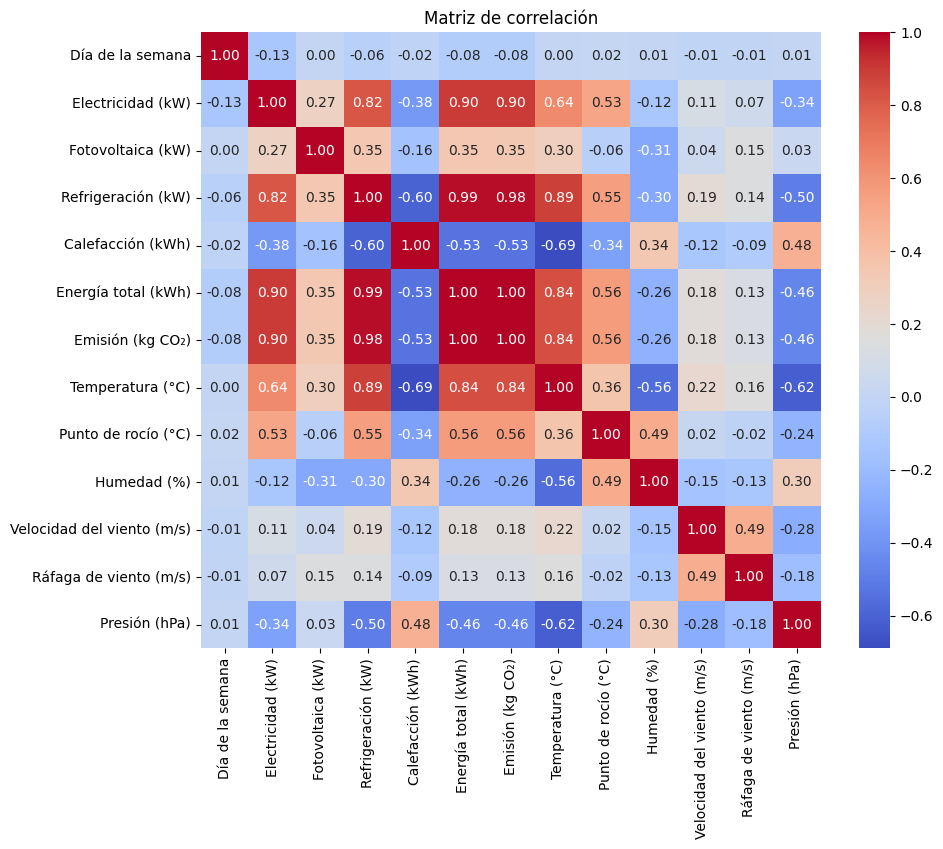

In [1034]:
# Crear la tabla de correlación
correlation_matrix = energia_climaticos.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

A diferencia de la última vez, como tenemos 13 variables y "Emisión (kg CO₂)" no la eliminábamos porque teníamos muy pocas variables, aquí decidimos eliminarla y así no tratamos con el riesgo de multicolinealidad.

In [1035]:
energia_climaticos = energia_climaticos.drop('Emisión (kg CO₂)', axis=1)
energia_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Día de la semana            78888 non-null  int64  
 1   Electricidad (kW)           78888 non-null  float64
 2   Fotovoltaica (kW)           78888 non-null  float64
 3   Refrigeración (kW)          78888 non-null  float64
 4   Calefacción (kWh)           78888 non-null  float64
 5   Energía total (kWh)         78888 non-null  float64
 6   Temperatura (°C)            78888 non-null  float64
 7   Punto de rocío (°C)         78888 non-null  float64
 8   Humedad (%)                 78888 non-null  float64
 9   Velocidad del viento (m/s)  78888 non-null  float64
 10  Ráfaga de viento (m/s)      78888 non-null  float64
 11  Presión (hPa)               78888 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.8 MB


## Transformacion a días

Ante la gran cantidad de datos y que nuestro dataset no tiene mucho sentido que tenga los datos en formato horario, decidimos cambiarlo a que sean diarios. Para ello, hacemos un resample diario que sume todos los datos de cada dia, pero teniendo en cuenta que "Día de la semana" no queremos que cambie, y como cada fila es la suma de si mismo 24 veces, decidimos hacer una división de 24 y transformarlo en entero.

In [1036]:
# Guardamos una copia
energia_climaticos_horas = energia_climaticos

# Aquí pondremos todas las variables que les haremos un resample a través de la suma para transformarlas a diarias
columnas_suma = ['Día de la semana','Electricidad (kW)', 'Fotovoltaica (kW)', 'Refrigeración (kW)', 'Calefacción (kWh)', 'Energía total (kWh)']

# Aquí pondremos todas las variables que les haremos un resample a través de la media para transformarlas a diarias
columnas_media = ['Temperatura (°C)', 'Punto de rocío (°C)', 'Humedad (%)', 'Velocidad del viento (m/s)', 'Presión (hPa)']

# Aquí pondremos todas las variables que les haremos un resample a través del máximo para transformarlas a diarias
columnas_maximo = ['Ráfaga de viento (m/s)']

# Cambia frecuencia temporal a diaria a través de la suma
energia_climaticos_suma = energia_climaticos[columnas_suma].resample('D').sum()

# Cambia frecuencia temporal a diaria a través de la suma
energia_climaticos_media = energia_climaticos[columnas_media].resample('D').mean()

# Cambia frecuencia temporal a diaria a través de la suma
energia_climaticos_maximo = energia_climaticos[columnas_maximo].resample('D').max()

# Unimos los 3 dataframes con frecuencia diaria, unidos a través del índice temporal
energia_climaticos = energia_climaticos_suma.join(energia_climaticos_media).join(energia_climaticos_maximo)

# Divide entre 24 los datos de la variable
energia_climaticos['Día de la semana'] = energia_climaticos['Día de la semana']/24

# Transforma a entero la variable
energia_climaticos['Día de la semana'] = energia_climaticos['Día de la semana'].astype(int)

Revisamos como han quedado las 10 primeras filas.

In [1037]:
# Visualizamos las 5 primeras columnas del dataset
energia_climaticos.head(10)

Día de la semana  Electricidad (kW)  Fotovoltaica (kW)  \
2014-01-01                 2          490049.28           62795.47   
2014-01-02                 3          556486.56           64284.00   
2014-01-03                 4          545831.45           67187.06   
2014-01-04                 5          511495.56           46798.28   
2014-01-05                 6          502806.80           70162.87   
2014-01-06                 0          543968.35           71666.60   
2014-01-07                 1          562002.91           52517.04   
2014-01-08                 2          557214.72           66145.06   
2014-01-09                 3          563161.10           50888.52   
2014-01-10                 4          520356.53           62773.62   

            Refrigeración (kW)  Calefacción (kWh)  Energía total (kWh)  \
2014-01-01        243369.71770        20107.60131         753526.59901   
2014-01-02        323886.05169        23987.86135         904360.47304   
2014-01-03        337004.60237        22112.20695         904948.25932   
2014-01-04        252493.06189        21074.73561         785063.35750   
2014-01-05        249265.37031        22777.47812         774849.64843   
2014-01-06        285299.00483        27314.21720         856581.57203   
2014-01-07        274781.34599        23633.24544         860417.50143   
2014-01-08        265609.15067        24020.09916         846843.96983   
2014-01-09        243592.34380        23108.64835         829862.09215   
2014-01-10        235918.63667        22238.22748         778513.39415   

            Temperatura (°C)  Punto de rocío (°C)  Humedad (%)  \
2014-01-01         13.402778            -6.990741    41.625000   
2014-01-02         15.023148            -2.013889    38.750000   
2014-01-03         15.763889            -3.356481    33.875000   
2014-01-04         13.495370             1.944444    47.375000   
2014-01-05         11.990741            -4.328704    37.750000   
2014-01-06         12.268519           -11.134259    23.541667   
2014-01-07         13.402778            -7.500000    25.875000   
2014-01-08         13.263889            -4.236111    32.500000   
2014-01-09         12.430556            -3.495370    35.125000   
2014-01-10         12.106481            -2.337963    39.125000   

            Velocidad del viento (m/s)  Presión (hPa)  Ráfaga de viento (m/s)  
2014-01-01                    1.434253     977.918882                     0.0  
2014-01-02                    1.490133     977.580243                     0.0  
2014-01-03                    1.080347     973.558905                     0.0  
2014-01-04                    1.862667     973.008617                     0.0  
2014-01-05                    1.043093     978.328071                     0.0  
2014-01-06                    1.713653     981.502812                     0.0  
2014-01-07                    1.378373     977.552023                     0.0  
2014-01-08                    1.564640     976.056368                     0.0  
2014-01-09                    1.769533     975.118055                     0.0  
2014-01-10                    1.825413     976.874745                     0.0

Revisamos como ha quedado nuestro dataset en general.

In [1038]:
# Información del dataset
energia_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2014-01-01 to 2022-12-31
Freq: D
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Día de la semana            3287 non-null   int64  
 1   Electricidad (kW)           3287 non-null   float64
 2   Fotovoltaica (kW)           3287 non-null   float64
 3   Refrigeración (kW)          3287 non-null   float64
 4   Calefacción (kWh)           3287 non-null   float64
 5   Energía total (kWh)         3287 non-null   float64
 6   Temperatura (°C)            3287 non-null   float64
 7   Punto de rocío (°C)         3287 non-null   float64
 8   Humedad (%)                 3287 non-null   float64
 9   Velocidad del viento (m/s)  3287 non-null   float64
 10  Presión (hPa)               3287 non-null   float64
 11  Ráfaga de viento (m/s)      3287 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 333.8 KB


Vemos como nuestro dataset ha pasado de 78888 a 3287 entradas (78888/24) y todo lo demás queda igual.

## Análisis de las variables

Hay que tener en cuenta que aunque varias partes de los análisis de las variables tengamos que ir cambiando granularidad (para que se vea más suavizadas las lineas temporales de las variables y podamos interpretarlas com mayor sencillez), siempre tendremos frecuencia diaria en nuestro dataset, y esto no cambiará.

Vamos a analizar sobre nuestra variable objetivo, sobre su tendencia, estacionalidad, ruido, estacionariedad y autocorrelación.

### Temperatura (°C)

Realizamos el histograma para ver como están distribuidos los datos.

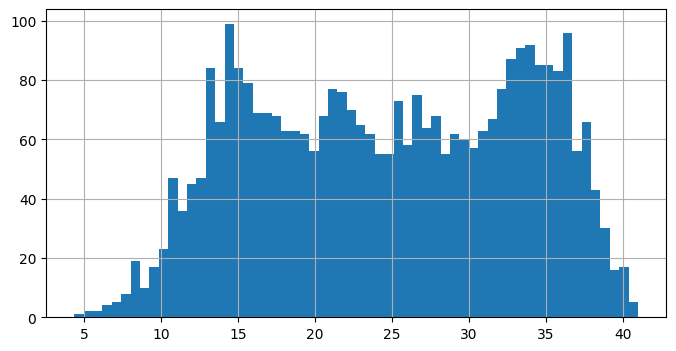

In [1039]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Temperatura (°C)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 13 y 37, haciendo que la mayor parte de Temperatura (°C) esté entre la parte superior derecha y mediana inferior del histograma, haciendo que haya una cola hacia la izquierda y por lo tanto, un sesgo negativo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

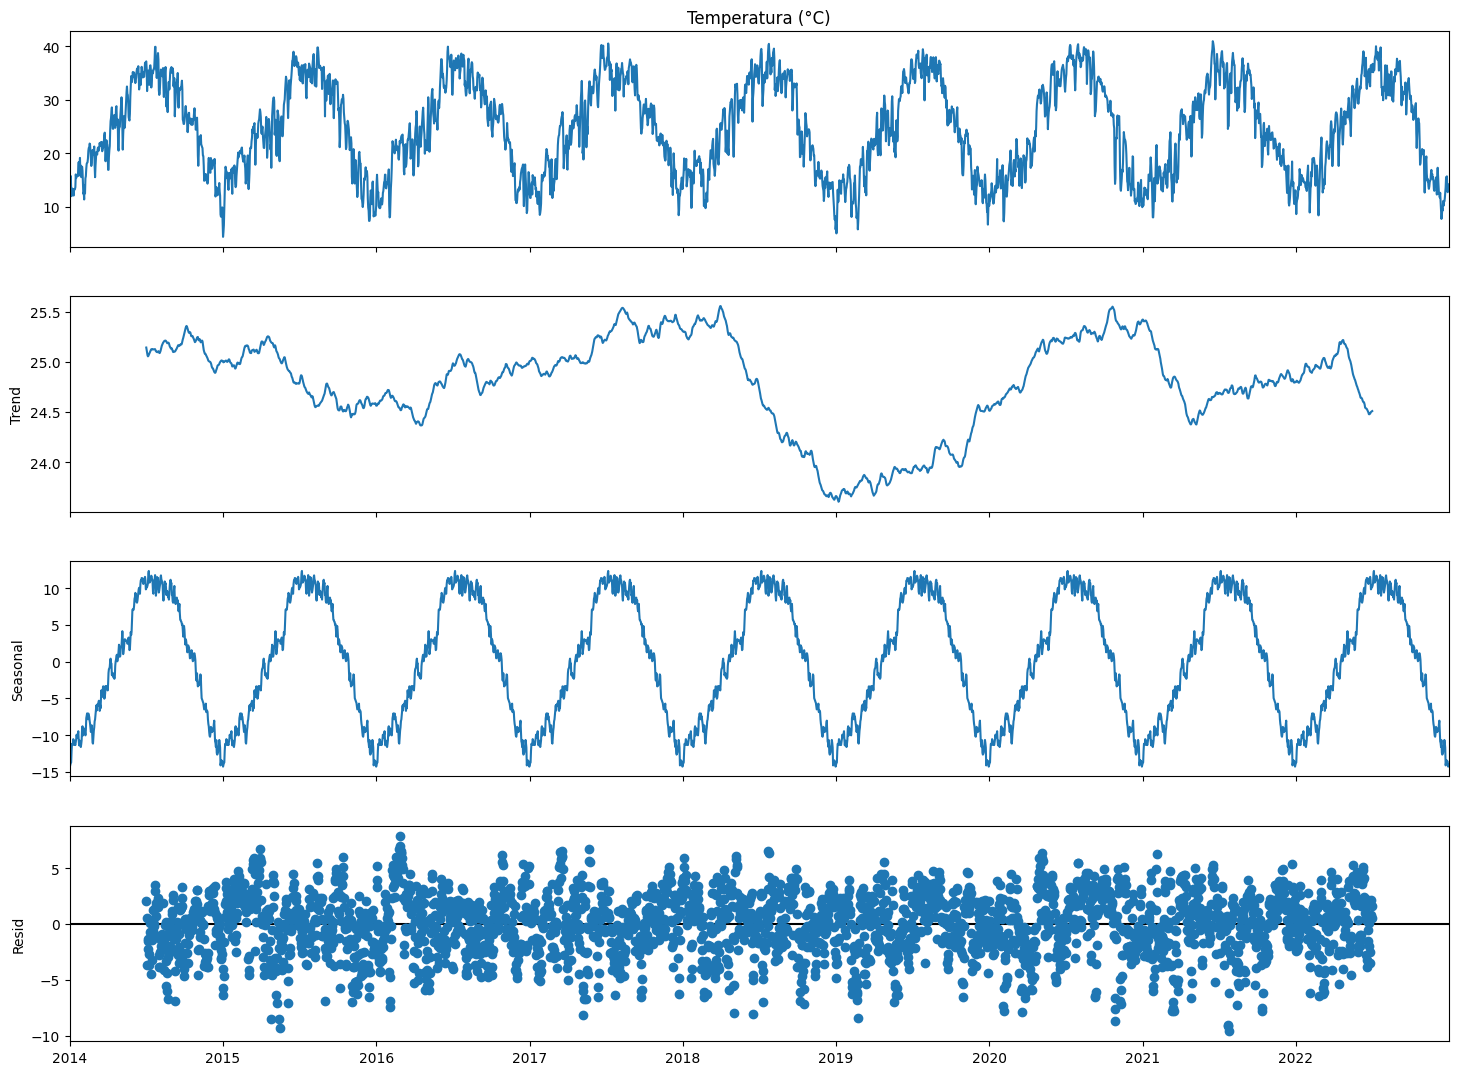

In [1040]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Temperatura (°C)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

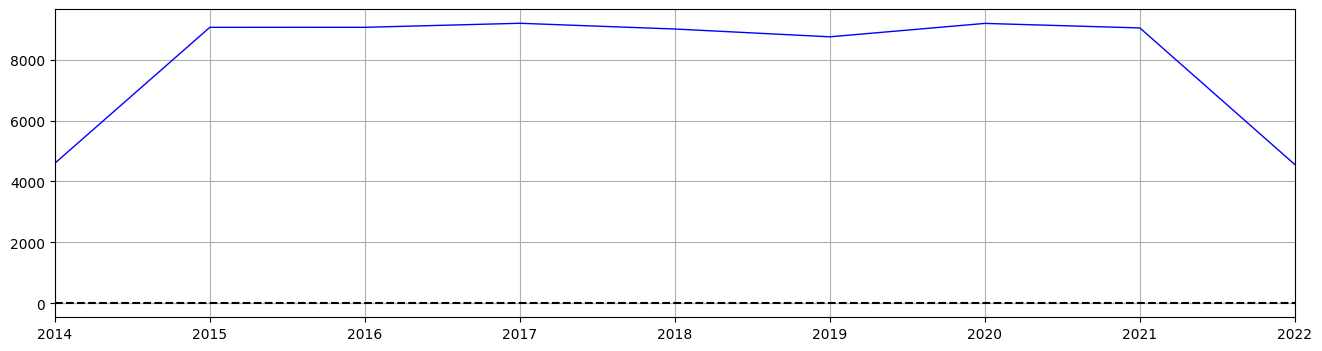

In [1041]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver como hay una ascendencia desde 2014 hasta 2015, se mantiene hasta 2016, hay un ligero aumento hasta 2017, luego un descenso hasta 2019, asciende de nuevo hasta 2020, y a partir de este año, baja la temperatura.

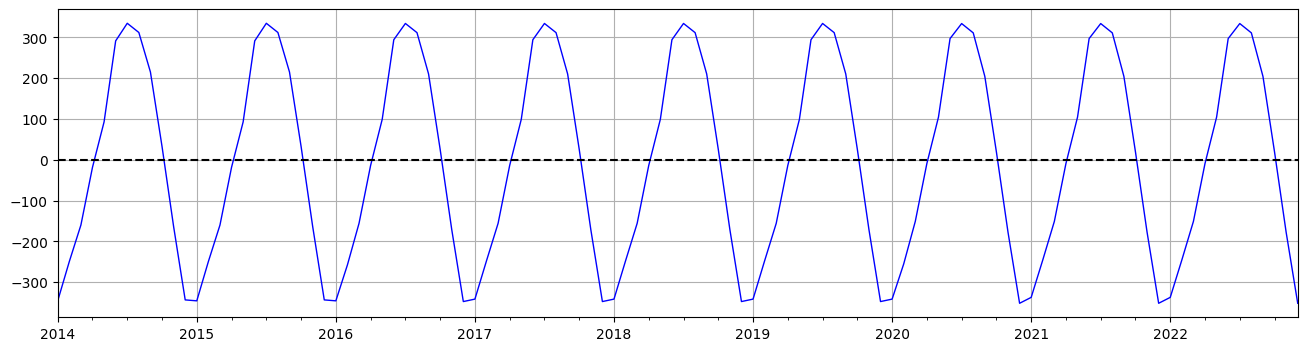

In [1042]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

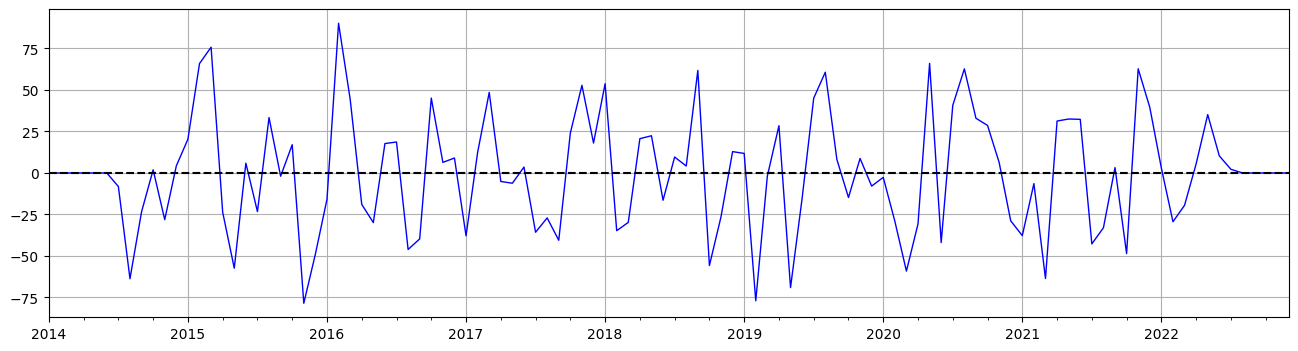

In [1043]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [1044]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Temperatura (°C)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.390945
p-value: 0.011271
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.011271 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

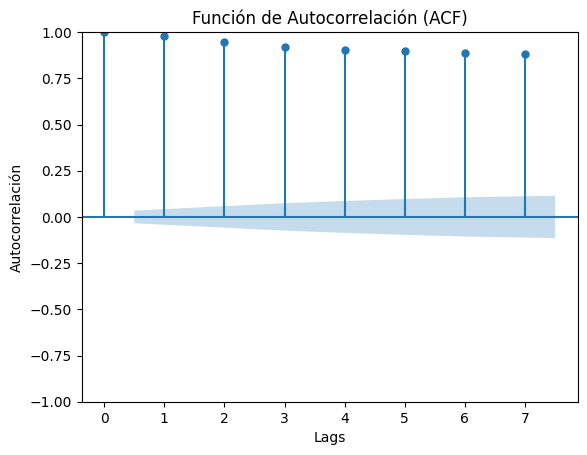

In [1045]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Temperatura (°C)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 75% haciendo que haya dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

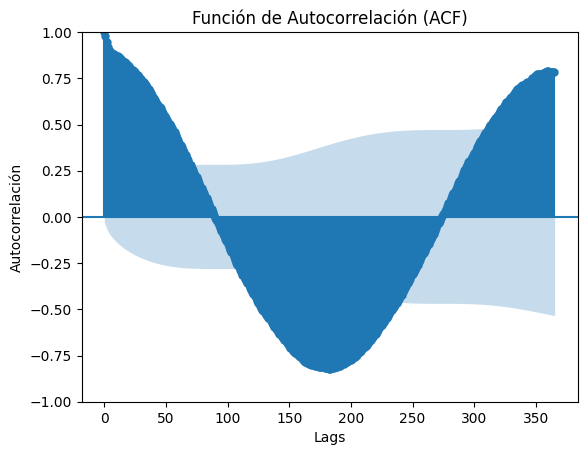

In [1046]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Temperatura (°C)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

### Punto de rocío (°C)

Realizamos el histograma para ver como están distribuidos los datos.

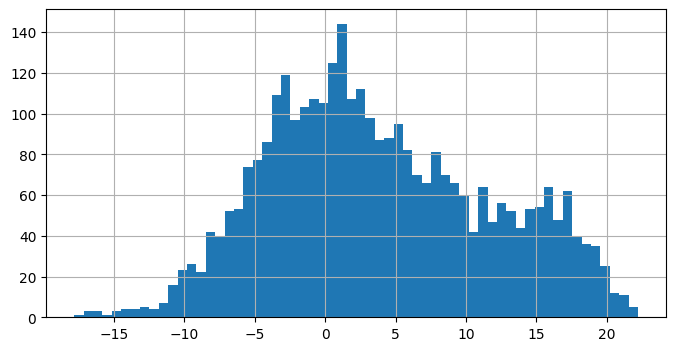

In [1047]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Punto de rocío (°C)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores -8 y 18, haciendo que la mayor parte de Punto de rocío (°C) esté entre la parte mediana baja y superior del histograma, haciendo que haya una cola hacia la izquierda y por lo tanto, un sesgo negativo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

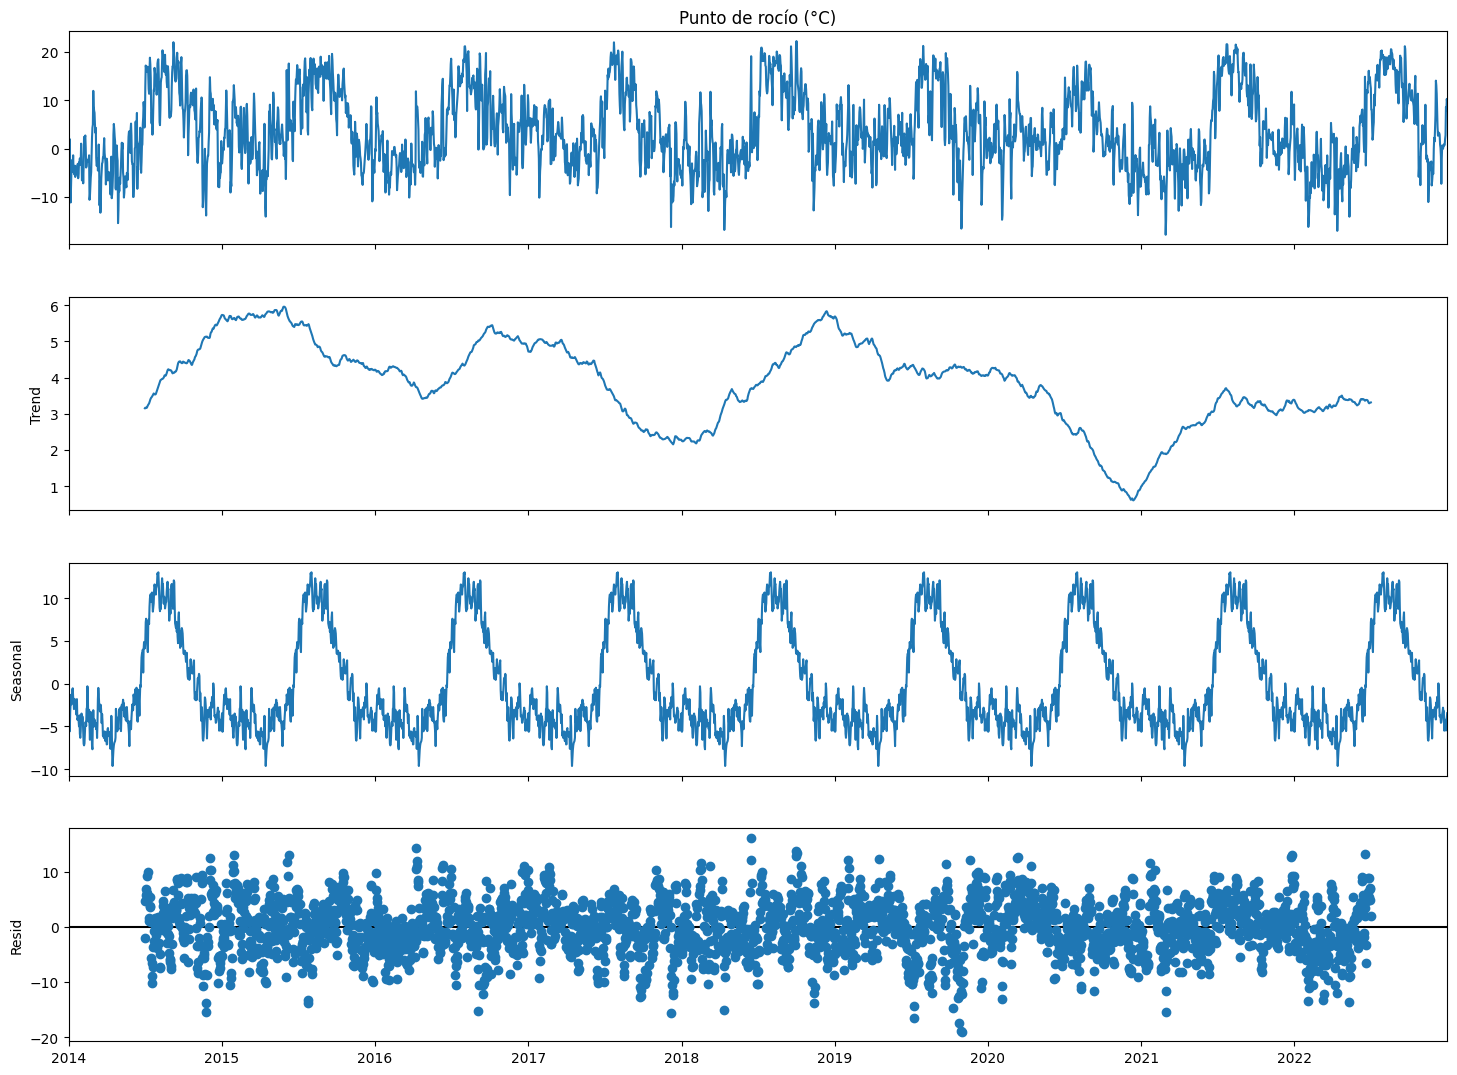

In [1048]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Punto de rocío (°C)'], model='additive', period=365)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

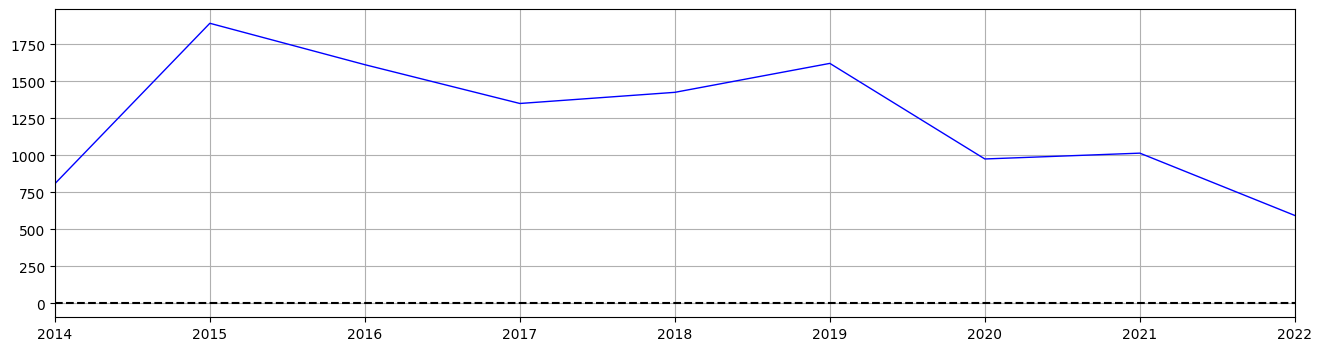

In [1049]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, vemos en la tendencia un ascenso desde 2014 a 2015, desciende hasta el 2016, asciende hasta 2019, desciende hasta 2020, sube ligeramente hasta 2021, y luego baja hasta 2022.

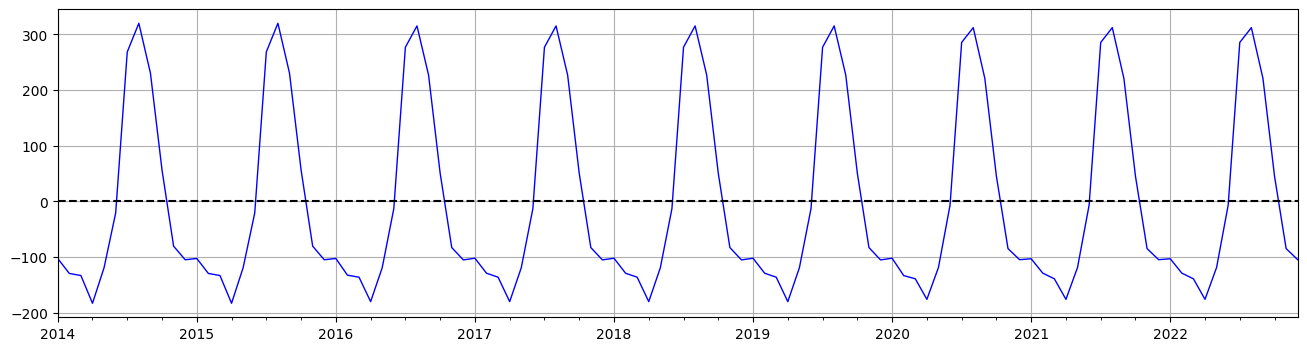

In [1050]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

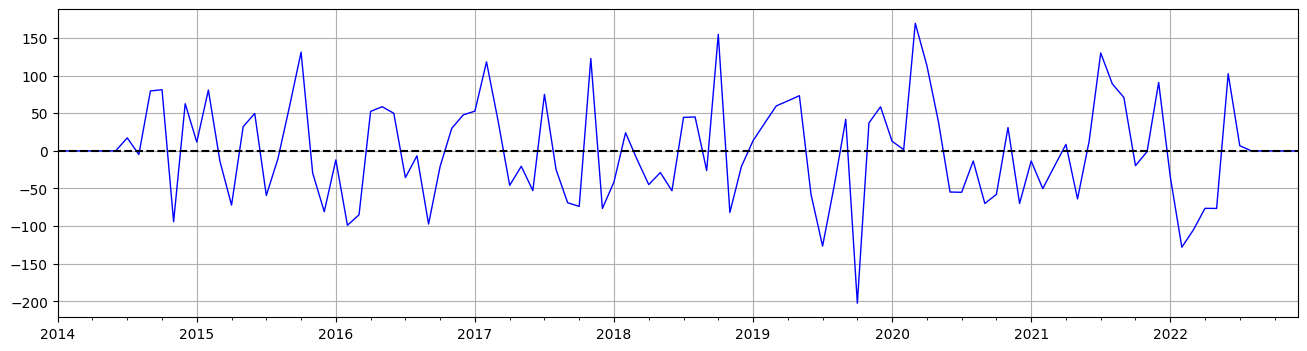

In [1051]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [1052]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Punto de rocío (°C)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.816259
p-value: 0.000051
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.000051 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

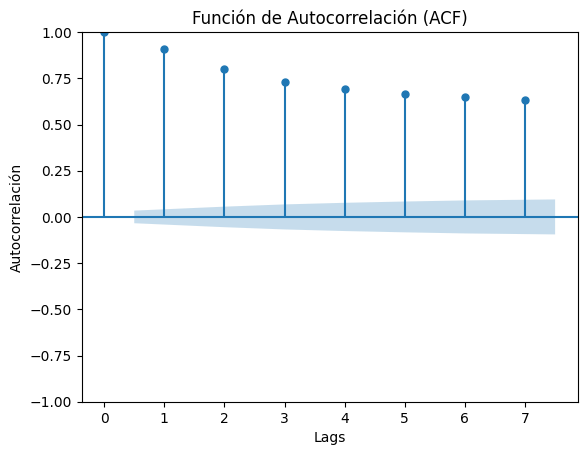

In [1053]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Punto de rocío (°C)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 50% haciendo que haya dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

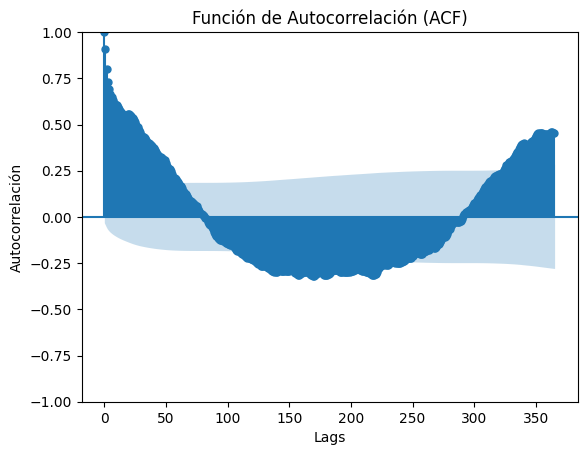

In [1054]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Punto de rocío (°C)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

### Humedad (%)

Realizamos el histograma para ver como están distribuidos los datos.

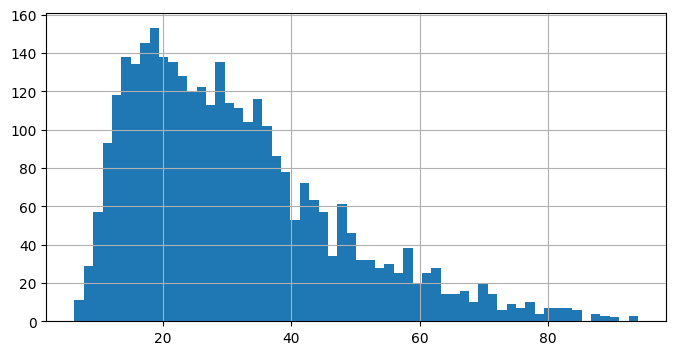

In [1055]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Humedad (%)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 10 y 50, haciendo que la mayor parte de Humedad (%) esté entre la parte inferior y mediana inferior del histograma, haciendo que haya una cola hacia la derecja y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

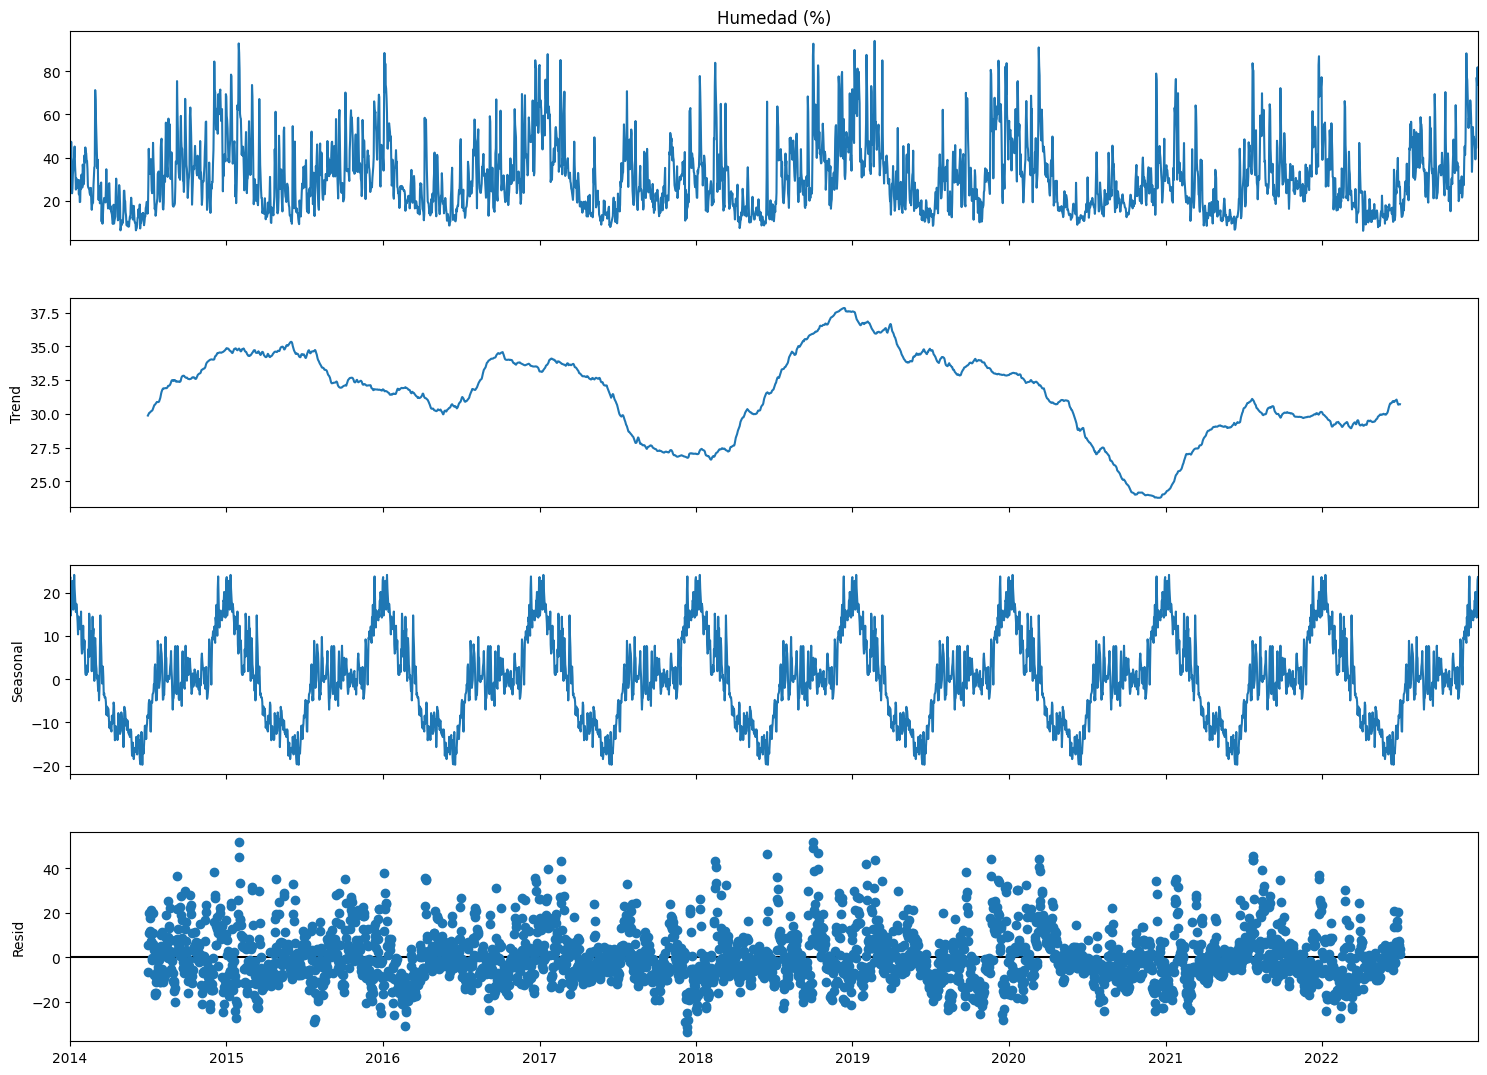

In [1056]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Humedad (%)'], model='additive', period=365)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

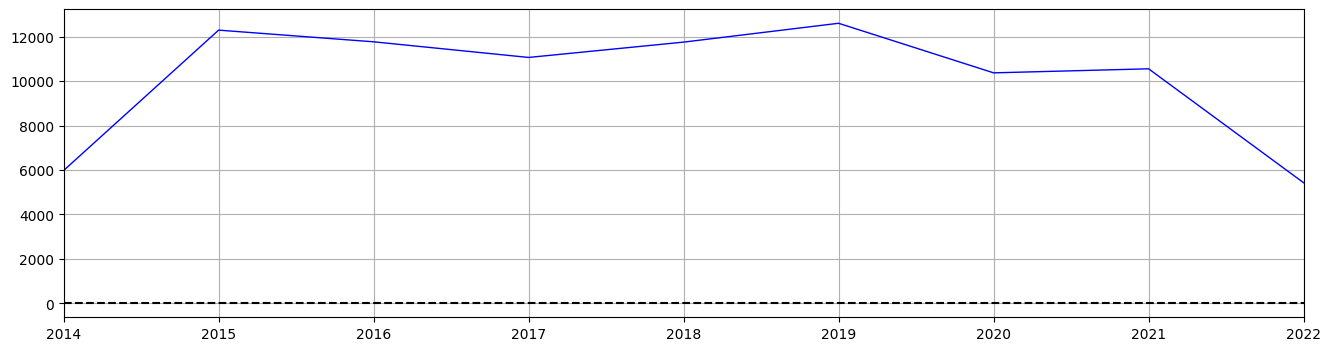

In [1057]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, vemos en la tendencia un ascenso desde 2014 a 2015, desciende hasta el 2016, asciende hasta 2019, desciende hasta 2020, sube ligeramente hasta 2021, y luego baja hasta 2022.

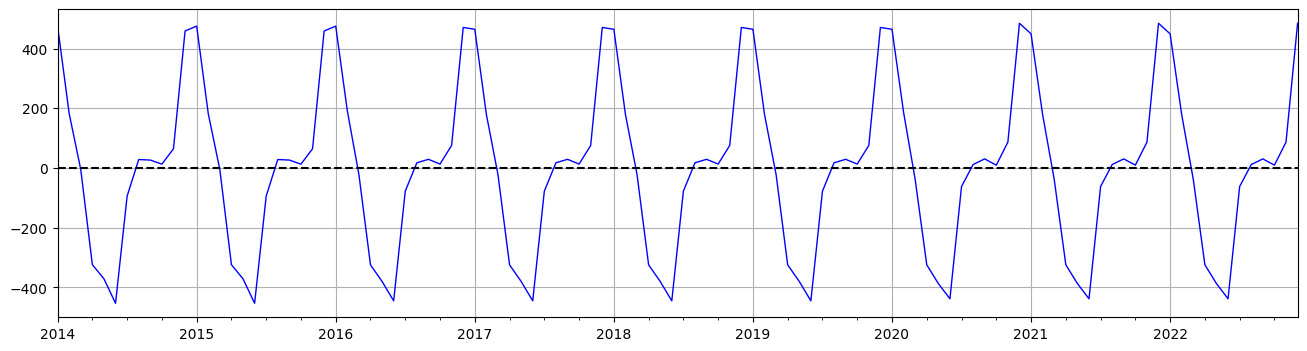

In [1058]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

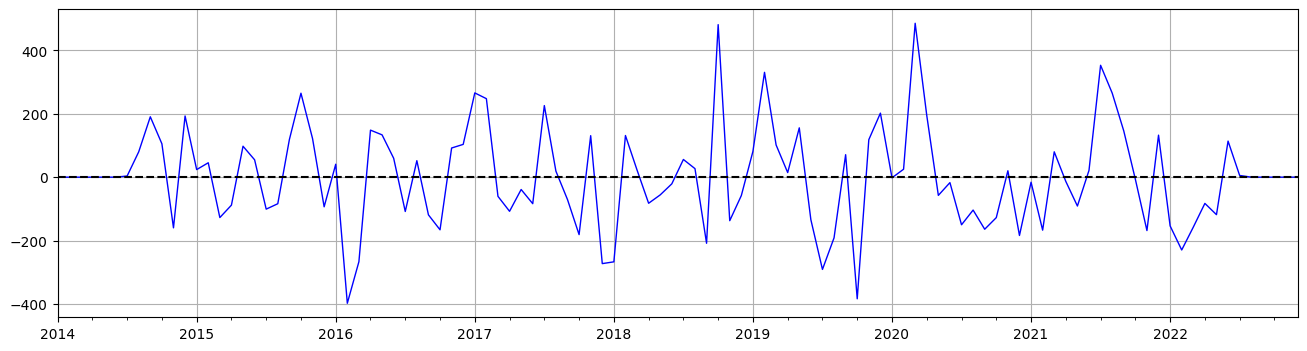

In [1059]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [1060]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Humedad (%)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.927779
p-value: 0.000031
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.000031 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

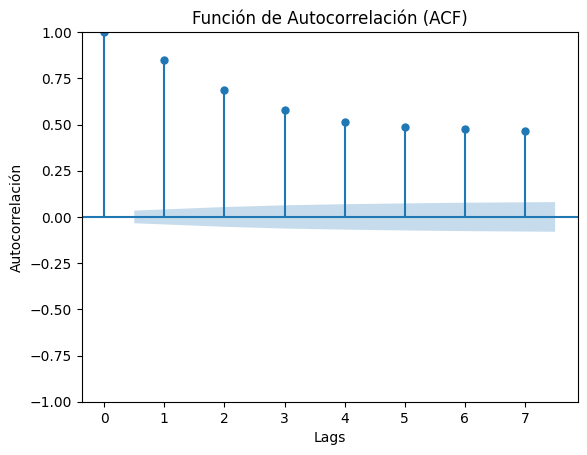

In [1061]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Humedad (%)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 50% haciendo que haya dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

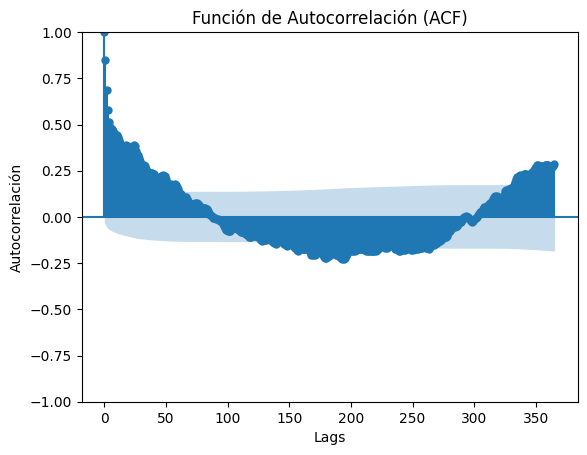

In [1062]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Humedad (%)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

### Velocidad del viento (m/s)

Realizamos el histograma para ver como están distribuidos los datos.

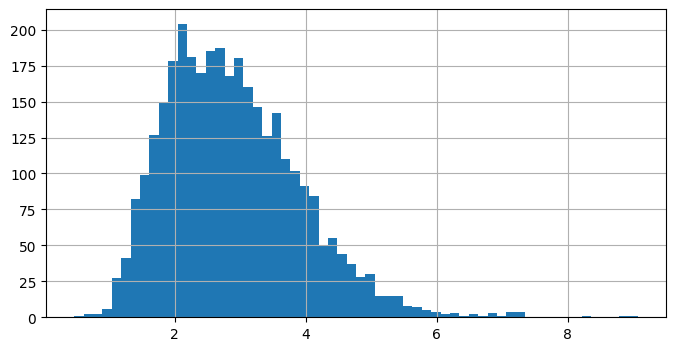

In [1063]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Velocidad del viento (m/s)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 1 y 4.5, haciendo que la mayor parte de Velocidad del viento (m/s) esté entre la parte inferior y mediana inferior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

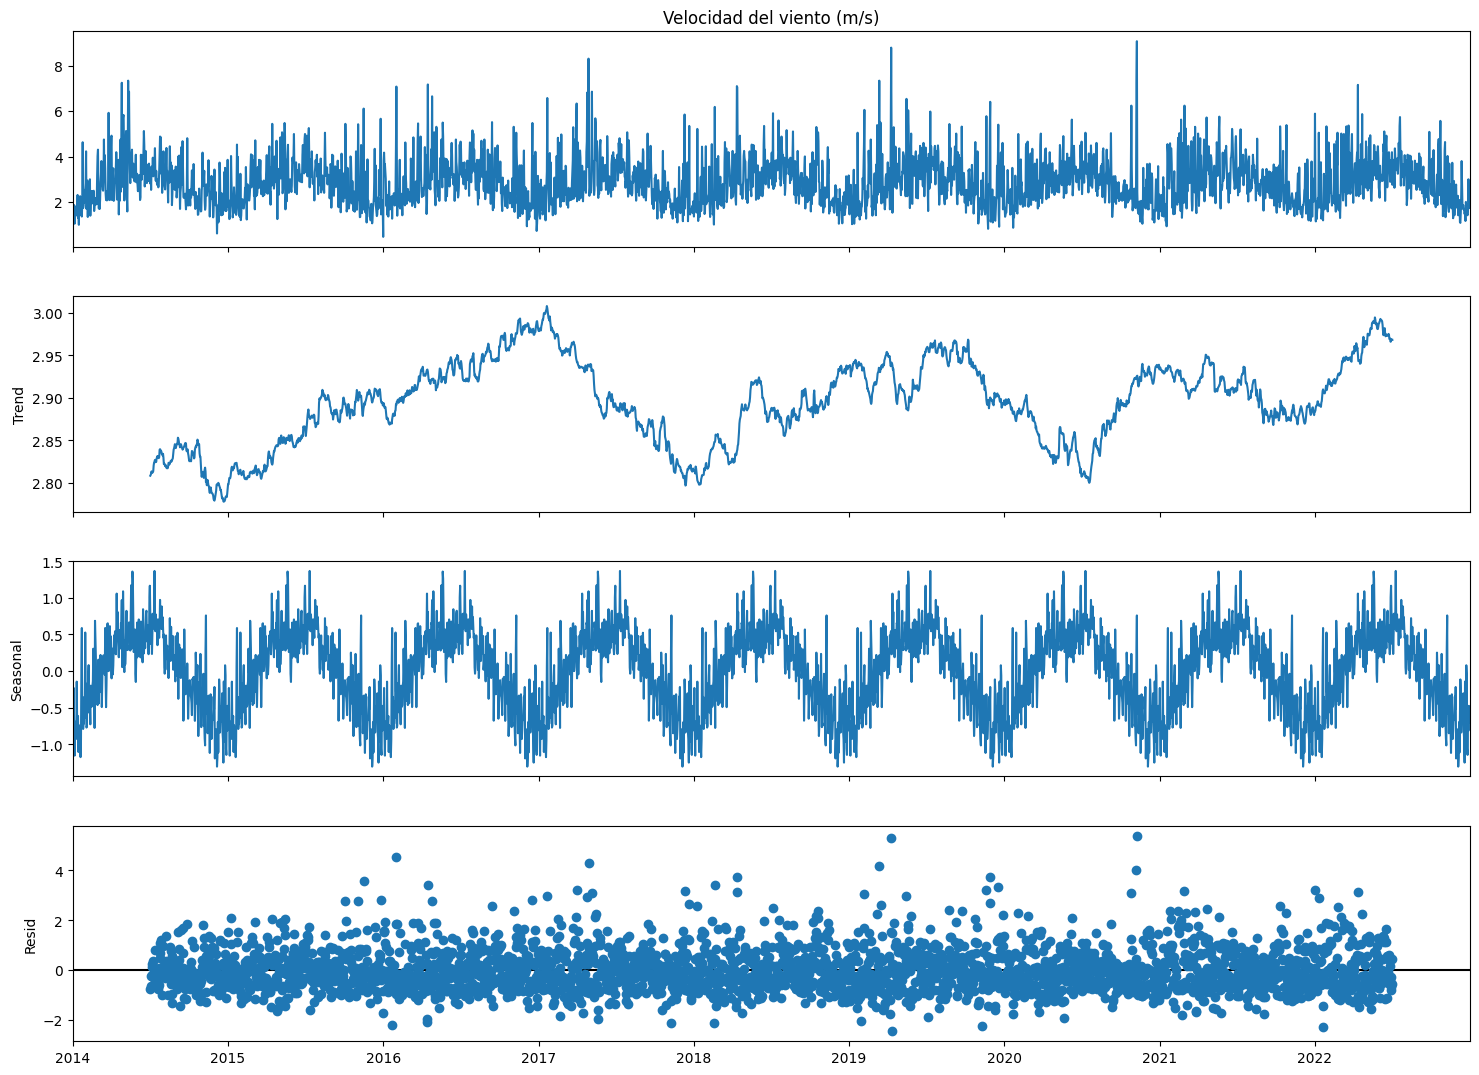

In [1064]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Velocidad del viento (m/s)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

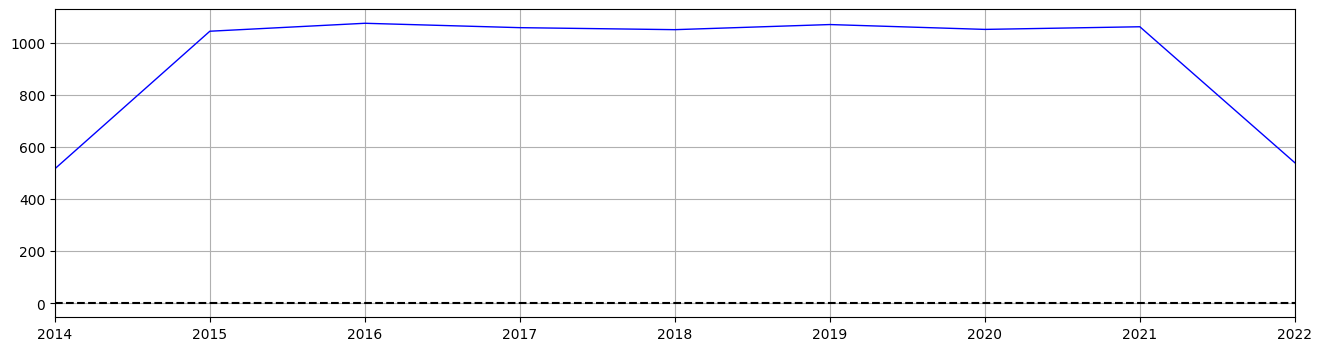

In [1065]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver como hay una ascendencia desde 2014 hasta 2016, desciende hasta 2018, asciende hasta 2019, desciende hasta 2020, aumenta ligeramente hasta 2021 y al final, baja hasta 2022.

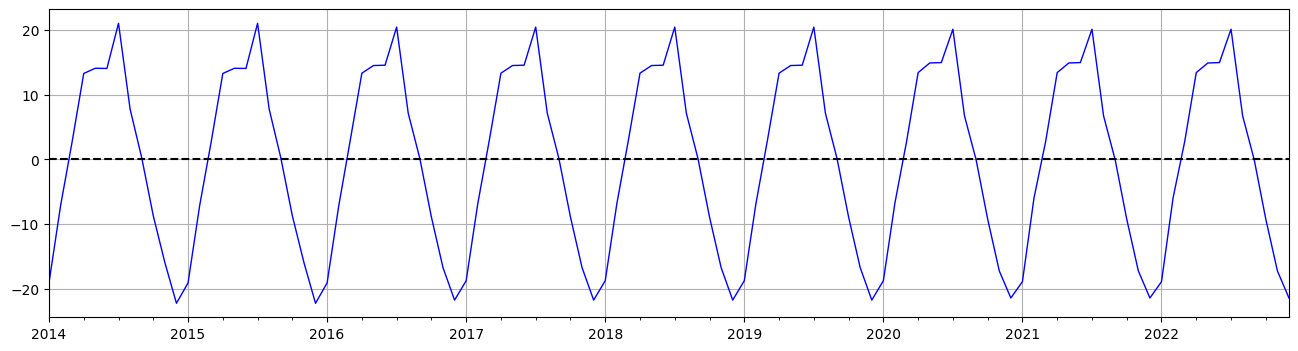

In [1066]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

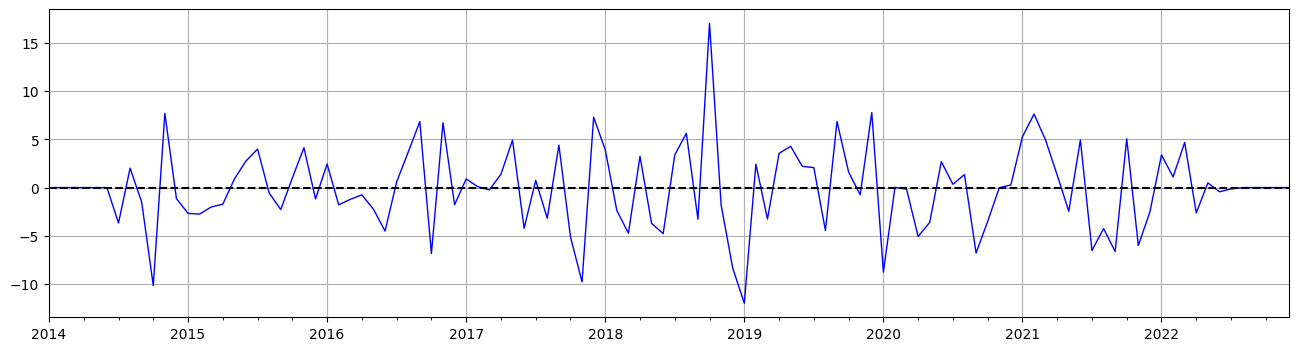

In [1067]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [1068]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Velocidad del viento (m/s)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.370469
p-value: 0.000335
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.000335 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

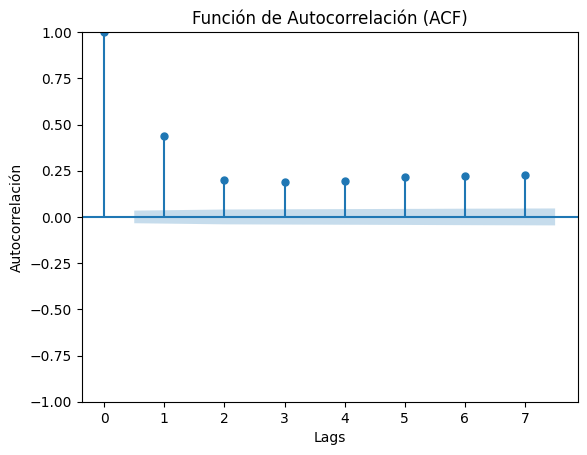

In [1069]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Velocidad del viento (m/s)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La correlación se puede ver como en los lags 2 (40-45%) y 3 (20-25%) parece haber un bajón en la correlación, aunque luego esta última, se mantiene hasta la 7, por lo que la dependencia entre valores pasados y presentes es bastante floja, a diferencia del resto de variables que hemos ido mirando durante el notebook.

<Figure size 1000x600 with 0 Axes>

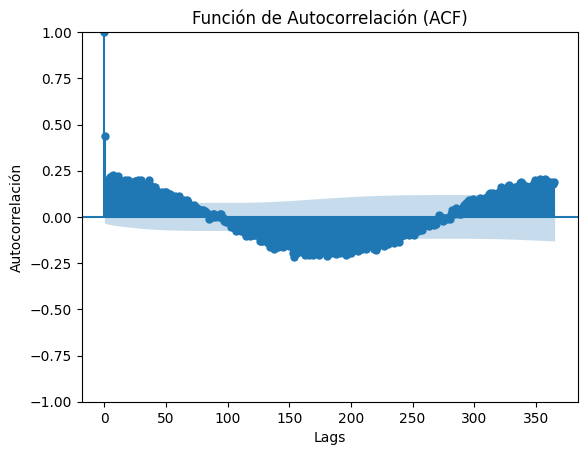

In [1070]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Velocidad del viento (m/s)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Visto que esta variable no vemos que influya directamente en nuestro consumo de energía total, y la baja autocorrelación que hay entre valores pasados y presentes, la trataremos como variable exógena.

### Presión (hPa)

Realizamos el histograma para ver como están distribuidos los datos.

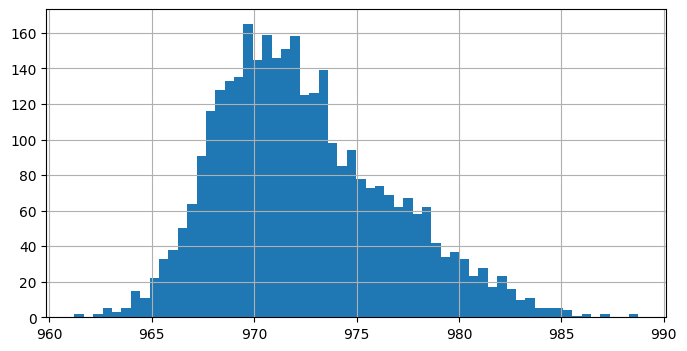

In [1071]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Presión (hPa)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 967 y 978, haciendo que la mayor parte de Presión (hPa) esté entre la parte inferior y mediana superior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

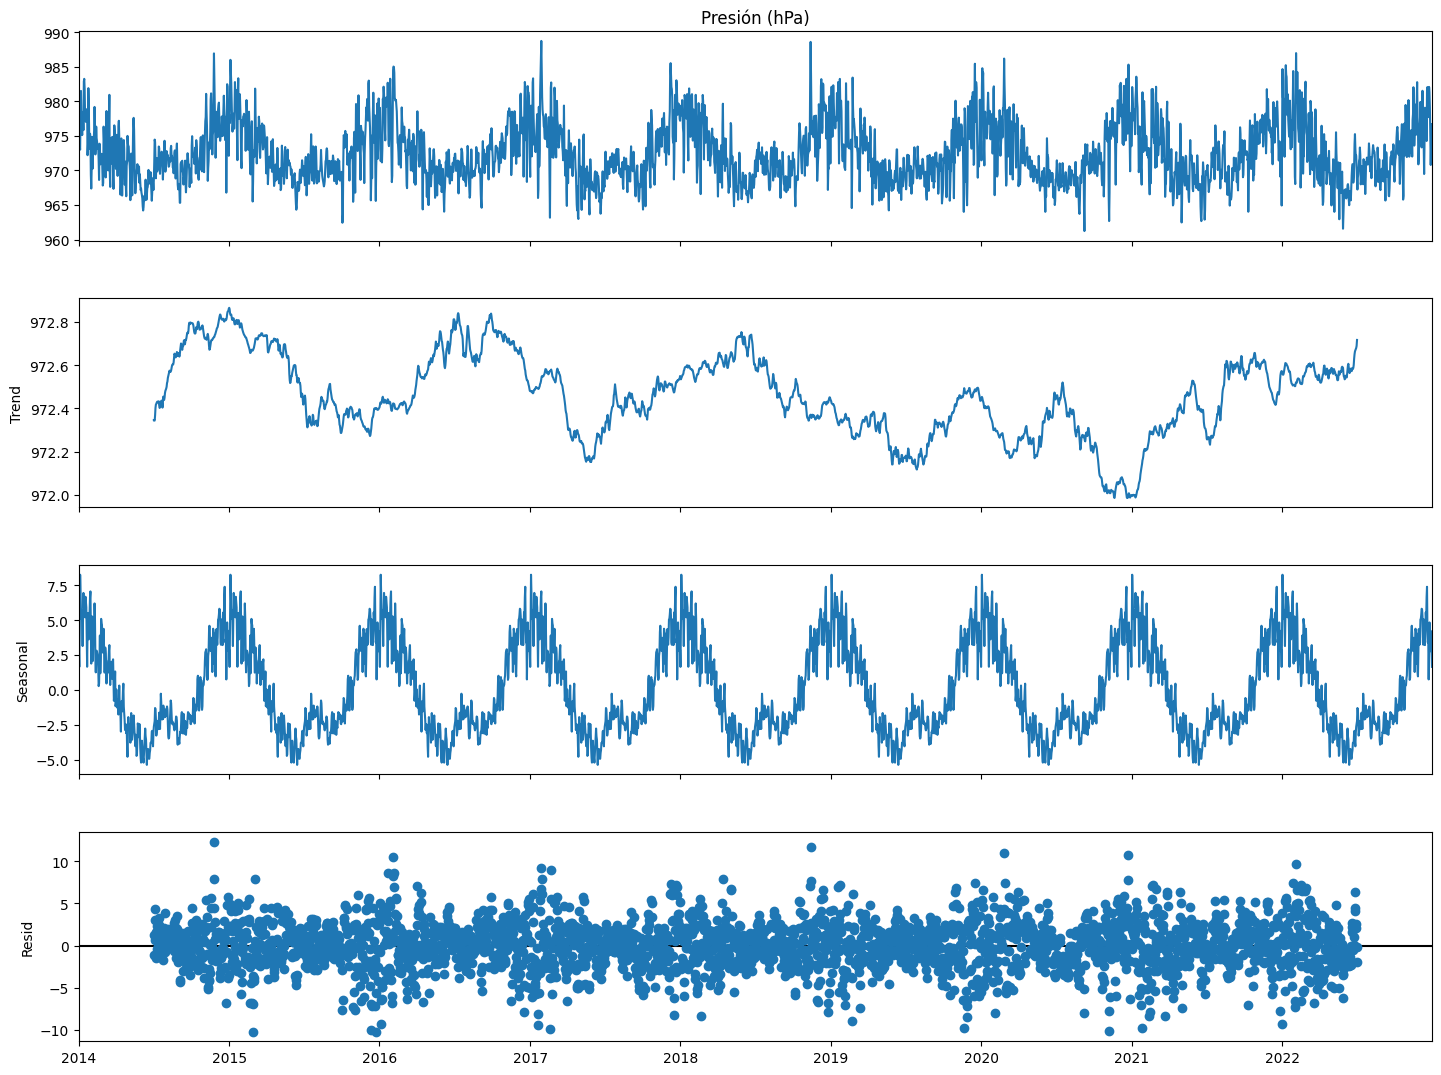

In [1072]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Presión (hPa)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

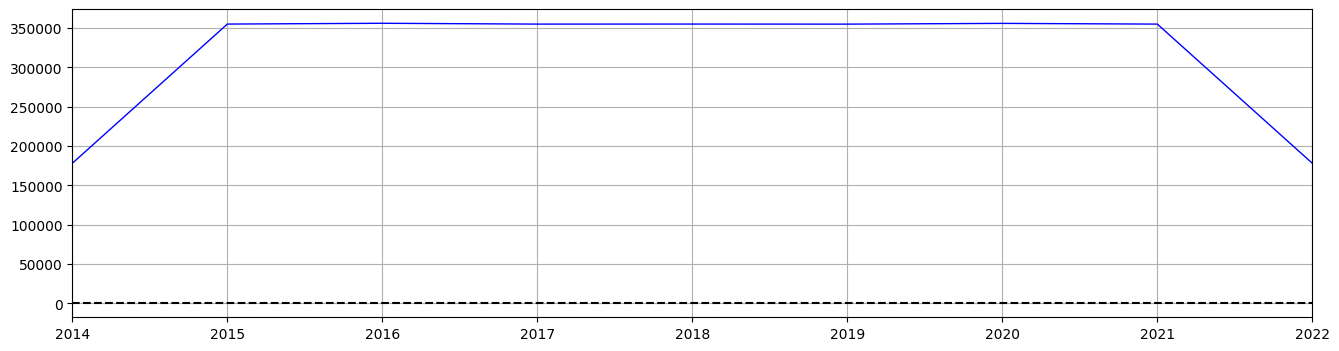

In [1073]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver como hay una ascendencia desde 2014 hasta 2015, y el valor se mantiene hasta que empieza a bajar desde 2021 hasta 2022.

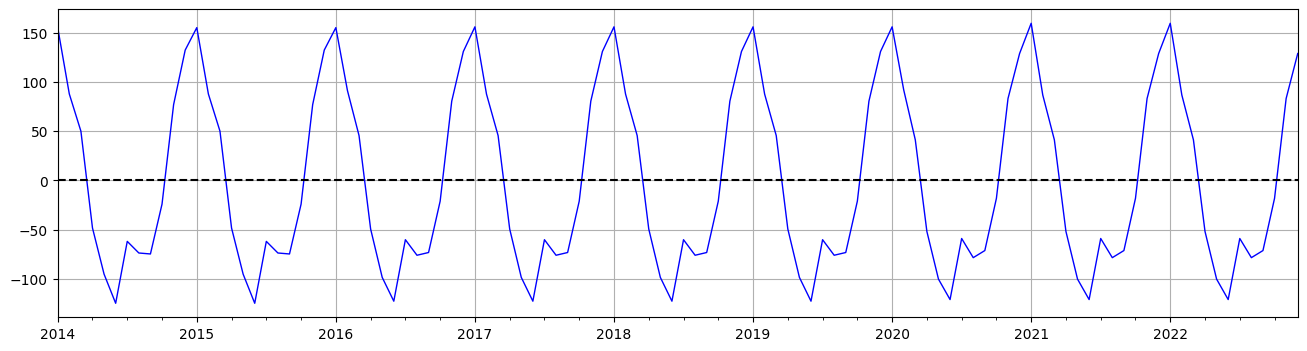

In [1074]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

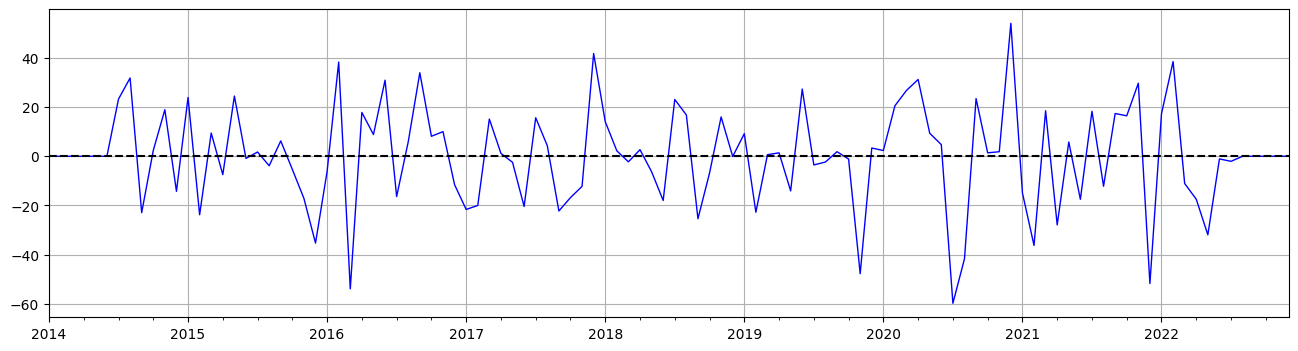

In [1075]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [1076]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Presión (hPa)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.658190
p-value: 0.000101
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.000101 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

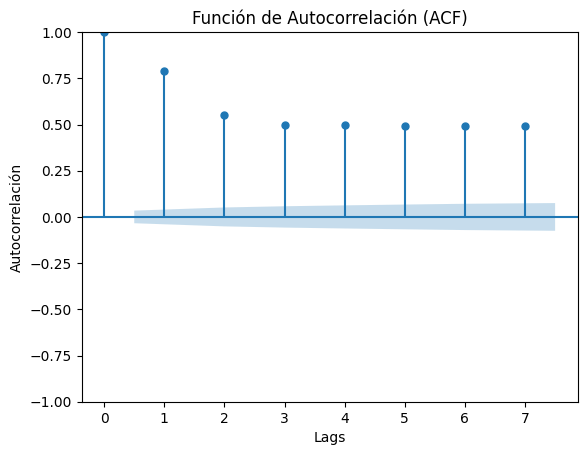

In [1077]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Presión (hPa)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La correlación se puede ver como en los lags 2 y 3 parece haber un bajón en la correlación, aunque luego esta última, se mantiene hasta la 7, por lo que la dependencia entre valores pasados y presentes es bastante floja, como sucedía en la variable Velocidad del viento (m/s).

<Figure size 1000x600 with 0 Axes>

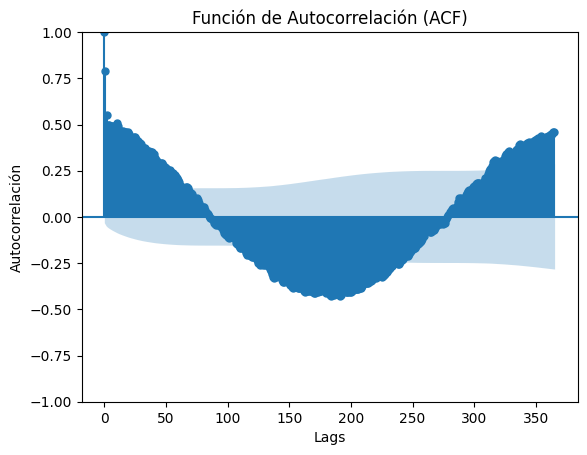

In [1078]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Presión (hPa)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

### Ráfaga de viento (m/s)

Realizamos el histograma para ver como están distribuidos los datos.

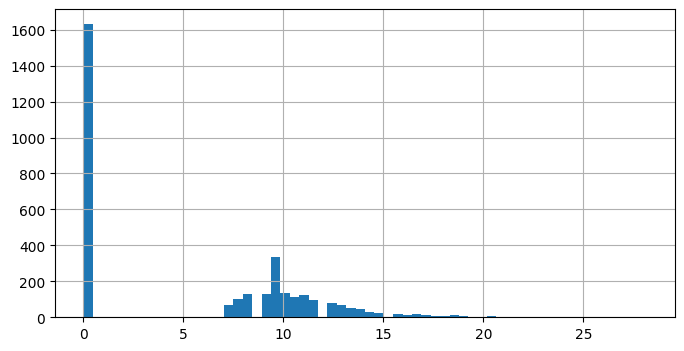

In [1079]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Ráfaga de viento (m/s)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede observar, a diferencia del resto de variables analizadas hasta ahora, que una gran parte de los valores se concentra en 0, ya que este corresponde a su comportamiento habitual. A partir del intervalo entre 5 y 10 m/s comienzan a aparecer datos, disminuyendo progresivamente su frecuencia en los tramos de 10 a 15 m/s y de 15 a 20 m/s, siendo prácticamente inexistentes en el intervalo entre 20 y 25 m/s.

Esta distribución presenta una cola hacia la derecha, lo que indica un sesgo positivo acusado y, por tanto, una clara desviación respecto a una distribución normal. Este comportamiento es característico de variables asociadas a eventos poco frecuentes pero de elevada intensidad.

Ahora vamos a revisar el resto de componentes de la variable.

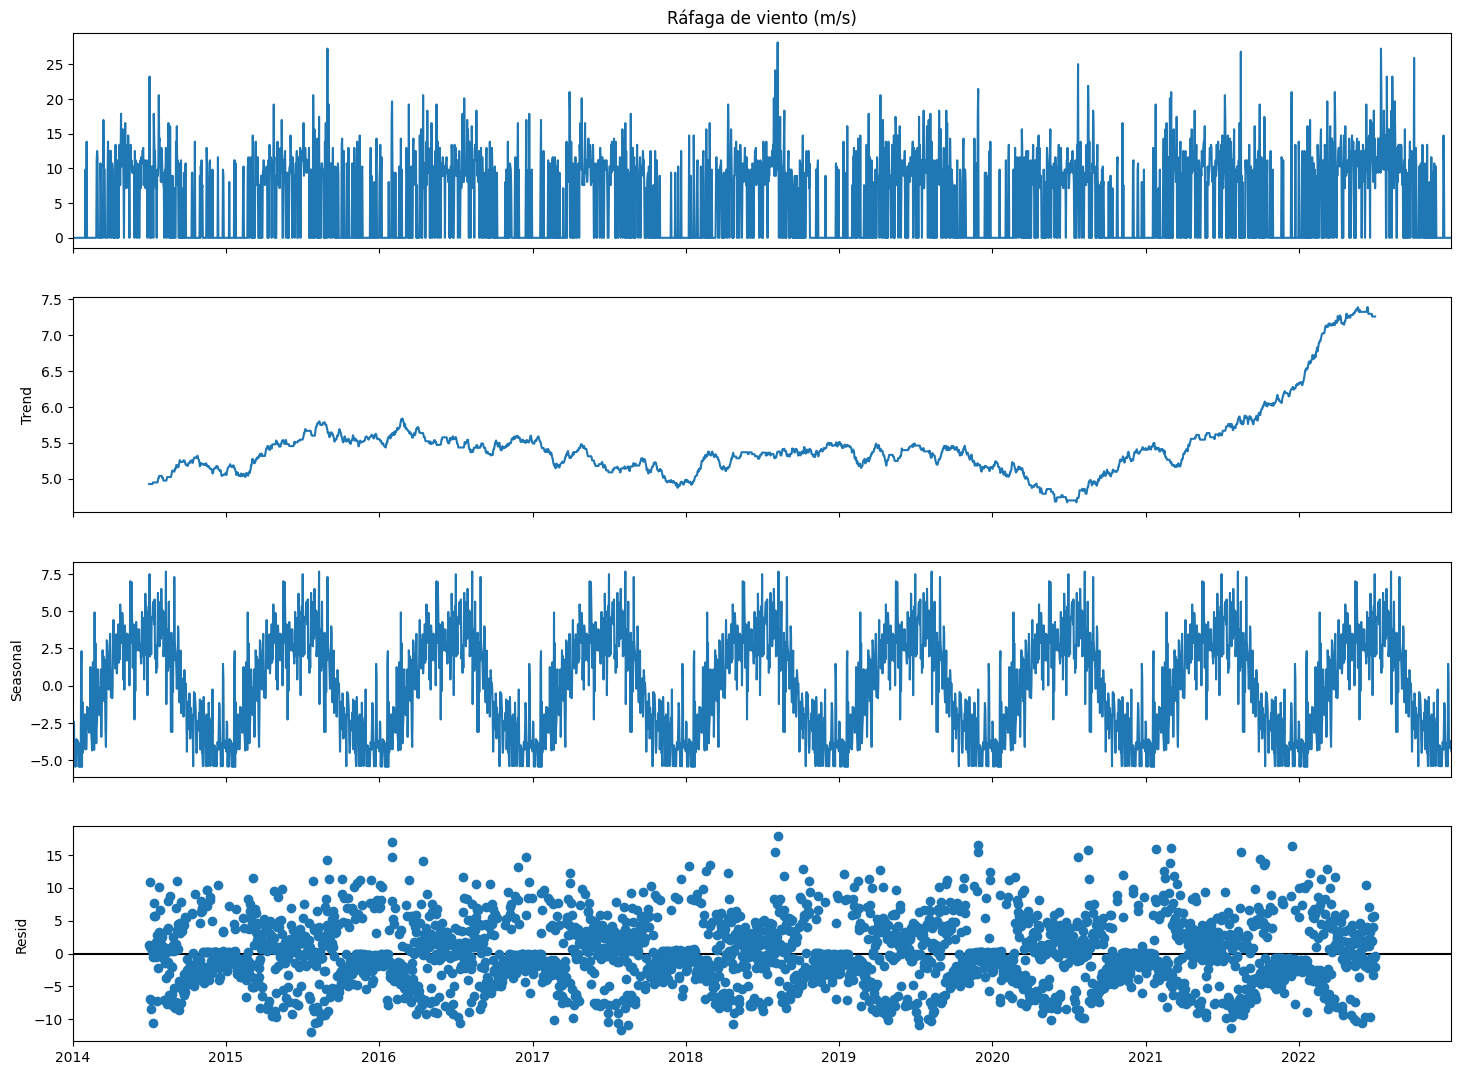

In [1080]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Ráfaga de viento (m/s)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

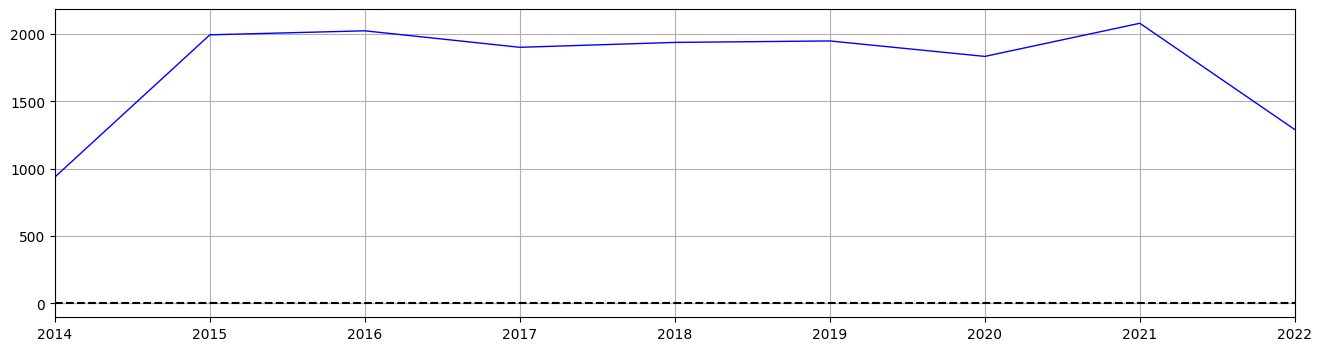

In [1081]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver como hay una ascendencia desde 2014 hasta 2016, descenso hasta 2017, ascenso hasta 2018, se mantiene hasta 2019, desciende hasta 2020, asciende hasta 2021, y desciende de nuevo hasta 2022.

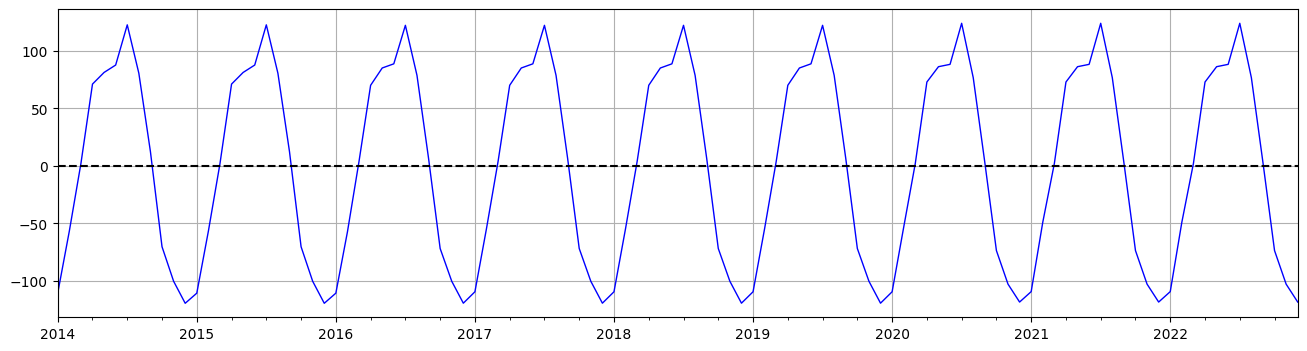

In [1082]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

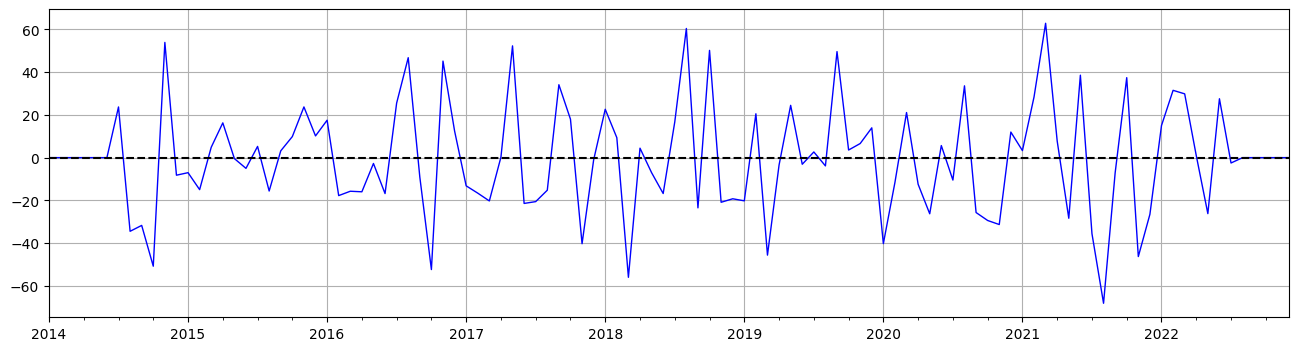

In [1083]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [1084]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Ráfaga de viento (m/s)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.157892
p-value: 0.000776
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.000776 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

<Figure size 1000x600 with 0 Axes>

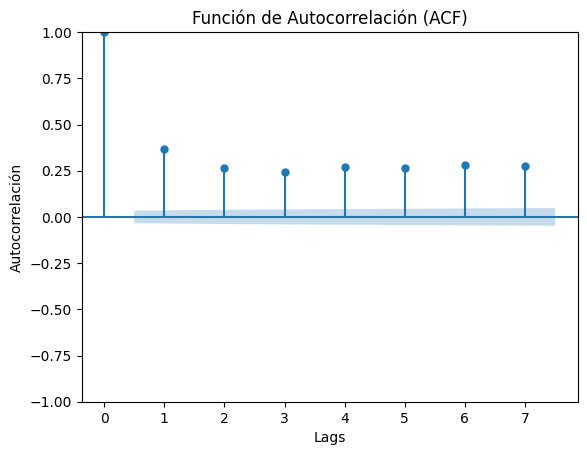

In [1085]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Ráfaga de viento (m/s)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

en la correlación se puede ver como en el lag 2 hay un decremento enorme del 100% a 30-35%, en el lag 3 baja hasta 25-30%, y luego se mantiene estos lags, lo que indica una dependencia entre valores pasados y presentes bastante floja.

<Figure size 1000x600 with 0 Axes>

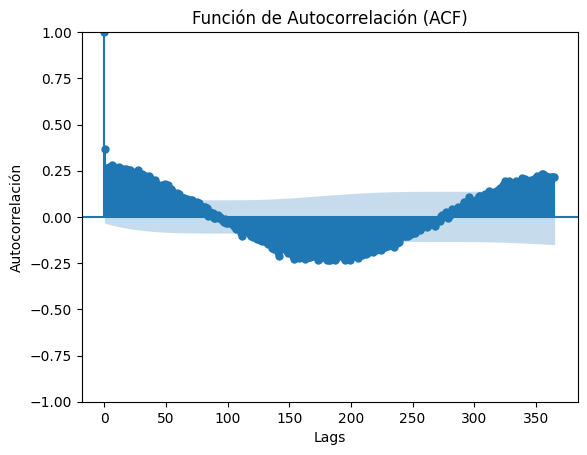

In [1086]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Ráfaga de viento (m/s)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Visto que esta variable no vemos que influya directamente en nuestro consumo de energía total, y la baja autocorrelación que hay entre valores pasados y presentes, la trataremos como variable exógena.

## Variables endógenas y exógenas

En vista al análisis, en cuanto a las variables endógenas, variables de las que dependen la variable objetivo, son las variables: Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Temperatura (°C), Punto de rocío (°C), Humedad (%) y Presión (hPa).

En cuanto a las variables exógenas, tenemos: "Día de la semana", "Velocidad del viento (m/s)" y "Ráfaga de viento (m/s)".

## Guardar dataset

In [1087]:
# energia_climaticos.head()

In [1088]:
# energia_climaticos.to_csv('Data/energia_climaticos_preprocesada.csv')

# Conclusión

En cuanto a nuestro preprocesado, hemos cogido el dataset ``Datos_Energia``, hemos realizado un DatetimeIndex para tener un índice de frecuencia horaria, eliminando las columnas utilizadas para dicho índice. Eliminamos duplicados, excluyendo el índice ya que no contiene duplicados, sustituyéndolos por nulos. Luego investigamos los métodos de interpolado y nos interesó utilizar el interpolado temporal, ya que parece respetar más la serie temporal de cada variable que el interpolado lineal, por lo tanto, tratamos los nulos con interpolado temporal. Luego describimos a simple vista las series temporales de cada variable y vemos como tenemos outliers muy altos o/y muy bajos dependiendo de la variable, que tratamos con percentiles con valores muy altos o muy bajos, para eliminar (sustituir por nulos) el mínimo número de datos posible, para tratar de respetar la serie temporal lo máximo posible. Luego, analizamos sus correlaciones, pero decidimos no eliminar nada ya que el dataset tiene muy pocas variables, por lo que quisimos respetar el dataset lo máximo posible. Para finalizar, transformamos los datos a días sumando todas las horas de cada día, ya que son cantidades acumulables a lo largo del día, y guardamos el dataset con nombre ``energia_preprocesada.csv``.

En cuanto al análisis de variables, hemos visto que todas las variables que tenemos son estacionales con periodos anuales, por lo que seguramente se repetirán patrones en el futuro. Son estacionarias también todas, es decir, la varianza y la media son constantes y la estructura temporal se mantiene. Tienen una fuerte autocorreleación con lag=7, lo que nos hace ver que hay fuertes dependencias de valores del pasado y presente en el periodo de una semana. En todas las variables suelen empezar una tendencia ascendente, pero llegan un momento que descienden.

# Uso de IA

**Prompt:** pero pierde puntos del eje x, como lo hago para poner todos los meses?

**Respuesta:**
```Python
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Selección de rango
ts = energia_mensual["2014":"2015"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2014-2015) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Electricidad (kW)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()
```


**Prompt:** hazme una tabla de correlacion de todas las columnas de un conjunto de datos en python

**Respuesta:**
```Python
import pandas as pd

# Cargar tu conjunto de datos
# Por ejemplo, si es un CSV:
df = pd.read_csv("ruta/a/tu/archivo.csv")

# Crear la tabla de correlación
correlation_matrix = df.corr()

# Mostrar la tabla de correlación
print(correlation_matrix)

# Opcional: si quieres visualizarla de forma más atractiva con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()
```

**Prompot:** Hazme en una grafica donde se muestren las series temporales de todas las variables de mi dataset energia 

**Respuesta:**
```Python
# Guarda el número de variables del dataset
n = len(energia.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, energia.columns):
    ax.plot(energia.index, energia[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()
```

**Prompot:** me sale raro, yo lo que quiero es que se vea la serie temporal de la columna seleccionada como su tuviese zoom apuntando a donde estan los nulos y se vea el hueco, y luego otra grafica igual pero ese hueco rellenado por la linea de la interpolacion temporal pintado de otro color

**Respuesta:**
```Python
col = 'Energia'

# índices donde hay NaN
idx_nan = energia_original[col][energia_original[col].isna()].index

# elegimos el primer hueco
t0 = idx_nan[0]

# ventana de zoom (ej. ±12 horas)
inicio = t0 - pd.Timedelta(hours=12)
fin    = t0 + pd.Timedelta(hours=12)

orig_zoom = energia_original.loc[inicio:fin, col]
interp_zoom = energia.loc[inicio:fin, col]

mask = orig_zoom.isna()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(orig_zoom.index, orig_zoom, marker='o')
plt.title('Serie temporal con hueco (valores nulos)')
plt.xlabel('Tiempo')
plt.ylabel(col)

plt.tight_layout()
plt.show()

# Copia para dibujar
serie_azul = interp_zoom.copy()

# En el hueco interpolado, ponemos NaN para que NO se dibuje azul
serie_azul[mask] = float('nan')


plt.figure(figsize=(10,4))

# Azul: datos originales (con corte)
plt.plot(
    serie_azul.index,
    serie_azul,
    color='steelblue',
    label='Datos originales'
)

# Naranja: tramo interpolado + bordes
idx_interp = interp_zoom.index[mask]

# añadimos un punto antes y después para continuidad visual
idx_ext = interp_zoom.index[
    interp_zoom.index.get_loc(idx_interp[0]) - 1 :
    interp_zoom.index.get_loc(idx_interp[-1]) + 2
]

plt.plot(
    idx_ext,
    interp_zoom.loc[idx_ext],
    color='orange',
    linewidth=3,
    label='Tramo interpolado'
)

plt.title('Serie temporal con hueco rellenado por interpolación')
plt.xlabel('Tiempo')
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()
```